In [38]:
import re

def extract_task_number(line):
    # Compile a regex pattern to match the task number in parentheses
    pattern = re.compile(r"\(Task (\d+)\)")
    
    # Search for the pattern in the given line
    match = pattern.search(line)
    
    if match:
        # If a match is found, return the captured group which corresponds to the task number
        return int(match.group(1))
    else:
        # Return None or raise an exception if no match is found
        return None
    
    


In [39]:
def parse_log_file(log_file_path):
    # Dictionary to store the accuracy values for each task
    task_accuracies = {}
    current_task = 0  # Start with task 0

    # Open the log file and read line by line
    with open(log_file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Check for the start of a new task's training phase
            if line == '-- >> Start of training phase << --':
                if current_task not in task_accuracies:
                    task_accuracies[current_task] = []
                else:
                    current_task += 1  # Increment task number at the start of a new training phase
                    task_accuracies[current_task] = []  # Initialize the list for the new task

            # Extract accuracy values
            if 'Top1_Acc_Exp/eval_phase/test_stream/' in line:
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Append the accuracy value to the current task's list
                task_accuracies[current_task].append(accuracy)

    return task_accuracies


In [40]:
def parse_log_file2(log_file_path):
    # Dictionary to store the individual accuracy values for each task and the average accuracy
    task_accuracies = {"individual": {}, "average": {}}
    current_task = 0  # Start with task 0

    # Open the log file and read line by line
    with open(log_file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Check for the start of a new task's training phase
            if line == '-- >> Start of training phase << --':
                current_task += 1  # Increment task number at the start of a new training phase
                task_accuracies["individual"][current_task-1] = []  # Initialize the list for the new task

            # Extract accuracy values during task training
            if 'Top1_Acc_Exp/eval_phase/test_stream/' in line:
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Append the accuracy value to the current task's list
                task_accuracies["individual"][current_task-1].append(accuracy)

            # Extract the last average accuracy value after each task
            if line.startswith('Top1_Acc_Stream/eval_phase/test_stream/'):
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Store this accuracy in the 'average' key for the corresponding task
                task_accuracies["average"][current_task] = accuracy

    return task_accuracies


In [41]:
# Path to the log file
log_file_path1 = 'logs/log_real_sythesis_mixup.txt'

# Parse the log file and get the accuracies dictionary
accuracies1 = parse_log_file2(log_file_path1)

# log_file_path2 = 'logs/method2_10buffer.txt'

# # Parse the log file and get the accuracies dictionary
# accuracies2 = parse_log_file2(log_file_path2)
# print(accuracies2)

In [42]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_task_accuracies_task(task_accuracies, saved_name):
    task_accuracies = task_accuracies['individual']
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data = []
        
        # Initialize the list with None for tasks 0 to i-1
        task_data = [None] * 20  # Pre-fill with None for clarity

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):  # Start collecting data from the current task onward
            if task_trained in task_accuracies and len(task_accuracies[task_trained]) > i:
                task_data[task_trained] = task_accuracies[task_trained][i]
        
        # Filter data to remove leading None values if all are None before first non-None value
        if any(v is not None for v in task_data):
            # Plot the accuracies
            x_values = list(range(20))
            ax.plot(x_values, task_data, marker='o', linestyle='-', label=f'Task {i}')
            ax.set_title(f'Task {i} Accuracies')
            ax.set_xlabel('Tasks Trained')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 19])
            ax.grid(True)
#             ax.legend()
    plt.savefig(saved_name)
    plt.show()

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_dual_task_accuracies1(task_accuracies1, task_accuracies2, saved_name):
    task_accuracies1 = task_accuracies1['individual']
    task_accuracies2 = task_accuracies2['individual']
    
    
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data1 = []
        task_data2 = []
        
        # Initialize the list with None for tasks 0 to i-1
        task_data1 = [None] * 20  # Pre-fill with None for clarity
        task_data2 = [None] * 20

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):  # Start collecting data from the current task onward
            if (task_trained in task_accuracies1 and len(task_accuracies1[task_trained]) > i) and \
            (task_trained in task_accuracies2 and len(task_accuracies2[task_trained]) > i):
                task_data1[task_trained] = task_accuracies1[task_trained][i]
                task_data2[task_trained] = task_accuracies2[task_trained][i]
                
        
        # Filter data to remove leading None values if all are None before first non-None value
        if any(v is not None for v in task_data1):
            # Plot the accuracies
            x_values = list(range(20))
            ax.plot(x_values, task_data1, marker='o', linestyle='-', color = 'red', label=f'Real+Synthesis')
            ax.plot(x_values, task_data2, marker='o', linestyle='-', color = 'blue', label=f'Real')
            
            ax.set_title(f'Task {i} Accuracies')
            ax.set_xlabel('Tasks Trained')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 19])
            ax.grid(True)
            ax.legend()
    plt.savefig(saved_name)
    plt.show()

    import matplotlib.pyplot as plt

def plot_dual_task_accuracies(task_accuracies1, task_accuracies2, saved_name):
    task_accuracies1 = task_accuracies1['individual']
    task_accuracies2 = task_accuracies2['individual']
    
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3, bottom=0.1)  # Adjust the bottom to make space for the legend
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data1 = [None] * 20
        task_data2 = [None] * 20

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):
            if task_trained in task_accuracies1 and len(task_accuracies1[task_trained]) > i:
                task_data1[task_trained] = task_accuracies1[task_trained][i]
            if task_trained in task_accuracies2 and len(task_accuracies2[task_trained]) > i:
                task_data2[task_trained] = task_accuracies2[task_trained][i]
                
        # Plot the accuracies
        x_values = list(range(20))
        ax.plot(x_values, task_data1, marker='o', linestyle='-', color='red', label='with budget')
        ax.plot(x_values, task_data2, marker='o', linestyle='-', color='blue', label='without budget')
        
        ax.set_title(f'Task {i} Accuracies')
        ax.set_xlabel('Tasks Trained')
        ax.set_ylabel('Accuracy')
        ax.set_ylim([0, 1])
        ax.set_xlim([0, 19])
        ax.grid(True)

    # Add an overall figure title and a legend below the plots
#     fig.suptitle('Comparison of Task Accuracies', fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')

    plt.savefig(saved_name)
    plt.show()


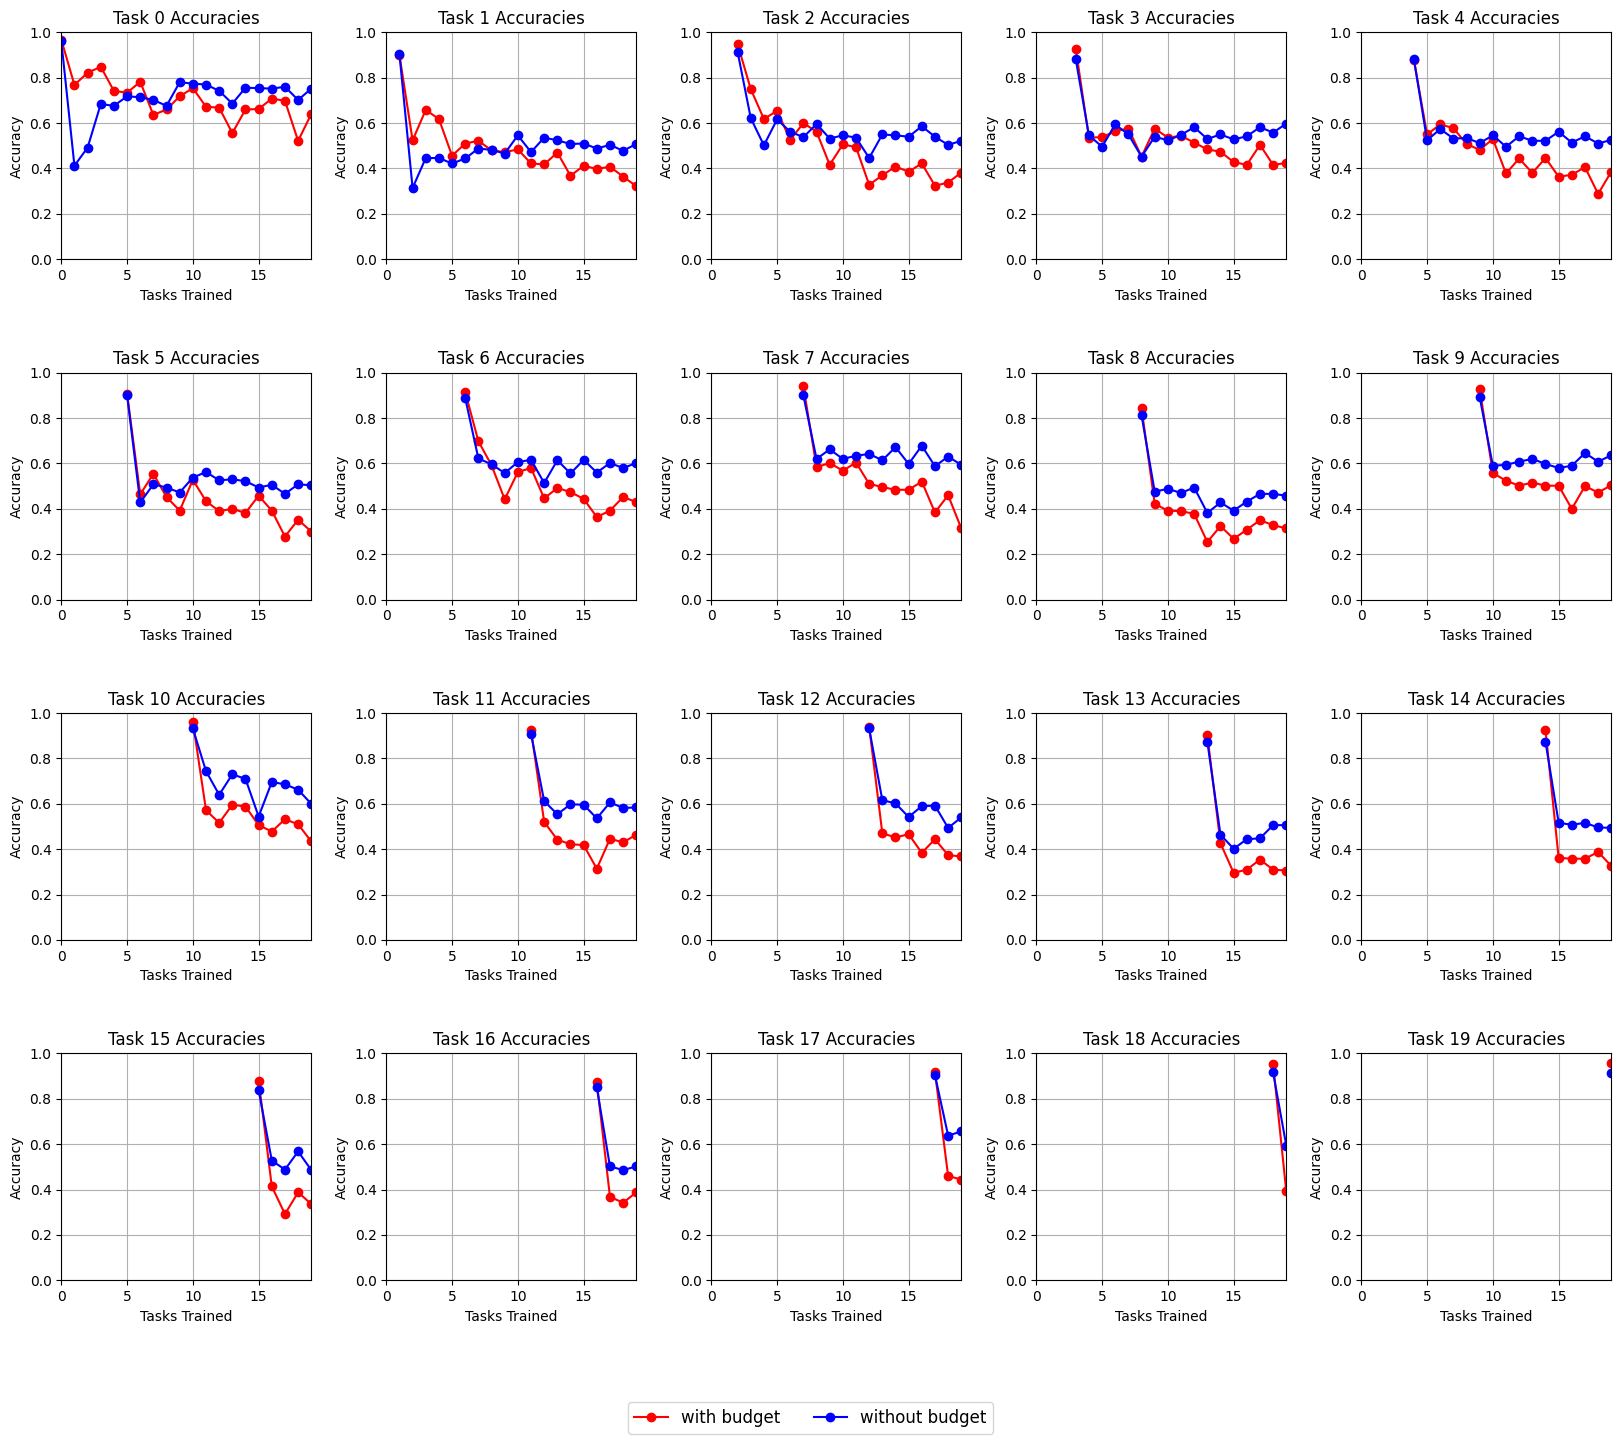

In [23]:
plot_dual_task_accuracies(accuracies1, accuracies2, 'figures/method2_wo_budget.png')

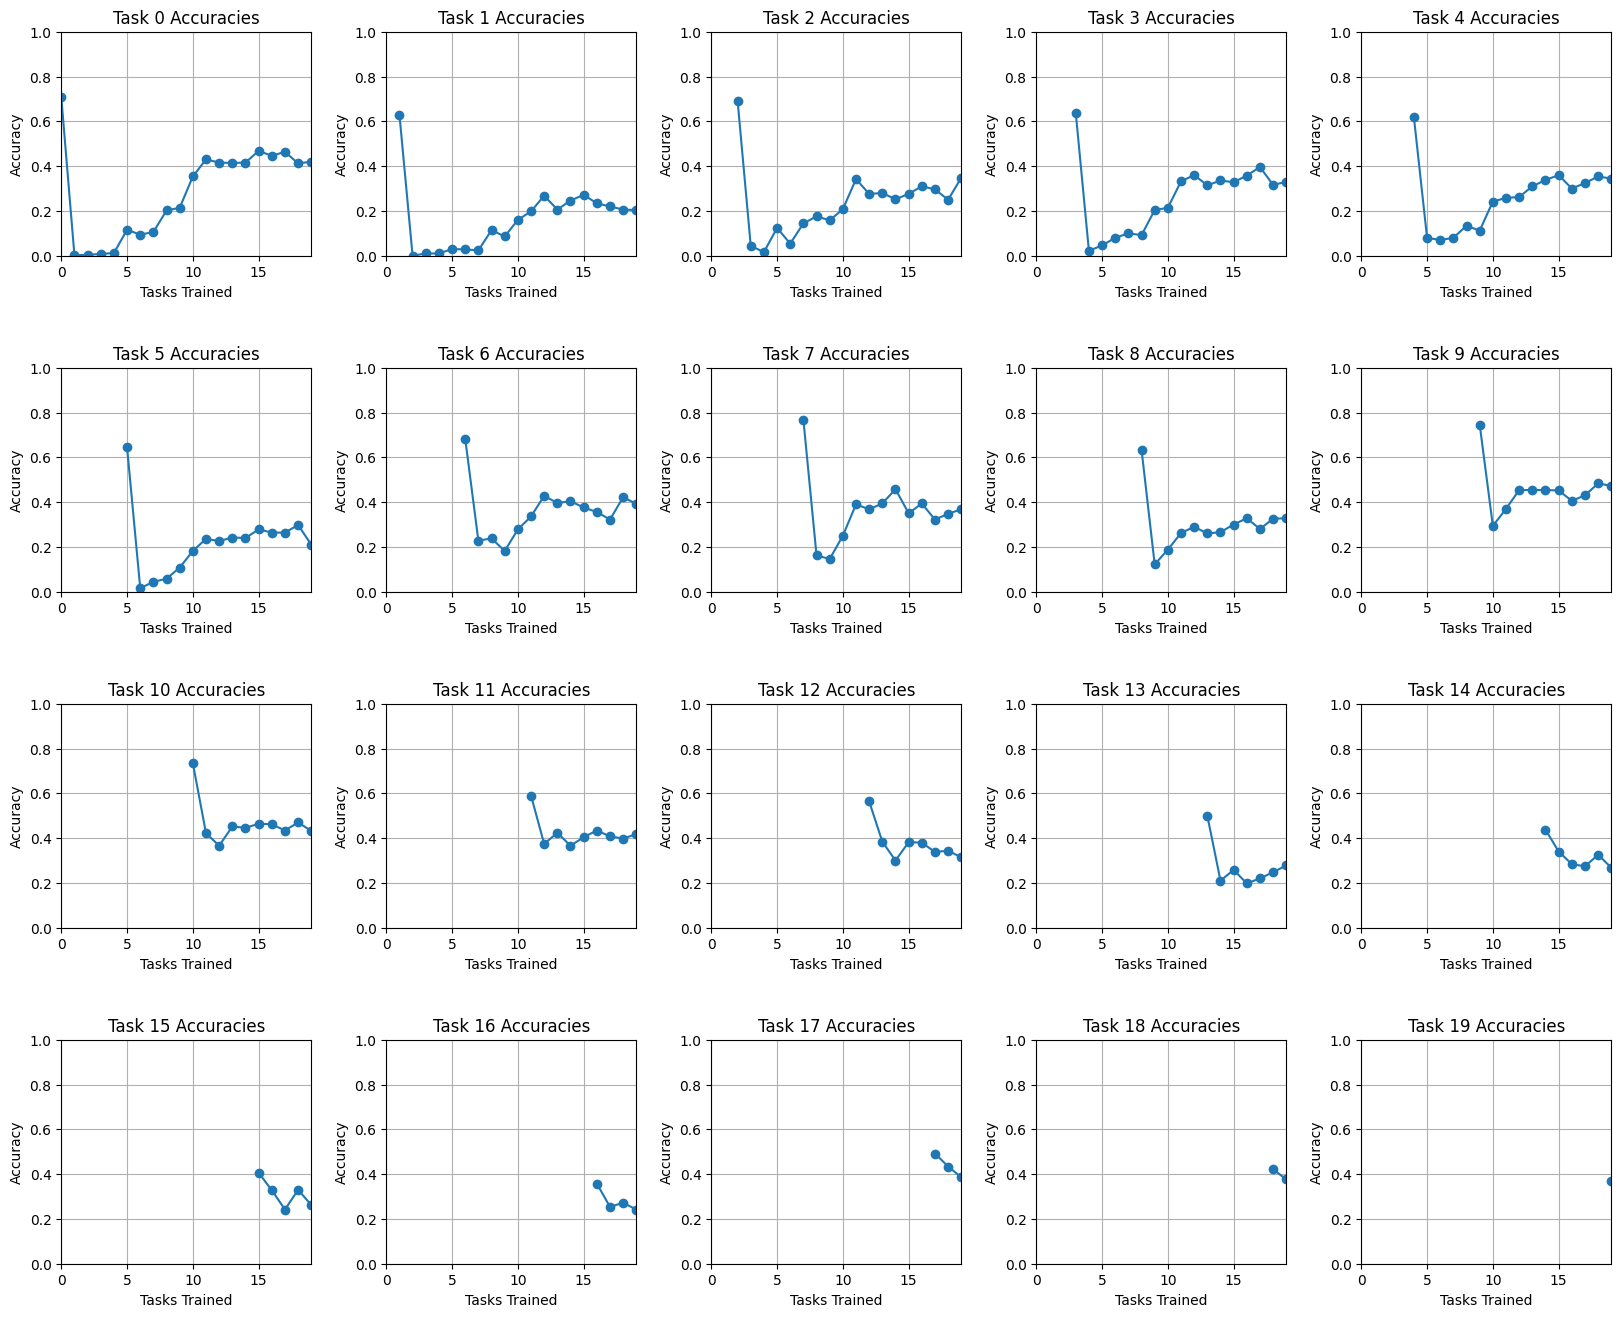

In [36]:
plot_task_accuracies_task(accuracies1, 'figures/task_mixup.png')

In [8]:
def plot_task_accuracies_average(task_accuracies, saved_name):
    acc = task_accuracies['average']
    acc = list(acc.values())
    
    plt.figure(figsize=(5, 4))
    plt.plot(acc, marker='o', linestyle='-')
    plt.title('Average accuracy')
    plt.xlabel('Task')
    plt.ylabel('Accuracy')
    plt.xlim(left=-0.5) 
    plt.ylim(0, 1)
#     plt.legend()
    plt.grid(True)
    plt.xticks(range(0, 20))
    
    plt.savefig(saved_name)
    plt.show()

In [43]:


def count_lines(file_path):
    count = 0
    try:
        with open(file_path, 'r') as file:
            for line in file:
                count += 1
    except FileNotFoundError:
        print("File not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    return count

#


In [44]:
# Path to the log file
log_file_path_method2 = 'log.txt'

def tail_to_new_file(input_file_path, output_file_path, n):
    with open(input_file_path, 'rb') as file:
        file.seek(0, 2)  # Move the cursor to the end of the file
        file_size = file.tell()
        buffer = bytearray()
        lines_count = 0
        
        # Starting from the end of the file, seek backwards
        for byte in range(file_size - 1, -1, -1):
            file.seek(byte)
            char = file.read(1)
            if char == b'\n':
                lines_count += 1
                if lines_count == n + 1:
                    break
            buffer.extend(char)
        
        # Reverse buffer to read lines from end to start
        buffer.reverse()
        lines = buffer.decode().splitlines()

    # Save the lines to the new file
    with open(output_file_path, 'w') as file:
        for line in lines:
            file.write(line + '\n')


In [45]:
import matplotlib.pyplot as plt
import re

# def parse_log_file_class(log_file_path, task_class_dict):
#     # Dictionary to store class accuracies where key is the class and value is a list of accuracies
#     class_accuracies = {i: [None] * 20 for i in range(100)}  # Assuming 100 classes

#     # Variable to track the current task being evaluated
#     current_task = -1

#     # Regular expression to identify and parse accuracy lines
#     acc_pattern = re.compile(r'Top1_ClassAcc_Exp/eval_phase/test_stream/Task000/(\d+) = (\d+)')

#     with open(log_file_path, 'r') as file:
#         for line in file:
#             line = line.strip()

#             # Check for the end of an evaluation phase to update the current task
#             if '-- >> End of eval phase << --' in line:
#                 current_task += 1
#                 print(current_task)

#             # Match lines containing class accuracies
#             match = acc_pattern.match(line)
#             if match:
#                 cls, acc = match.groups()
#                 cls, acc = int(cls), float(acc)
#                 print(cls, acc)

#                 # Store the accuracy from the task where the class first appears and onwards
#                 # Map the experience number `exp` to the correct task number
#                 if cls in task_class_dict.get(exp, []):
#                     if class_accuracies[cls][exp] is None:
#                         class_accuracies[cls][exp] = acc

#     return class_accuracies

def parse_log_file_class(file_path):
    # Initialize a dictionary to hold the accuracy list for each class
    class_accuracies = {i: [] for i in range(100)}  # Assuming 100 classes

    # Regular expression to match the accuracy entries
    pattern = re.compile(r"Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/(\d+) = (\d+\.\d+)")

    with open(file_path, 'r') as file:
        # Read the file line by line
        for line in file:
            line = line.strip()
            # Check for a match to the pattern
            match = pattern.match(line)
            if match:
                class_id, accuracy = match.groups()
                class_id = int(class_id)
                accuracy = float(accuracy)
                # Append the accuracy to the corresponding class' list
                class_accuracies[class_id].append(accuracy)

    return class_accuracies


import matplotlib.pyplot as plt

def plot_class_accuracies(class_accuracies, task_class_dict, saved_name):
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Iterate over each class and plot their accuracies
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies:
            accuracies = class_accuracies[cls]
            task_indices = list(range(first_appearance[cls], first_appearance[cls] + len(accuracies)))
            ax.plot(task_indices, accuracies, marker='o', linestyle='-', color='b', label=f'Class {cls}')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.grid(True)
        else:
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.grid(True)

    # Save the plot to a file
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.savefig(saved_name)
    plt.show()


In [46]:
import matplotlib.pyplot as plt

def plot_class_accuracies_mixed(class_accuracies, task_class_dict, saved_name, highlight_classes):
    """
    Plots class accuracies with highlighted classes in a different color.

    :param class_accuracies: Dictionary with class keys and list of accuracies as values.
    :param task_class_dict: Dictionary mapping task index to classes appearing in that task.
    :param saved_name: Filename to save the plot.
    :param highlight_classes: List of classes to highlight in a different color.
    """
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Define colors
    default_color = 'b'  # Default color for normal classes
    highlight_color = 'r'  # Color for highlighted classes

    # Iterate over each class and plot their accuracies
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies:
            accuracies = class_accuracies[cls]
            task_indices = range(first_appearance[cls], first_appearance[cls] + len(accuracies))
            color = highlight_color if cls in highlight_classes else default_color
            ax.plot(task_indices, accuracies, marker='o', linestyle='-', color=color, label=f'Class {cls}')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.grid(True)
        else:
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.grid(True)

    # Save the plot to a file
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.savefig(saved_name)
    plt.show()


In [47]:

# Example usage:
task2class = {
    0: [0, 36, 5, 20, 54],
    1: [45, 13, 19, 83, 22],
    2: [33, 73, 16, 26, 62],
    3: [98, 34, 74, 53, 24],
    4: [32, 4, 10, 51, 94],
    5: [38, 40, 41, 81, 50],
    6: [64, 69, 21, 89, 30],
    7: [68, 14, 49, 84, 88],
    8: [65, 6, 46, 80, 57],
    9: [72, 9, 48, 91, 31],
    10: [1, 7, 8, 76, 47],
    11: [75, 18, 86, 61, 63],
    12: [70, 43, 85, 59, 95],
    13: [35, 82, 25, 27, 93],
    14: [66, 67, 37, 44, 56],
    15: [2, 11, 78, 52, 60],
    16: [97, 99, 3, 39, 55],
    17: [71, 23, 90, 28, 29],
    18: [77, 15, 17, 87, 92],
    19: [96, 42, 12, 79, 58]
}


In [48]:
def truncate_class_accuracies(class_accuracies, task_class_dict):
    # Find the first appearance of each class
    first_appearance = {cls: None for cls in range(100)}  # Assuming 100 classes

    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Truncate the accuracy lists based on the first appearance
    truncated_accuracies = {}
    for cls, accuracies in class_accuracies.items():
        start_task = first_appearance[cls]
        if start_task is not None:
            truncated_accuracies[cls] = accuracies[start_task:]
        else:
            truncated_accuracies[cls] = []

    return truncated_accuracies


In [49]:
order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]
syn_classes = [order[4:] for order in order_list]
syn_classes = [item for lists in syn_classes for item in lists]
print(syn_classes)
real_classes = list(set([i for i in range(100)])-set(syn_classes))
print(len(real_classes))

[20, 19, 33, 53, 32, 41, 21, 68, 46, 31, 1, 86, 95, 82, 37, 52, 99, 90, 77, 58]
80


In [58]:
# class_accuracies1 = parse_log_file_class('logs/real_synthesis_fixedbudget_class.txt')
# dict_test1 = class_accuracies1
# outcome1 = truncate_class_accuracies(dict_test1, task2class)
# plot_class_accuracies(outcome1, task2class,'figures/real_synthesis_fixedbudget_class.png')

class_accuracies1 = parse_log_file_class('logs/new_ocl_cifar_80synreal_20synsyni2i_step16_all500test_knn10.txt')
dict_test1 = class_accuracies1
outcome1 = truncate_class_accuracies(dict_test1, task2class)
# plot_class_accuracies_mixed(outcome1, task2class,'figures/syntheticreal_synthetic.png', highlight_classes = syn_classes)


In [59]:
class_accuracies2 = parse_log_file_class('logs/new_ocl_cifar_80real_nosynsyn_step16_all500test.txt')
dict_test2 = class_accuracies2
outcome2 = truncate_class_accuracies(dict_test2, task2class)
# plot_class_accuracies_mixed(outcome2, task2class,'figures/figure2.png', highlight_classes = syn_classes)


In [80]:
def average_for_classes(dict_tar, order_list):
    new_dict = {}
    for class_id in list(dict_tar.keys()):
        re_list = dict_tar[class_id]
        ith, _ = find_integer_in_lists(order_list, class_id)
        new_dict[class_id] = sum(re_list)/(20-ith)
    return new_dict
        
def find_integer_in_lists(lists, number):
    for i, sublist in enumerate(lists):
        if number in sublist:
            return i, sublist.index(number)
    return None, None

In [81]:
i, _ = find_integer_in_lists(order_list, 5)
i

0

In [84]:
average_for_classes(dict_test2, order_list)

{0: 0.994,
 1: 0.8928,
 2: 0.9179999999999999,
 3: 0.959,
 4: 0.933375,
 5: 0.9868000000000002,
 6: 0.9485,
 7: 0.9346000000000002,
 8: 0.9837999999999999,
 9: 0.9794545454545452,
 10: 0.8866249999999999,
 11: 0.6788000000000001,
 12: 0.936,
 13: 0.9610526315789475,
 14: 0.9393846153846155,
 15: 0.984,
 16: 0.9493333333333334,
 17: 0.982,
 18: 0.9406666666666665,
 19: 0.9353684210526317,
 20: 0.9452999999999999,
 21: 0.9241428571428573,
 22: 0.9836842105263158,
 23: 0.8826666666666667,
 24: 0.9674117647058824,
 25: 0.9162857142857143,
 26: 0.9317777777777779,
 27: 0.9228571428571429,
 28: 0.9493333333333333,
 29: 0.988,
 30: 0.9630000000000001,
 31: 0.8881818181818183,
 32: 0.835,
 33: 0.818,
 34: 0.9905882352941181,
 35: 0.7405714285714285,
 36: 0.9844000000000003,
 37: 0.7493333333333334,
 38: 0.9833333333333333,
 39: 0.9915,
 40: 0.9424,
 41: 0.9183999999999998,
 42: 0.93,
 43: 0.98275,
 44: 0.919,
 45: 0.9245263157894739,
 46: 0.7559999999999999,
 47: 0.8999999999999998,
 48: 0.993

# 

In [17]:
def plot_class_accuracies_comparison(class_accuracies1, class_accuracies2, task_class_dict, saved_name):
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Plot accuracies for each class from both configurations
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies1 and cls in class_accuracies2:
            accuracies1 = class_accuracies1[cls]
            accuracies2 = class_accuracies2[cls]
            task_indices = list(range(first_appearance[cls], first_appearance[cls] + len(accuracies1)))

            # Ensure full range from 0 to 19 for x-axis, even if not all tasks have data
            full_range_accuracies1 = [None]*20
            full_range_accuracies2 = [None]*20
            for i, idx in enumerate(task_indices):
                full_range_accuracies1[idx] = accuracies1[i]
                full_range_accuracies2[idx] = accuracies2[i]

            ax.plot(range(20), full_range_accuracies1, marker='o', linestyle='-', color='red', label='image2image')
            ax.plot(range(20), full_range_accuracies2, marker='o', linestyle='-', color='blue', label='no i2i')

        ax.set_ylim([0, 1])
        ax.set_xlim([0, 20])
        ax.set_title(f'Class {cls}')
        ax.set_xlabel('Task Index')
        ax.set_ylabel('Accuracy')
        ax.grid(True)

    # Add a single legend for the whole figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')

    # Save the plot to a file
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for legend
    plt.savefig(saved_name)
    plt.show()

In [36]:
import matplotlib.pyplot as plt

def plot_class_accuracies_comparison2(class_accuracies1, class_accuracies2, highlight_classes, task_class_dict, saved_name):
    """
    Generate .txt files for each subfolder in the big folder, recording the path to images and their labels.
    
    :param class_accuracies1: Dictionary with class accuracies for the first configuration.
    :param class_accuracies2: Dictionary with class accuracies for the second configuration.
    :param highlight_classes: List of class indices to be highlighted with lighter colors.
    :param task_class_dict: Dictionary mapping task indices to lists of classes.
    :param saved_name: Name of the file to save the plot.
    """
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Define colors
    color1 = 'red'
    color2 = 'blue'
    highlight_color1 = 'lightcoral'
    highlight_color2 = 'cornflowerblue'

    # Plot accuracies for each class from both configurations
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies1 and cls in class_accuracies2:
            accuracies1 = class_accuracies1[cls]
            accuracies2 = class_accuracies2[cls]
            task_indices = list(range(first_appearance[cls], first_appearance[cls] + len(accuracies1)))

            # Ensure full range from 0 to 19 for x-axis, even if not all tasks have data
            full_range_accuracies1 = [None]*20
            full_range_accuracies2 = [None]*20
            for i, idx in enumerate(task_indices):
                full_range_accuracies1[idx] = accuracies1[i]
                full_range_accuracies2[idx] = accuracies2[i]

            # Use lighter colors for highlighted classes
            if cls in highlight_classes:
                ax.plot(range(20), full_range_accuracies1, marker='o', linestyle='-', color=highlight_color1, label='with synthetic', alpha=1)
                ax.plot(range(20), full_range_accuracies2, marker='o', linestyle='-', color=highlight_color2, label='without synthetic', alpha=1)
            else:
                ax.plot(range(20), full_range_accuracies1, marker='o', linestyle='-', color=color1, label='with synthetic')
                ax.plot(range(20), full_range_accuracies2, marker='o', linestyle='-', color=color2, label='without synthetic')

        ax.set_ylim([0, 1])
        ax.set_xlim([0, 20])
        ax.set_title(f'Class {cls}')
        ax.set_xlabel('Task Index')
        ax.set_ylabel('Accuracy')
        ax.grid(True)

    # Add a single legend for the whole figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=4, fontsize='large')

    # Save the plot to a file
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for legend
    plt.savefig(saved_name)
    plt.show()

# Example usage
# class_accuracies1 = {...}  # Dictionary mapping class index to a list of accuracies
# class_accuracies2 = {...}  # Dictionary mapping class index to a list of accuracies
# highlight_classes = [0, 1, 2, ...]  # List of class indices to be highlighted with lighter colors
# task_class_dict = {...}  # Dictionary mapping task index to a list of classes
# saved_name = 'comparison_plot.png'

# plot_class_accuracies_comparison(class_accuracies1, class_accuracies2, highlight_classes, task_class_dict, saved_name)


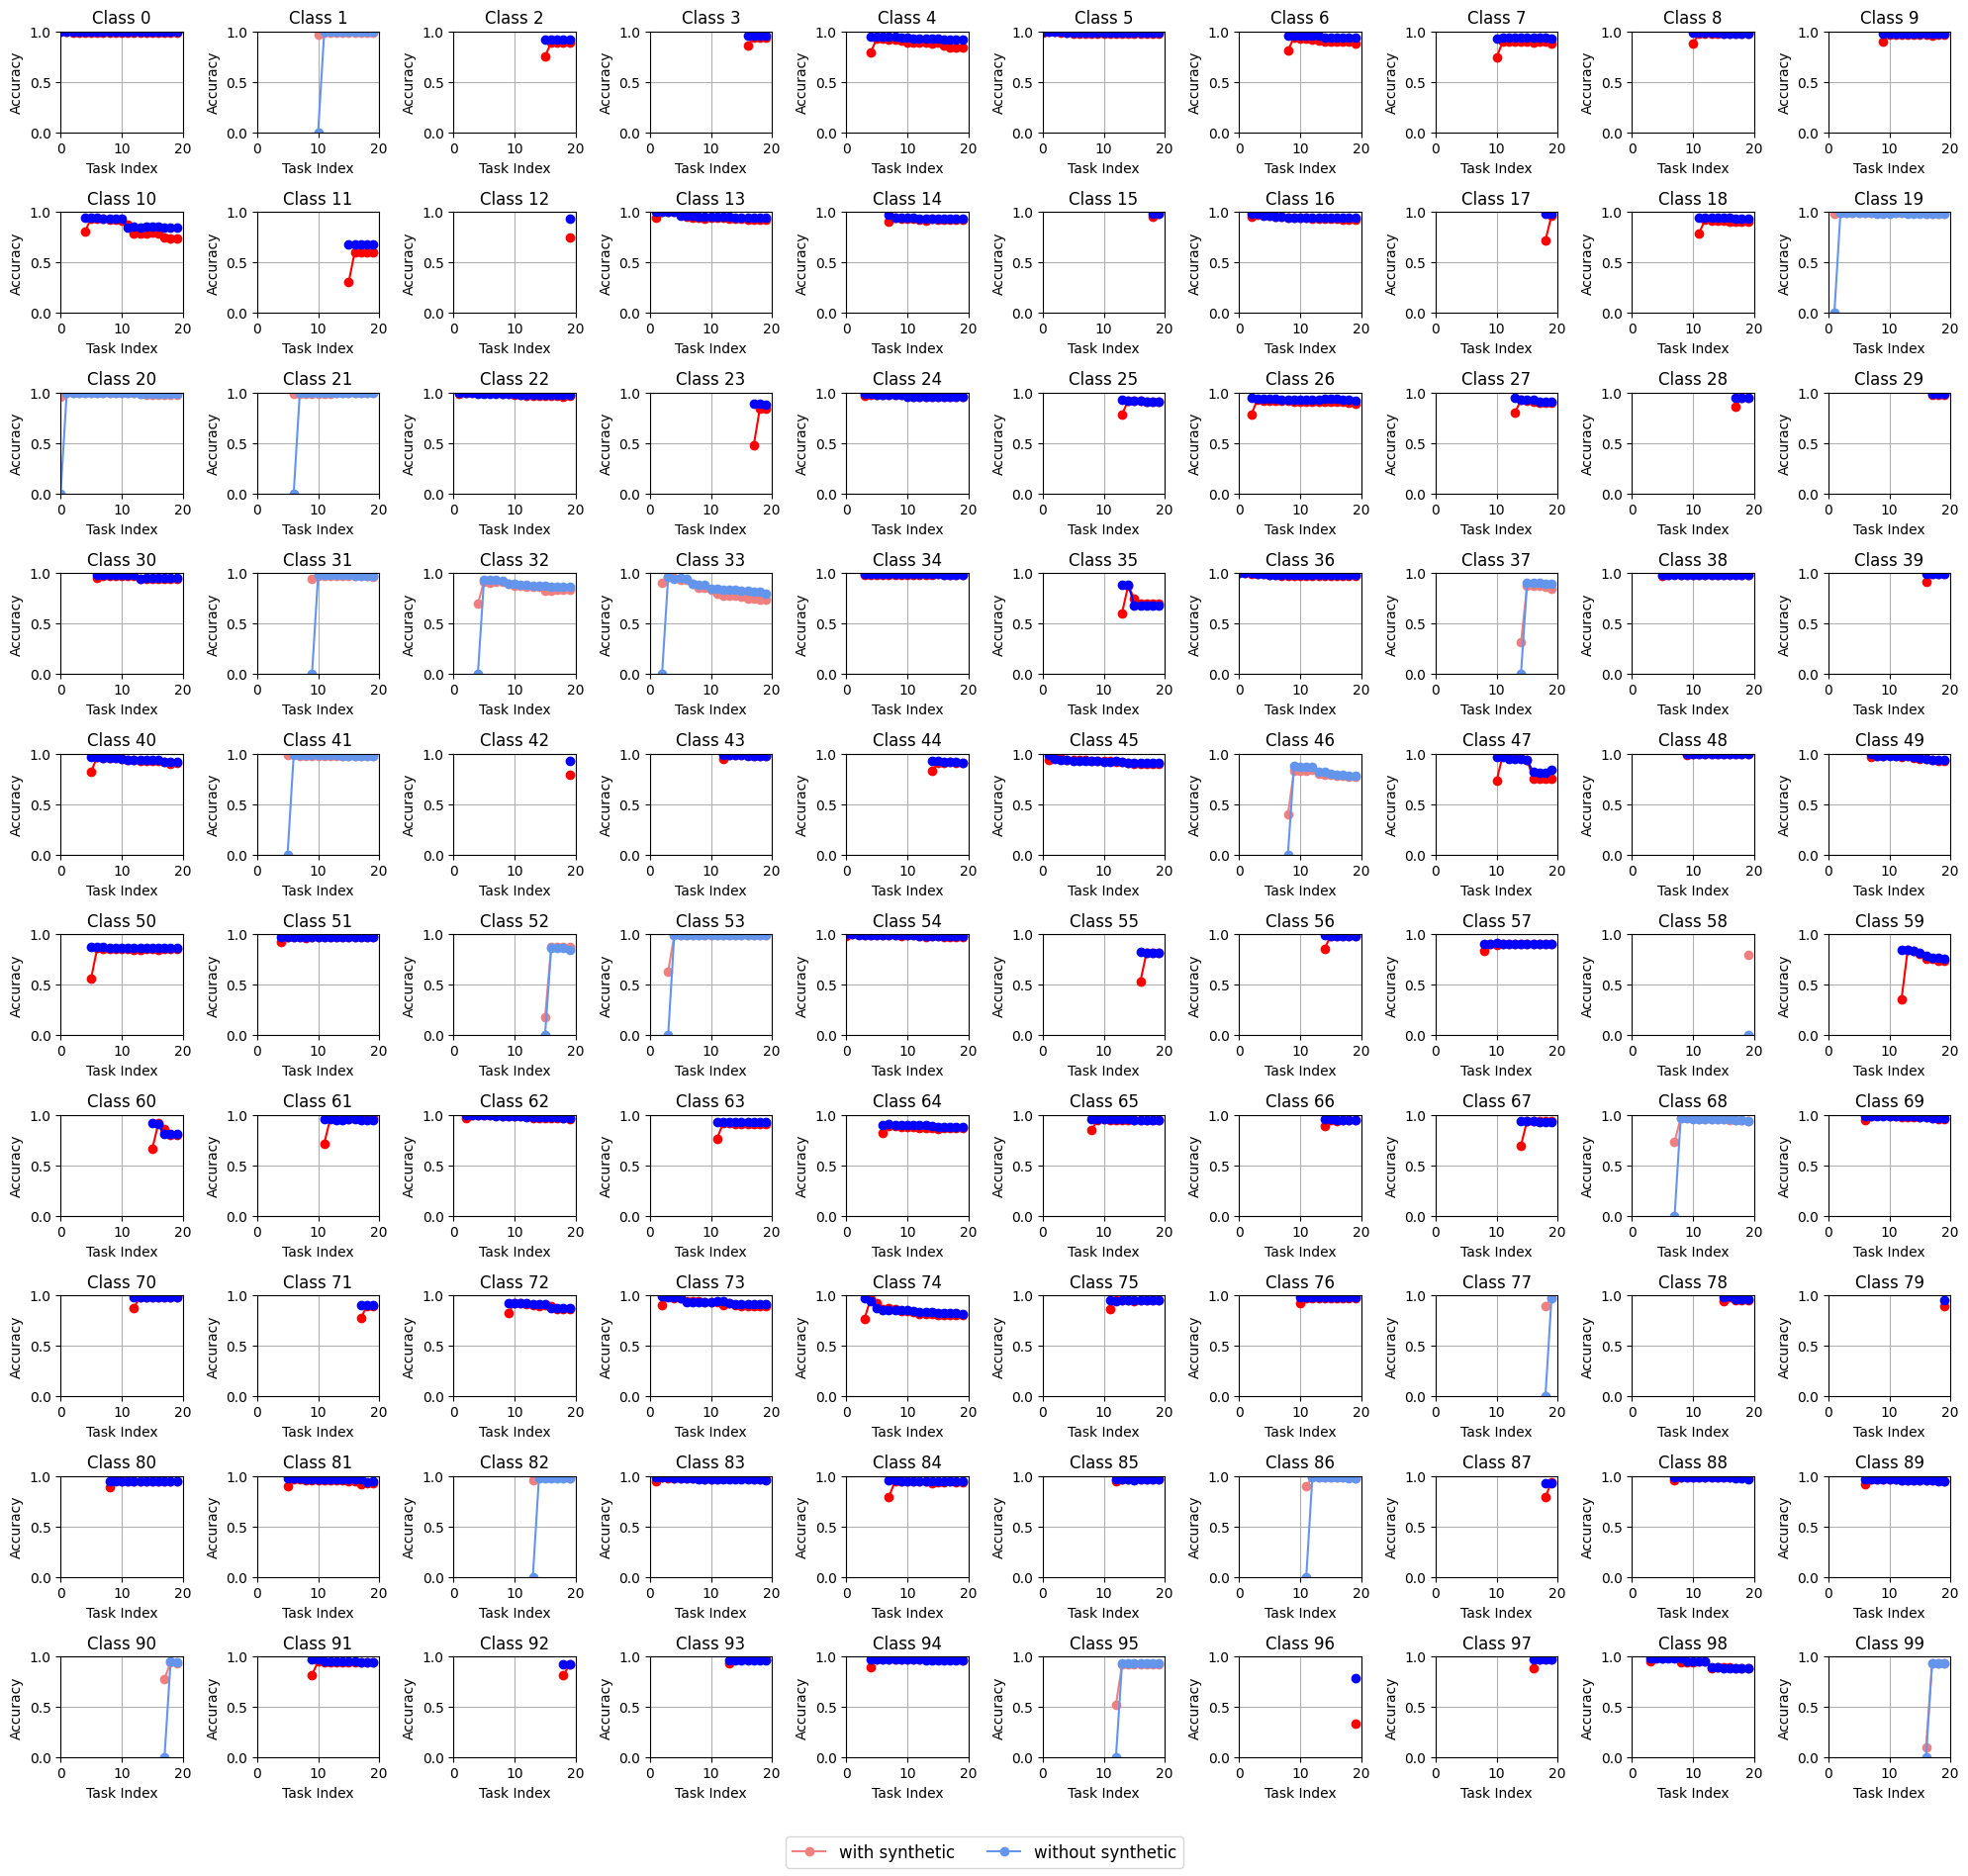

In [37]:
plot_class_accuracies_comparison2(outcome1, outcome2, syn_classes, task2class,'figures/figure2.png')


[[0.9990543735224587, 0.9990543735224587, 0.9990543735224587, 0.9990543735224587, 0.9990543735224587], [0.955435847208619, 0.9534769833496571, 0.9564152791381, 0.955435847208619], [0.9727854855923159, 0.9727854855923159, 0.9786552828175027], [0.9949647532729103, 0.9929506545820744], [0.9586485123550176], [0.9990543735224587, 0.9776280971854703, 0.9754601226993865, 0.9810402893850568, 0.9771]]


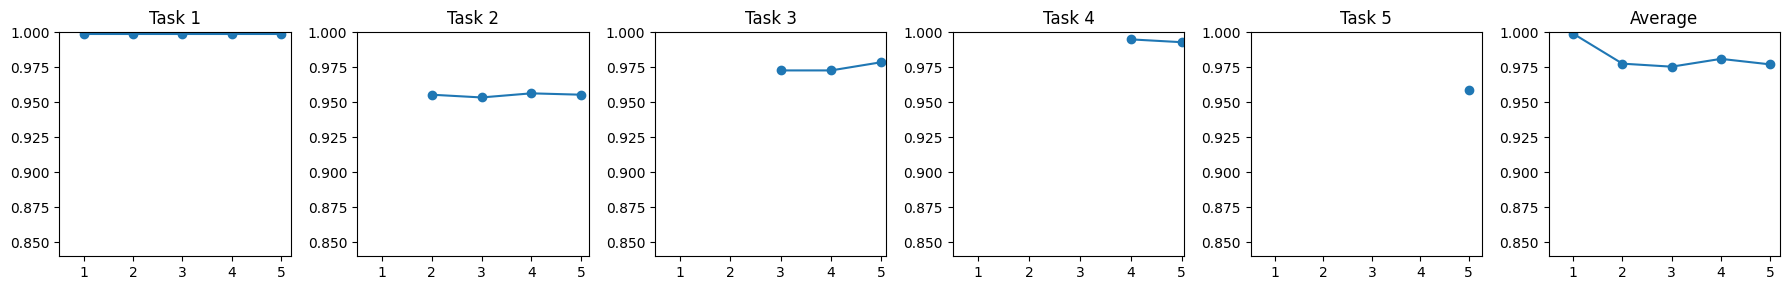

In [10]:
import matplotlib.pyplot as plt

# Sample accuracies for 6 tasks
accuracies = [[99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587], [95.5435847208619, 95.34769833496571, 95.64152791381, 95.5435847208619], [97.2785485592316, 97.2785485592316, 97.86552828175027], [99.49647532729104, 99.29506545820745], [95.86485123550176], [99.90543735224587, 97.76280971854703, 97.54601226993866, 98.10402893850568, 97.71]]

accuracies = [[item/100 for item in accuracy] for accuracy in accuracies]

print(accuracies)
    

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))  # 6 images in a row


# Plot each set of accuracies in a subplot
for idx, (ax, accuracy) in enumerate(zip(axes, accuracies)):
    if idx < 5:
        x_values = [i for i in range(idx+1, 6)]  # X values based on accuracy length
        y_values = accuracy

        ax.plot(x_values, y_values, marker='o')

        ax.set_xlim(left=0.5) 
        ax.set_ylim(0.84, 1)

        ax.set_xticks(range(1, 6))
        ax.set_title(f"Task {idx + 1}")

    # Optional: Set titles for each subplot
    else:
        x_values = [i for i in range(1,6)]  # X values based on accuracy length
        y_values = accuracy

        ax.plot(x_values, y_values, marker='o')

        ax.set_xlim(left=0.5) 
        ax.set_ylim(0.84, 1)

        ax.set_xticks(range(1, 6))
        ax.set_title("Average")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot to a file
# plt.savefig('/mnt/data/accuracy_plots.png')

# Display the plot in the output
plt.show()


In [29]:
def plot_start_from_middle(acc1, acc2, acc3, acc4, acc5, acc6):
    acc1 = [[item/100 for item in accuracy] for accuracy in acc1]
    acc2 = [[item/100 for item in accuracy] for accuracy in acc2]
    acc3 = [[item/100 for item in accuracy] for accuracy in acc3]
    acc4 = [[item/100 for item in accuracy] for accuracy in acc4]
    acc5 = [[item/100 for item in accuracy] for accuracy in acc5]
    acc6 = [[item/100 for item in accuracy] for accuracy in acc6]
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))  # 6 images in a row


    # Plot each set of accuracies in a subplot
    for idx, (ax, a1, a2, a3, a4, a5, a6) in enumerate(zip(axes, acc1, acc2, acc3, acc4, acc5, acc6)):
        if idx < 5:
            x_values = [i for i in range(idx+1, 6)]  # X values based on accuracy length
            y1 = a1
            y2 = a2
            y3 = a3
            y4 = a4
            y5 = a5
            y6 = a6

            ax.plot(x_values, y1, marker='o', label = 'VCL+Corset')
            ax.plot(x_values, y2, marker='^', label = 'VCL+Resampled Corset')
            ax.plot(x_values, y3, marker='x', label = 'VCL+Ordered-Max Similar')
            ax.plot(x_values, y4, color = 'blue',marker='D', label = 'VCL+Ordered-Max Dissimilar')
            ax.plot(x_values, y5, marker='o', label = 'VCL+Scaling Factor')
            ax.plot(x_values, y6,color = 'red',marker='s', label = 'VCL+Ordered-Max Dissimilar+Scaling Factor')


            ax.set_xlim(left=0.5) 
            ax.set_ylim(0.89, 1.01)

            ax.set_xticks(range(1, 6))
            ax.set_title(f"Task {idx + 1}")
            if idx == 0:
                ax.set_ylabel('Accuarcy')

        # Optional: Set titles for each subplot
        else:
            x_values = [i for i in range(1,6)]  # X values based on accuracy length
            y1 = a1
            y2 = a2
            y3 = a3
            y4 = a4
            y5 = a5
            y6 = a6

            ax.plot(x_values, y1, marker='o', label = 'VCL+Corset')
            ax.plot(x_values, y2, marker='^', label = 'VCL+Resampled Corset')
            ax.plot(x_values, y3, marker='x', label = 'VCL+Ordered-Max Similar')
            ax.plot(x_values, y4,color = 'blue', marker='+', label = 'VCL+Ordered-Max Dissimilar')
            ax.plot(x_values, y5, marker='o', label = 'VCL+Scaling Factor')
            ax.plot(x_values, y6,color = 'red', marker='s', label = 'VCL+Ordered-Max Dissimilar+Scaling Factor')

            ax.set_xlim(left=0.5) 
            ax.set_ylim(0.89, 1.01)

            ax.set_xticks(range(1, 6))
            ax.set_title("Average")

# #     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
#     plt.tight_layout()
#     ax.legend(loc='upper center'
# #               , bbox_to_anchor=(0.5, 1.05),
#              )
    
#     plt.show()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.00))

    plt.tight_layout(rect=[0, 0, 1, 0.90])  # Adjust the rect to make space for the legend
    plt.savefig('accuracy_plot.png',dpi = 600)
    plt.show()


    

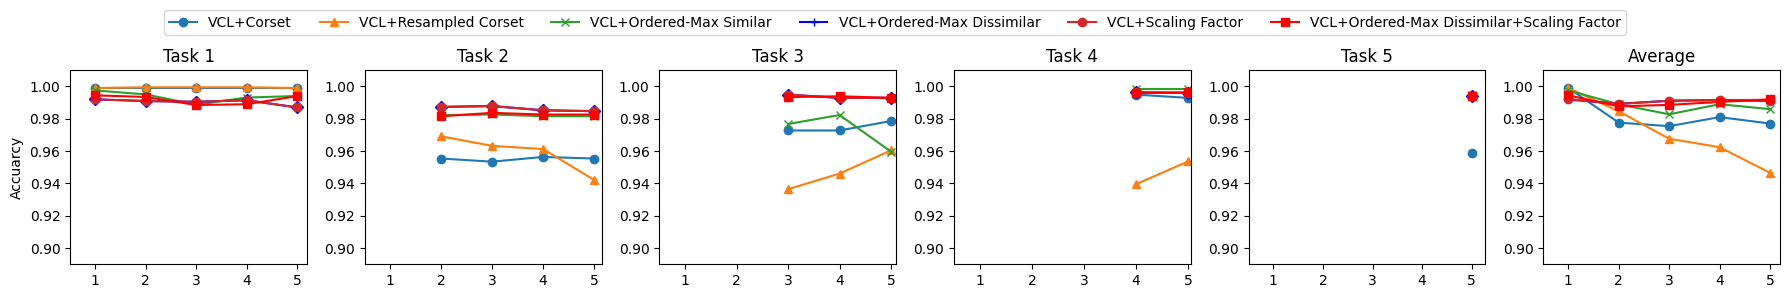

In [30]:
acc1 = [[99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587], [95.5435847208619, 95.34769833496571, 95.64152791381, 95.5435847208619], [97.2785485592316, 97.2785485592316, 97.86552828175027], [99.49647532729104, 99.29506545820745], [95.86485123550176], [99.90543735224587, 97.76280971854703, 97.54601226993866, 98.10402893850568, 97.71]]

acc_random = [[99.90543735224587, 99.95271867612293, 99.95271867612293, 99.95271867612293, 99.90543735224587], [96.91478942213516, 96.32713026444662, 96.13124387855044, 94.22135161606268], [93.64994663820704, 94.61045891141943, 96.05122732123799], [93.95770392749245, 95.36757301107754], [87.49369641956632], [99.90543735224587, 98.4604281934087, 96.76670535566241, 96.24547835848821, 94.66]]

acc_order_similar = [[99.75514201762978, 99.51028403525955, 98.87365328109696, 99.31439764936337, 99.41234084231147], [98.21621621621621, 98.27027027027027, 98.16216216216216, 98.16216216216216], [97.68028240040343, 98.23499747856782, 95.96570852244075], [99.84709480122324, 99.84709480122324], [99.4914470642626], [99.75514201762978, 98.89516957862281, 98.28085106382979, 98.90264131683043, 98.6]]

acc_order_dissimilar = [[99.2023928215354, 99.10269192422732, 99.05284147557327, 99.15254237288136, 98.70388833499501], [98.73750657548659, 98.79011046817465, 98.52709100473434, 98.47448711204629], [99.49647532729104, 99.29506545820745, 99.29506545820745], [99.64322120285424, 99.59225280326197], [99.44055944055944], [99.2023928215354, 98.92500639877143, 99.11759714916002, 99.15977084659453, 99.11]]

acc_scale = [[99.95271867612293, 99.95271867612293, 99.95271867612293, 99.90543735224587, 99.90543735224587], [97.94319294809011, 97.35553379040157, 97.25759059745347, 96.42507345739472], [99.51974386339381, 99.41302027748132, 99.09284951974387], [99.69788519637463, 98.99295065458207], [97.52899646999495], [99.95271867612293, 98.96560019244647, 98.93881611673022, 99.06448796307846, 98.39]]

acc_dis_scale = [[99.45164506480559, 99.3519441674975, 98.85343968095712, 98.90329012961116, 99.40179461615155], [98.15886375591793, 98.36927932667017, 98.26407154129406, 98.26407154129406], [99.34541792547834, 99.39577039274924, 99.29506545820745], [99.59225280326197, 99.64322120285424], [99.39393939393939], [99.45164506480559, 98.77143588431021, 98.86305786526387, 99.04519414385742, 99.21]]
plot_start_from_middle(acc1, acc_random, acc_order_similar, acc_order_dissimilar, acc_order_dissimilar, acc_dis_scale)

## images

In [12]:
import os
import random
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def display_images_in_grid(folder_path, final_image_path, num_images=7, grid_size=(1, 7), target_size=(32, 32)):
    """
    Display a grid of images randomly sampled from a folder, with image class labels below each image, 
    and save the final combined image.

    Args:
    folder_path (str): The path to the folder containing images.
    save_path (str): The path where the final combined image will be saved.
    num_images (int): Number of images to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying the images.
    target_size (tuple): The target size (width, height) to which images should be resized.
    """
    # Ensure the folder exists and is a directory
    if not os.path.isdir(folder_path):
        print("The specified path is not a valid directory.")
        return
    
    # Get all files in the directory and filter for image files
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Randomly select files
    if len(image_files) < num_images:
        print("Not enough image files to sample from.")
        return
    
    sampled_files = random.sample(image_files, num_images)

    # Plot images in a grid
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(grid_size[1]*3, grid_size[0]*3))
    
    for ax, image_file in zip(axes.flat, sampled_files):
        image_path = os.path.join(folder_path, image_file)
        
        # Load image and resize it
        img = Image.open(image_path)
        img = img.resize(target_size, Image.ANTIALIAS)
        
        # Convert resized image back to a format that can be displayed
        img = np.array(img)
        
        ax.imshow(img)
        ax.axis('off')  # Hide axes
        
        # Extract class name and use it as the label below the image
        match = re.match(r"([a-zA-Z]+)", image_file)
        caption = match.group(1) if match else image_file.split('.')[0]
        ax.set_title(caption, fontsize=11, y=-0.1)  # Adjust placement to appear below the image

    plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between images

    # Save the final figure as an image file
#     final_image_path = os.path.join(save_path, "combined_image.png")
    plt.savefig(final_image_path, bbox_inches='tight', pad_inches=0.1)
    
    plt.show()



/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


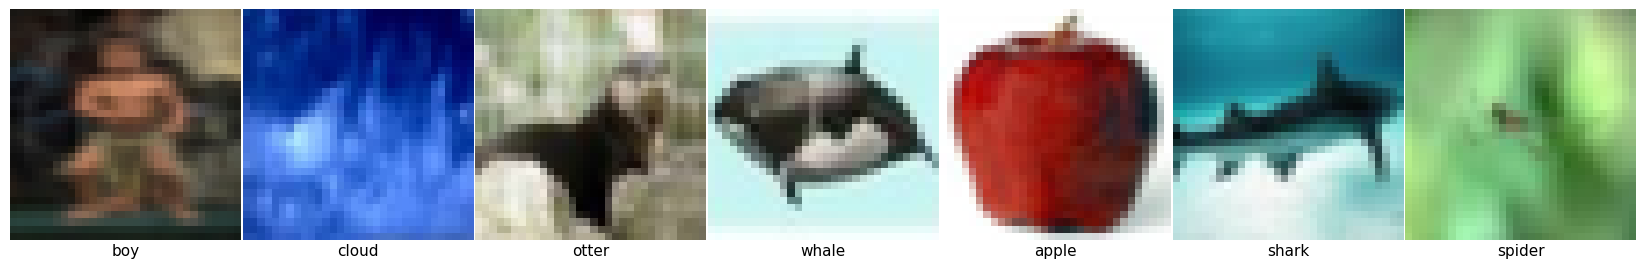

In [13]:
# 'saved_data/sdxl_llava_synfromreal_text2image',
#            'saved_data/sdxl_llava_synfromreal_text2image_shortprompt',
# Example usage
# folder_path = '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_20synfrom80real_i2i_step28'
folder_path = 'saved_data/cifar_train_all_fortest'
# folder_path = '/scratch/local/ssd/enbo/saved_data/imagenet_train_data_allimages'
display_images_in_grid(folder_path, 'figures/cifar_examples.png')


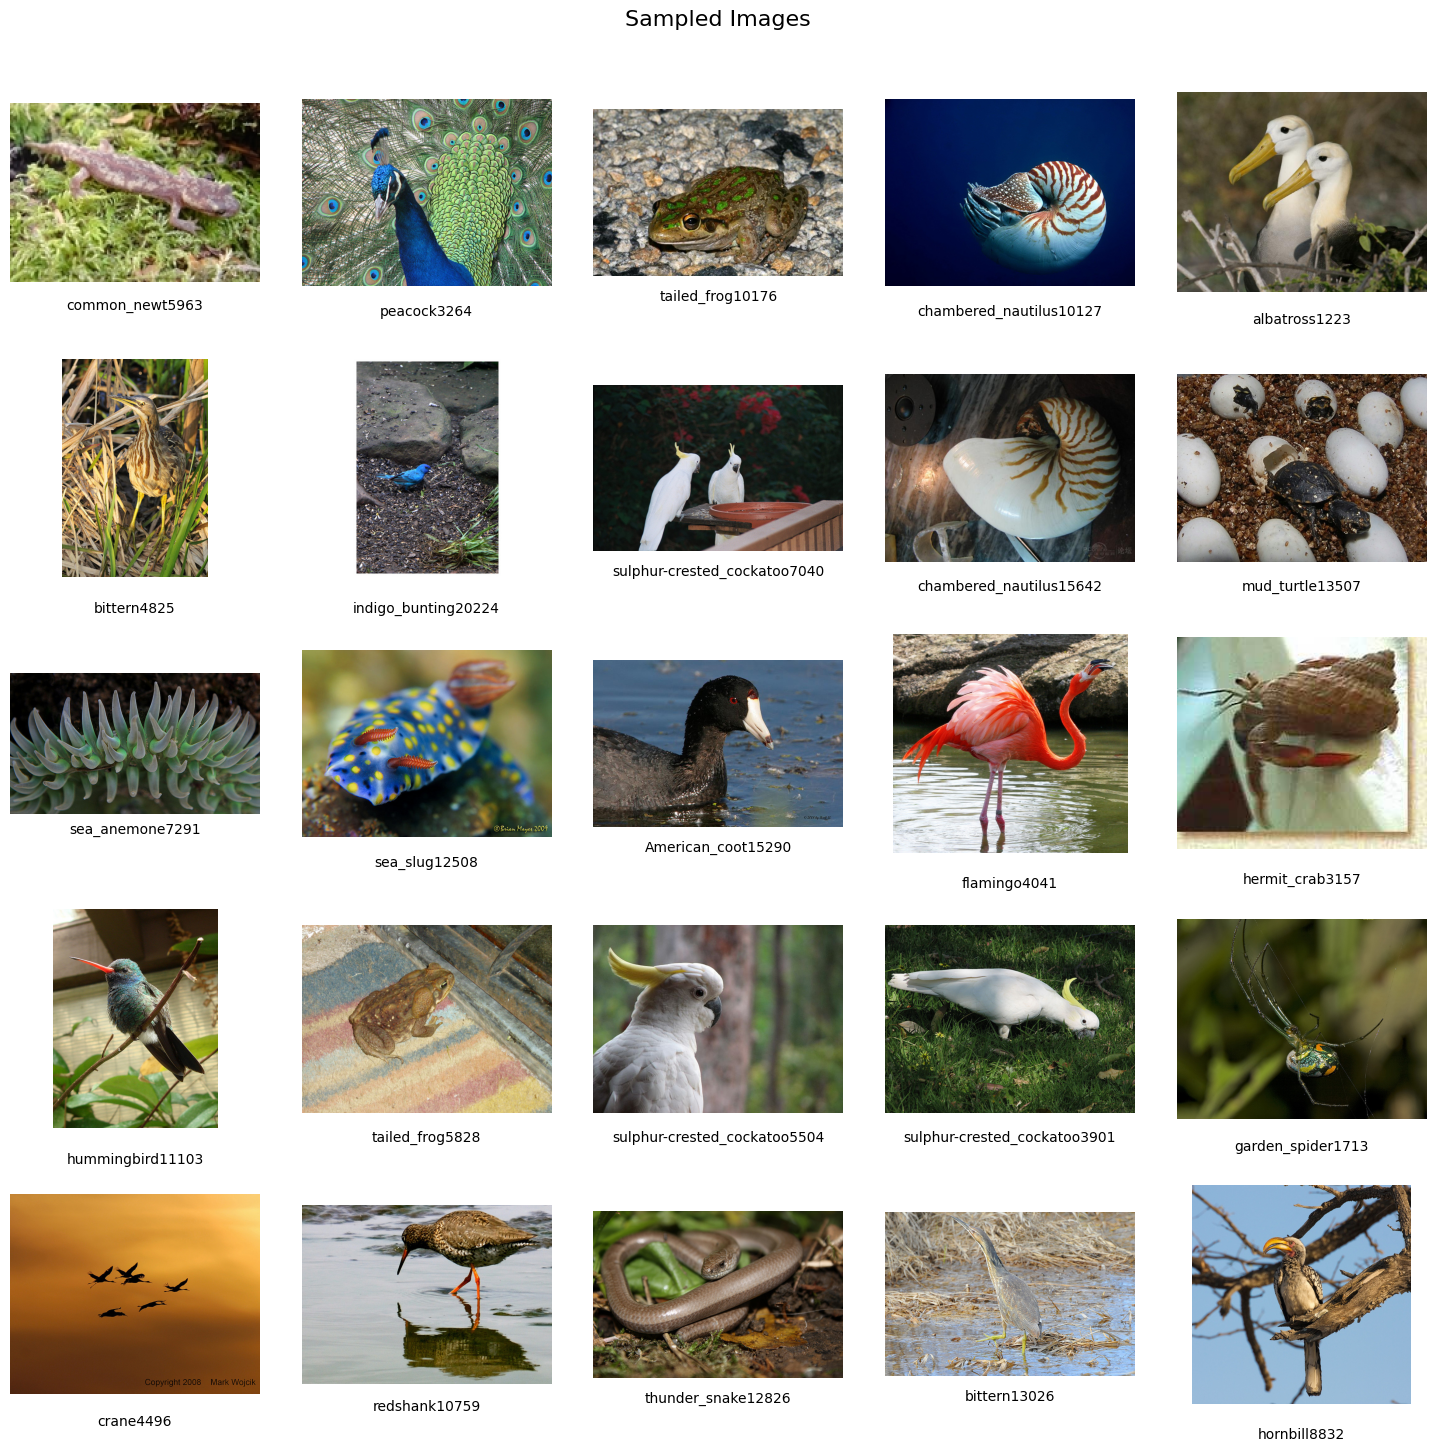

In [8]:
# Example usage
folder_path = 'saved_data/ImageNet/ImageNet_train_renamed_10percent'
display_images_in_grid(folder_path)


In [69]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_classes(folder_path, classes, num_images=9, grid_size=(3, 3)):
    """
    Display a grid of images sampled from specific classes in a folder.

    Args:
    folder_path (str): Path to the folder containing images.
    classes (list): List of class names to include in the sampling.
    num_images (int): Number of images to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying images.
    """
    # Ensure the folder exists and is a directory
    if not os.path.isdir(folder_path):
        print("The specified path is not a valid directory.")
        return

    # Get all files in the directory and filter for image files that start with any of the specified class names
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    filtered_files = [f for f in all_files if any(f.startswith(cls) for cls in classes) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Randomly select files
    if len(filtered_files) < num_images:
        print(f"Not enough image files to sample from. Found only {len(filtered_files)} files.")
        return
    random.seed(42)
    sampled_files = random.sample(filtered_files, num_images)

    # Plot images in a grid
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 15))
    fig.suptitle('Sampled Images from Specific Classes', fontsize=16)

    for ax, image_file in zip(axes.flat, sampled_files):
        image_path = os.path.join(folder_path, image_file)
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')  # Hide axes
        ax.set_title(image_file.split('_')[0], fontsize=10, y=-0.15)  # Display the class part of the filename

    plt.tight_layout(pad=3.0)  # Adjust layout to make room for class labels
    plt.show()


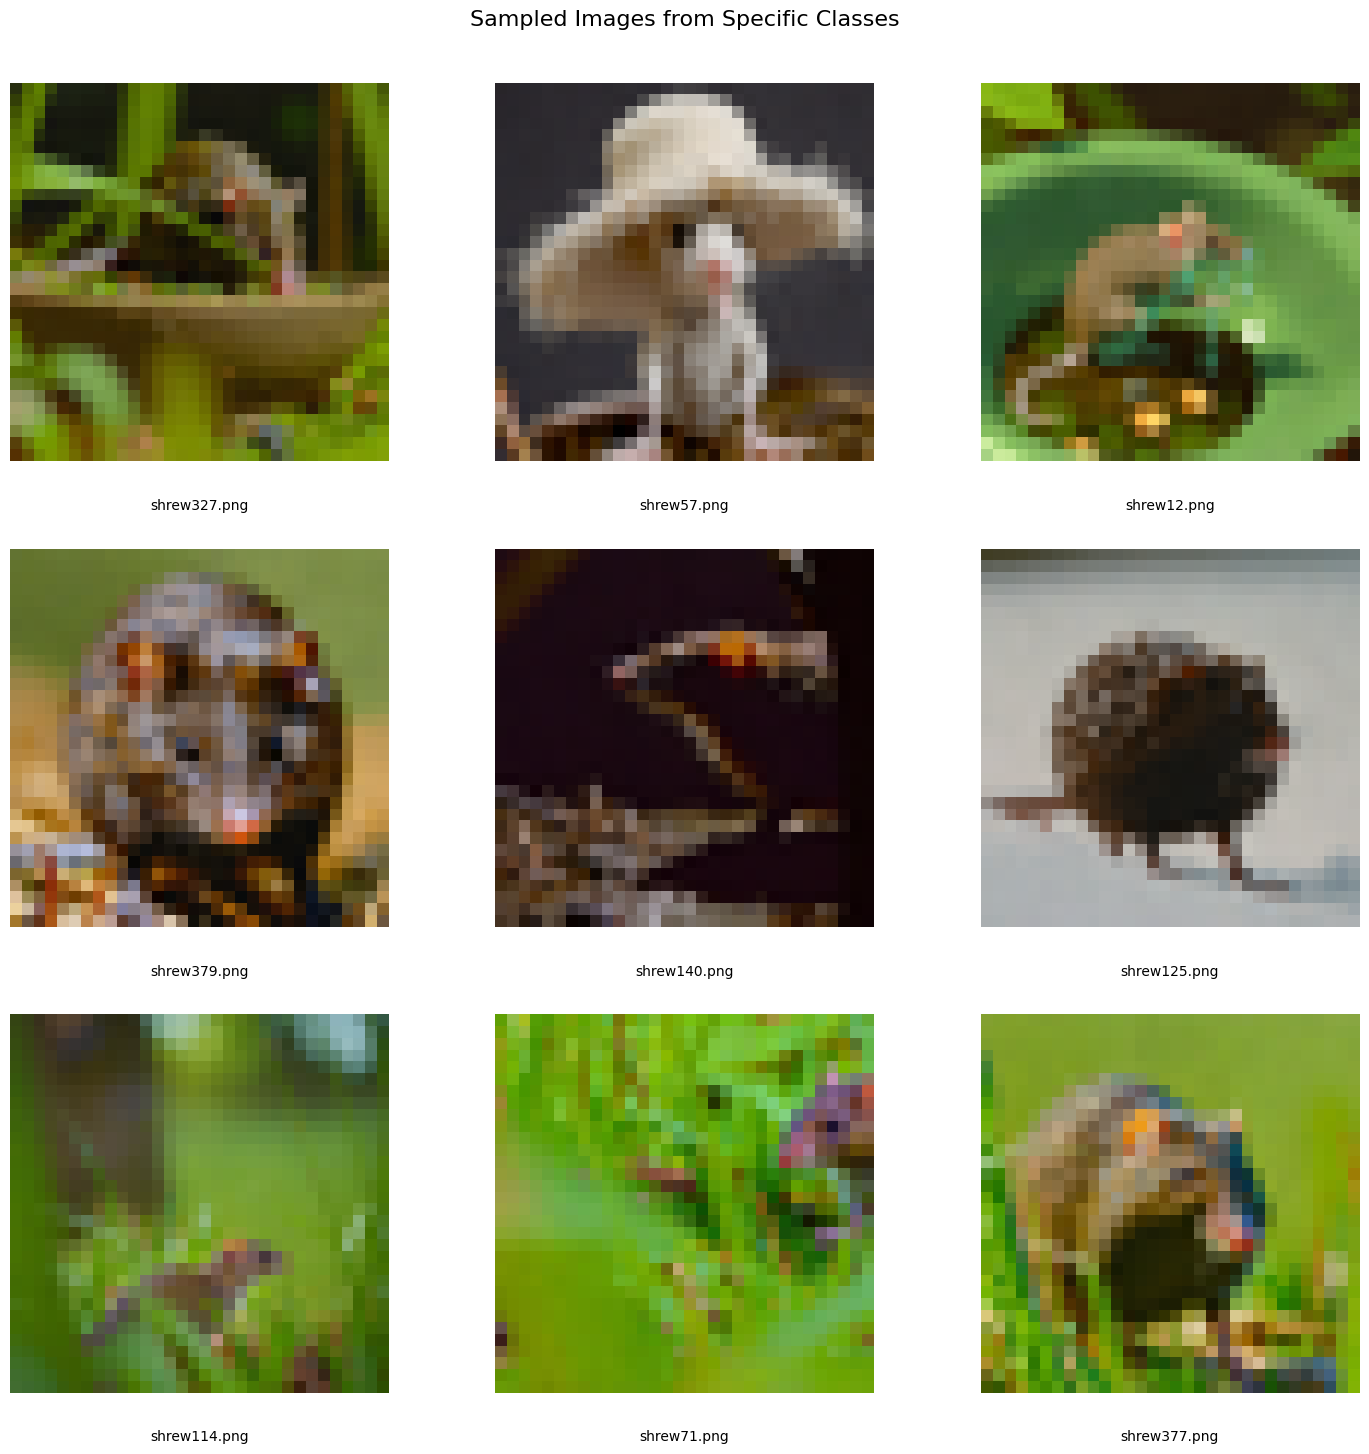

In [71]:
# Example usage
 # '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image',
 #          '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image_shortprompt'
# folder_path = '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image_shortprompt'
folder_path = 'saved_data/sdxl_llava_synfromreal_s8g2'
classes = ['shrew']  # Replace with actual class names
display_images_from_classes(folder_path, classes)


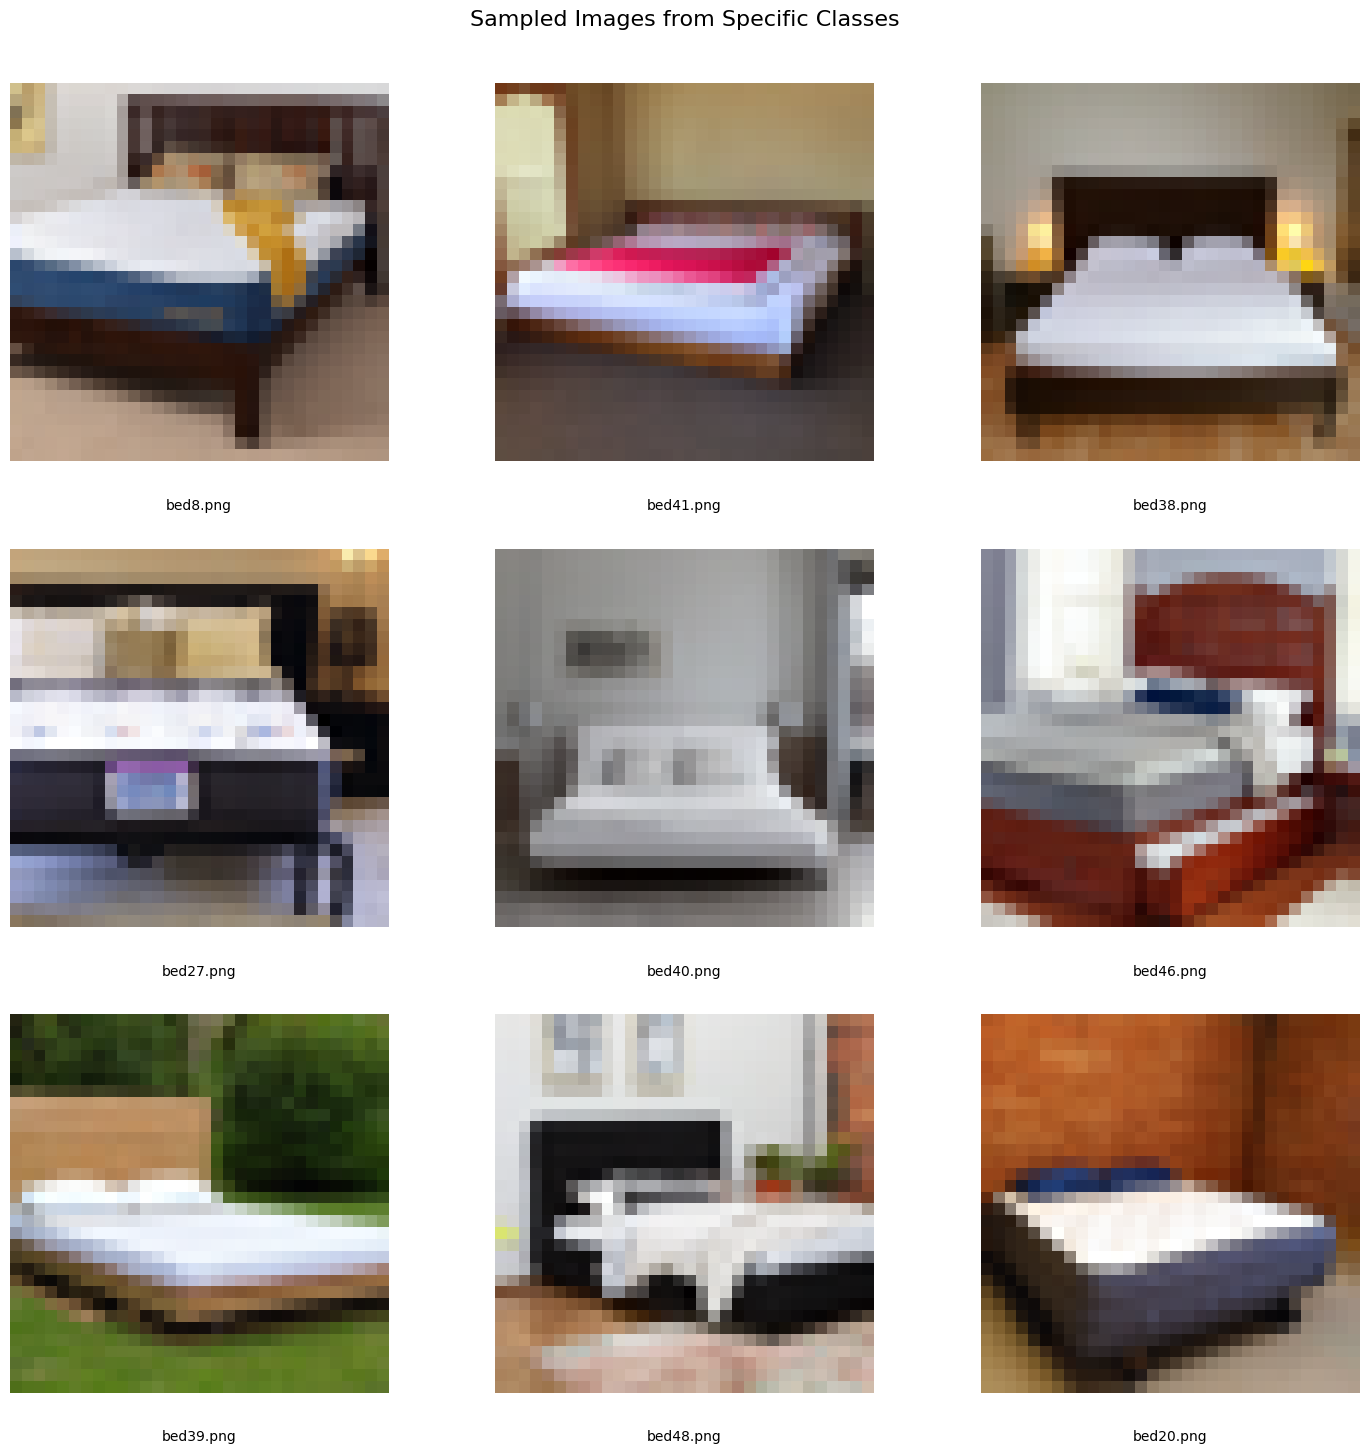

In [10]:
folder_path = 'saved_data/sd_scale8/cifar100_sd_v15_0314_scale_8_seed41'
classes = ['bed']  # Replace with actual class names
display_images_from_classes(folder_path, classes)

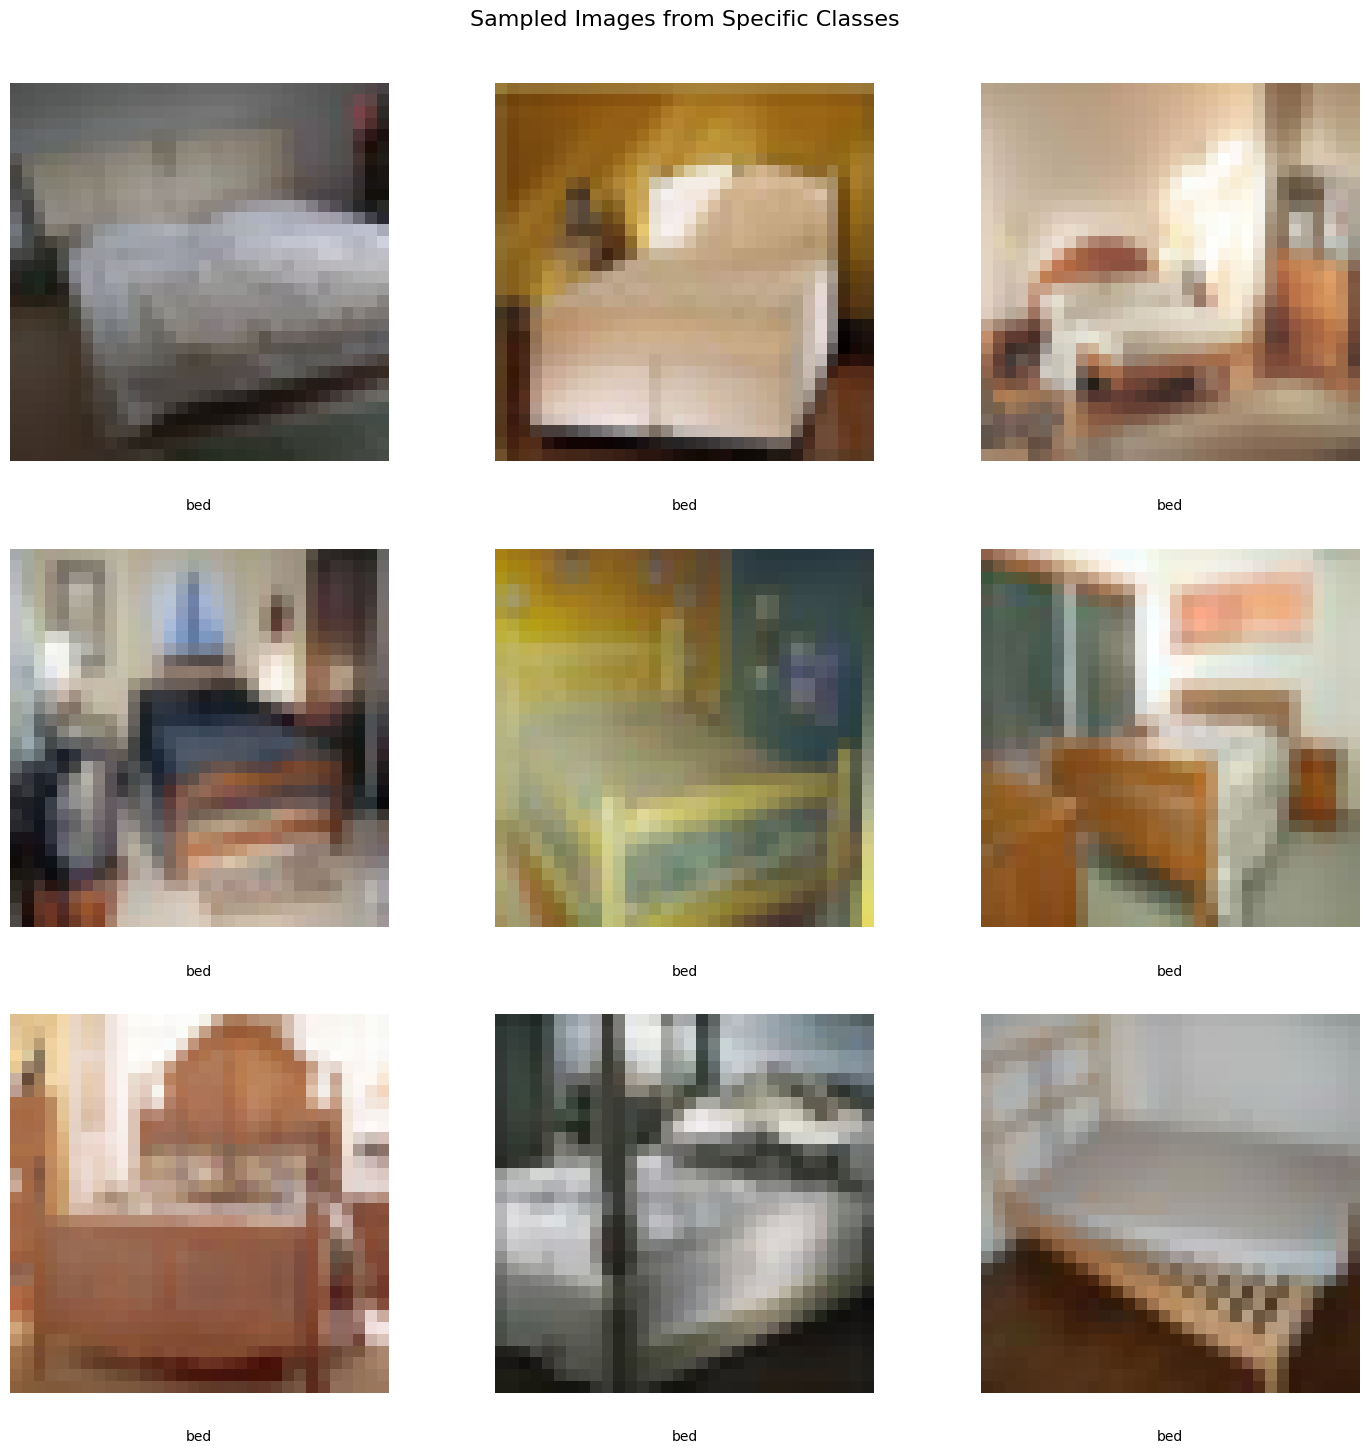

In [39]:
folder_path = 'saved_data/cifar0413_100'
classes = ['bed']  # Replace with actual class names
display_images_from_classes(folder_path, classes)

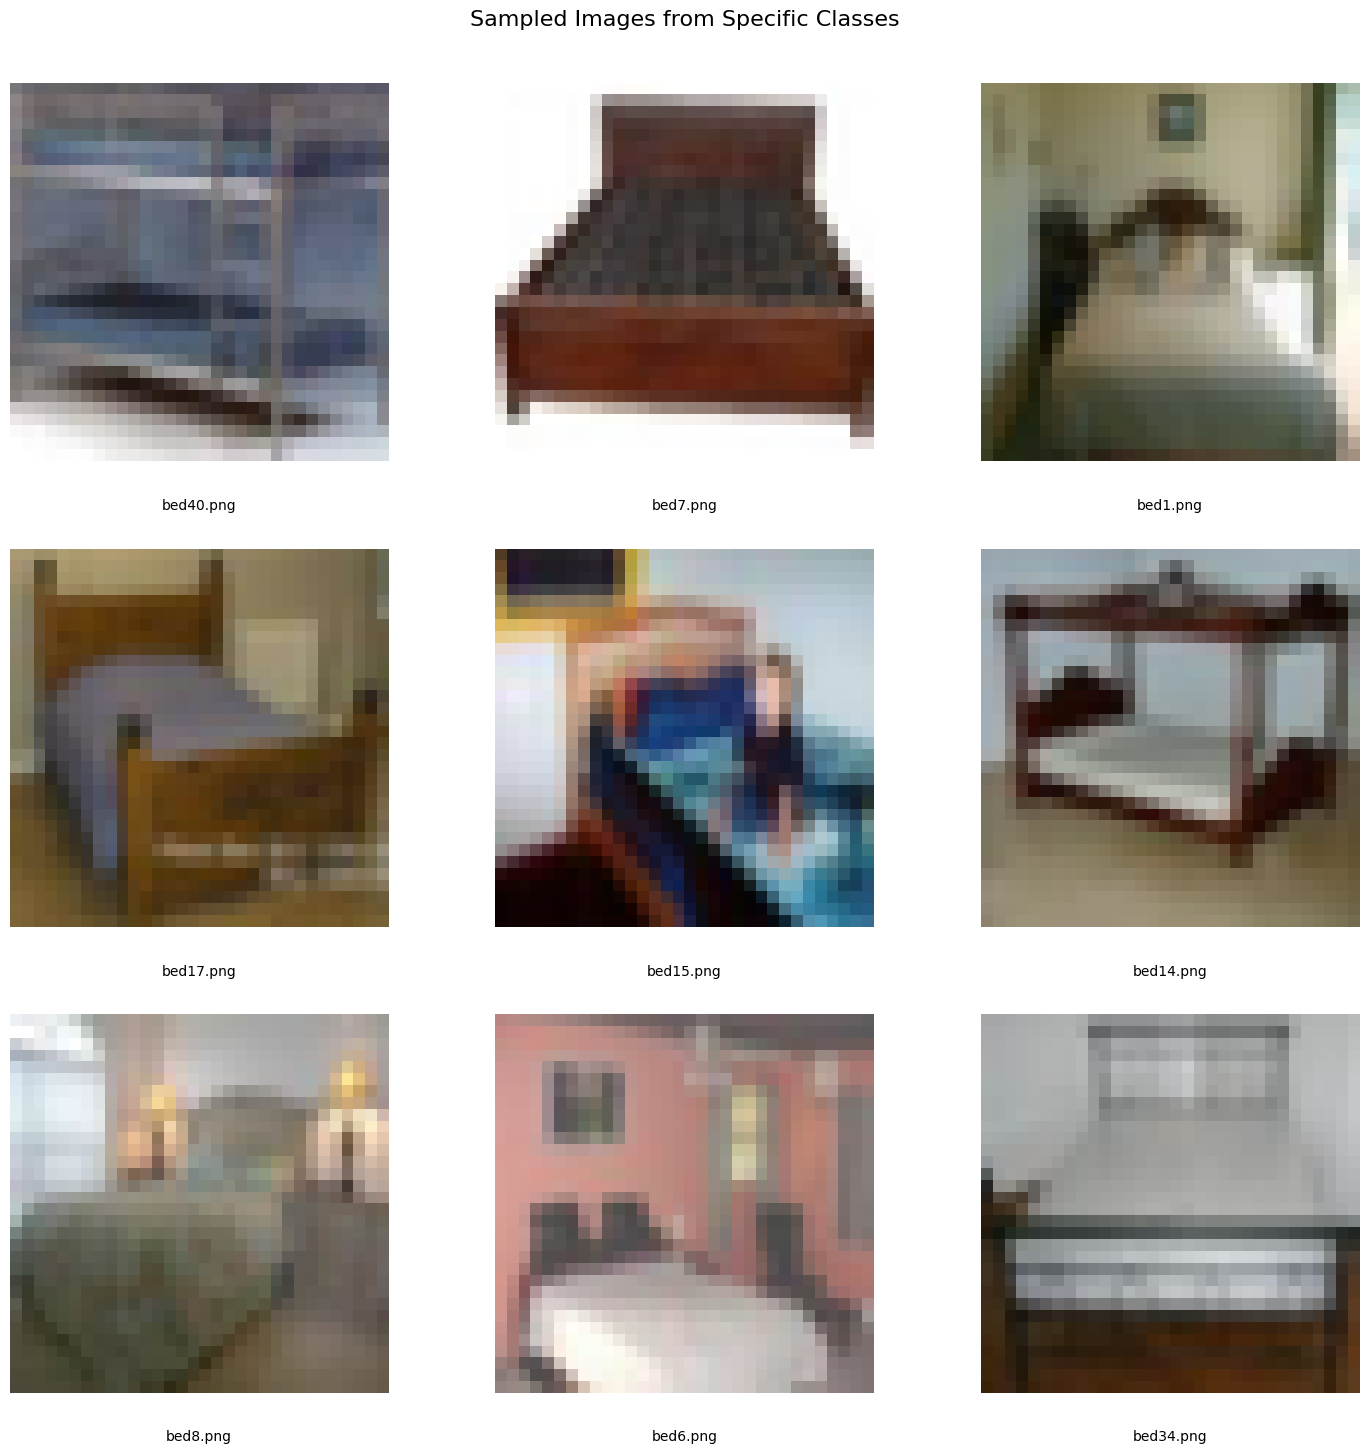

In [12]:
folder_path = 'saved_data/llava_saved_data_310/cifar_50'
classes = ['bed']  # Replace with actual class names
display_images_from_classes(folder_path, classes)

In [3]:
def display_images_from_classes(folder_path1, folder_path2, classes, num_images=9, grid_size=(3, 3)):
    """
    Display a grid of images sampled from specific classes in two folders, displayed side by side.

    Args:
    folder_path1 (str): Path to the first folder containing images.
    folder_path2 (str): Path to the second folder containing images.
    classes (list): List of class names to include in the sampling.
    num_images (int): Number of image pairs to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying image pairs.
    """
    # Ensure the folders exist and are directories
    if not os.path.isdir(folder_path1) or not os.path.isdir(folder_path2):
        print("One or both specified paths are not valid directories.")
        return

    # Function to get filtered files from a folder
    def get_filtered_files(folder_path):
        all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return [f for f in all_files if any(f.startswith(cls) for cls in classes) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Get filtered files from both folders
    filtered_files1 = get_filtered_files(folder_path1)
    filtered_files2 = get_filtered_files(folder_path2)

    # Set the seed for reproducibility
    random.seed(42)

    # Randomly select files from both lists ensuring the same indices are used
    if len(filtered_files1) < num_images or len(filtered_files2) < num_images:
        print(f"Not enough image files to sample from. Found only {len(filtered_files1)} files in folder1 and {len(filtered_files2)} in folder2.")
        return

    indices = random.sample(range(len(filtered_files1)), num_images)
    sampled_files1 = [filtered_files1[i] for i in indices]
    sampled_files2 = [filtered_files2[i] for i in indices if i < len(filtered_files2)]  # Ensure same length of indices for folder2

    # Plot images in pairs
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1]*2, figsize=(15, 7.5))  # Adjust the figsize and multiply columns by 2
    fig.suptitle('Sampled Image Pairs from Specific Classes', fontsize=16)

    # Iterate over each pair and display
    ax_idx = 0  # Index to track axes for image placement
    for file1, file2 in zip(sampled_files1, sampled_files2):
        # Display the first image
        img1 = mpimg.imread(os.path.join(folder_path1, file1))
        axes.flat[ax_idx].imshow(img1)
        axes.flat[ax_idx].axis('off')  # Hide axes
        axes.flat[ax_idx].set_title(file1.split('_')[0], fontsize=10, y=-0.15)

        # Display the second image right next to the first
        img2 = mpimg.imread(os.path.join(folder_path2, file2))
        axes.flat[ax_idx + 1].imshow(img2)
        axes.flat[ax_idx + 1].axis('off')
        axes.flat[ax_idx + 1].set_title(file2.split('_')[0], fontsize=10, y=-0.15)
        
        ax_idx += 2  # Increment by 2 for the next pair

    plt.tight_layout(pad=3.0)
    plt.show()


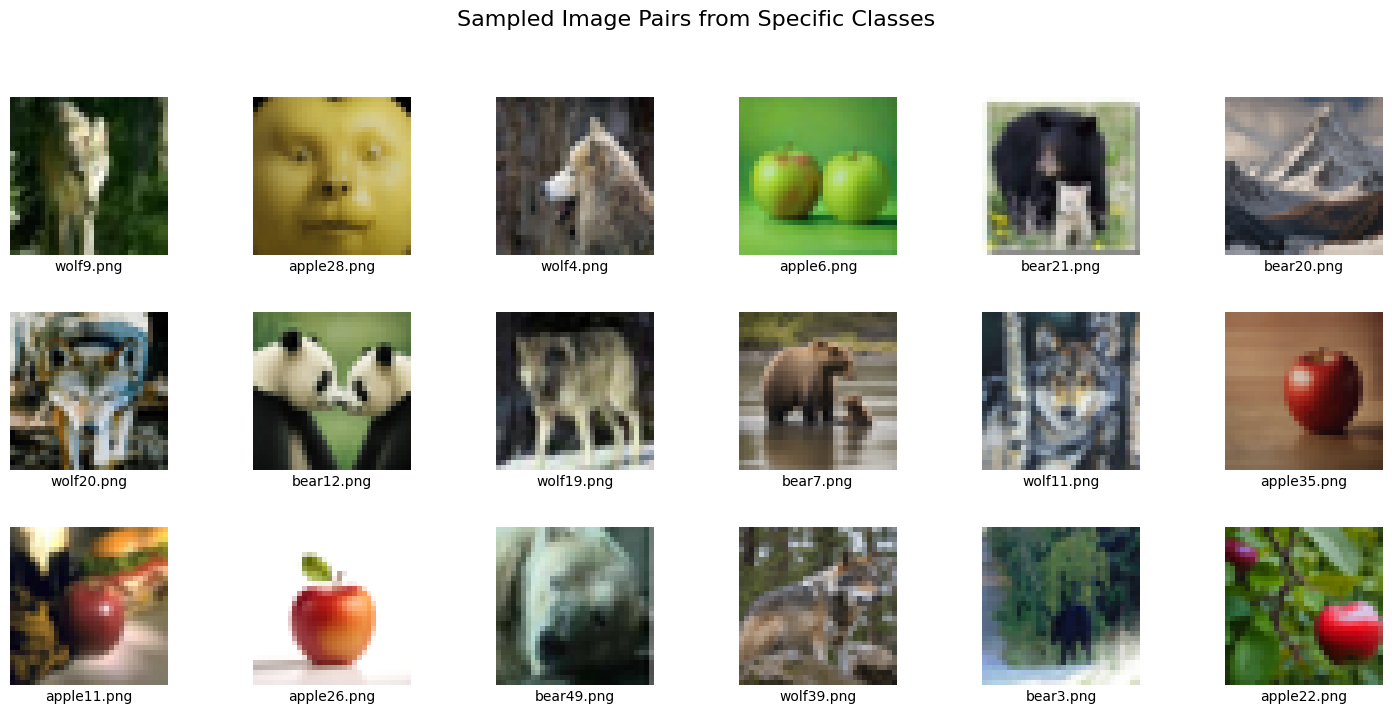

In [4]:
# Example usage
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['wolf', 'apple', 'bear']  # Example class names
display_images_from_classes(folder_path1, folder_path2, classes)


In [104]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_matched_images(folder_path1, folder_path2, classes, num_images=9, grid_size=(3, 3)):
    """
    Display a grid of matched image pairs from two folders, where each pair consists of the same image from each folder.

    Args:
    folder_path1 (str): Path to the first folder containing images.
    folder_path2 (str): Path to the second folder containing images.
    classes (list): List of class names for which images are to be matched.
    num_images (int): Number of image pairs to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying image pairs.
    """
    # Check if the folders exist
    if not os.path.isdir(folder_path1) or not os.path.isdir(folder_path2):
        print("One or both specified paths are not valid directories.")
        return

    # Retrieve files matching the class names and file types
    def get_class_files(folder_path):
        files = os.listdir(folder_path)
        return [f for f in files if any(f.startswith(cls) for cls in classes) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    files1 = get_class_files(folder_path1)
    files2 = get_class_files(folder_path2)

    # Find common files in both directories
    common_files = set(files1).intersection(files2)
    if len(common_files) < num_images:
        print(f"Not enough matching files found to display. Only found {len(common_files)} matching files.")
        return

    # Select a random sample of matching files
#     random.seed(42)  # Seed for reproducibility
    sampled_files = random.sample(common_files, num_images)

    # Set up the plot for displaying images
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1]*2, figsize=(15, 7.5))
#     fig.suptitle('Matched Image Pairs from Two Directories', fontsize=16)

    # Display images
    for idx, filename in enumerate(sampled_files):
        img_path1 = os.path.join(folder_path1, filename)
        img_path2 = os.path.join(folder_path2, filename)

        img1 = mpimg.imread(img_path1)
        img2 = mpimg.imread(img_path2)

        # Plot image from first folder
        ax1 = axes.flat[2*idx]
        ax1.imshow(img1)
        ax1.axis('off')
        ax1.set_title(f"t2i short: {filename}", fontsize=7)

        # Plot image from second folder
        ax2 = axes.flat[2*idx + 1]
        ax2.imshow(img2)
        ax2.axis('off')
        ax2.set_title(f"i2i: {filename}", fontsize=7)

    plt.tight_layout()
    plt.show()


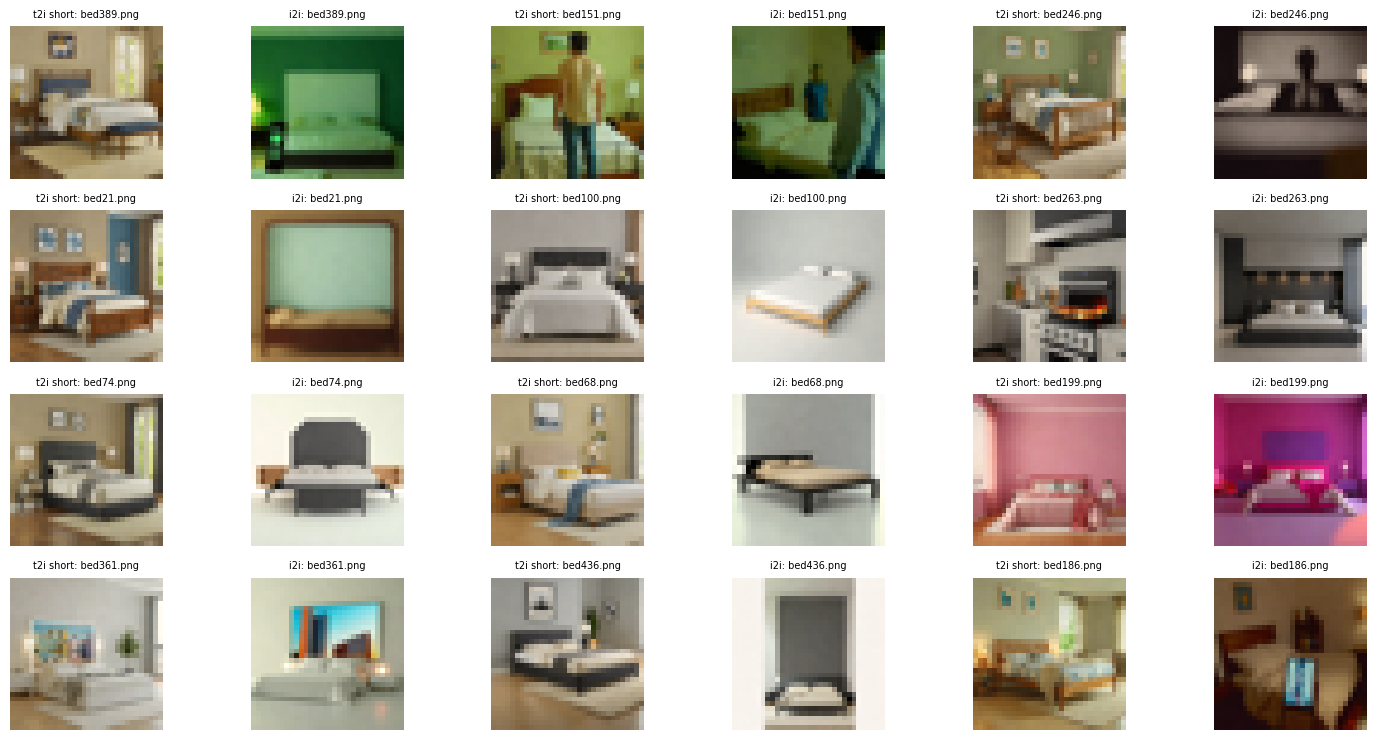

In [108]:
# Example usage
folder_path1 = '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image_shortprompt'
folder_path2 = 'saved_data/sdxl_llava_synfromreal_s8g2'
classes = ['bed']  # Example class names
display_matched_images(folder_path1, folder_path2, classes, num_images=12, grid_size=(4, 3))


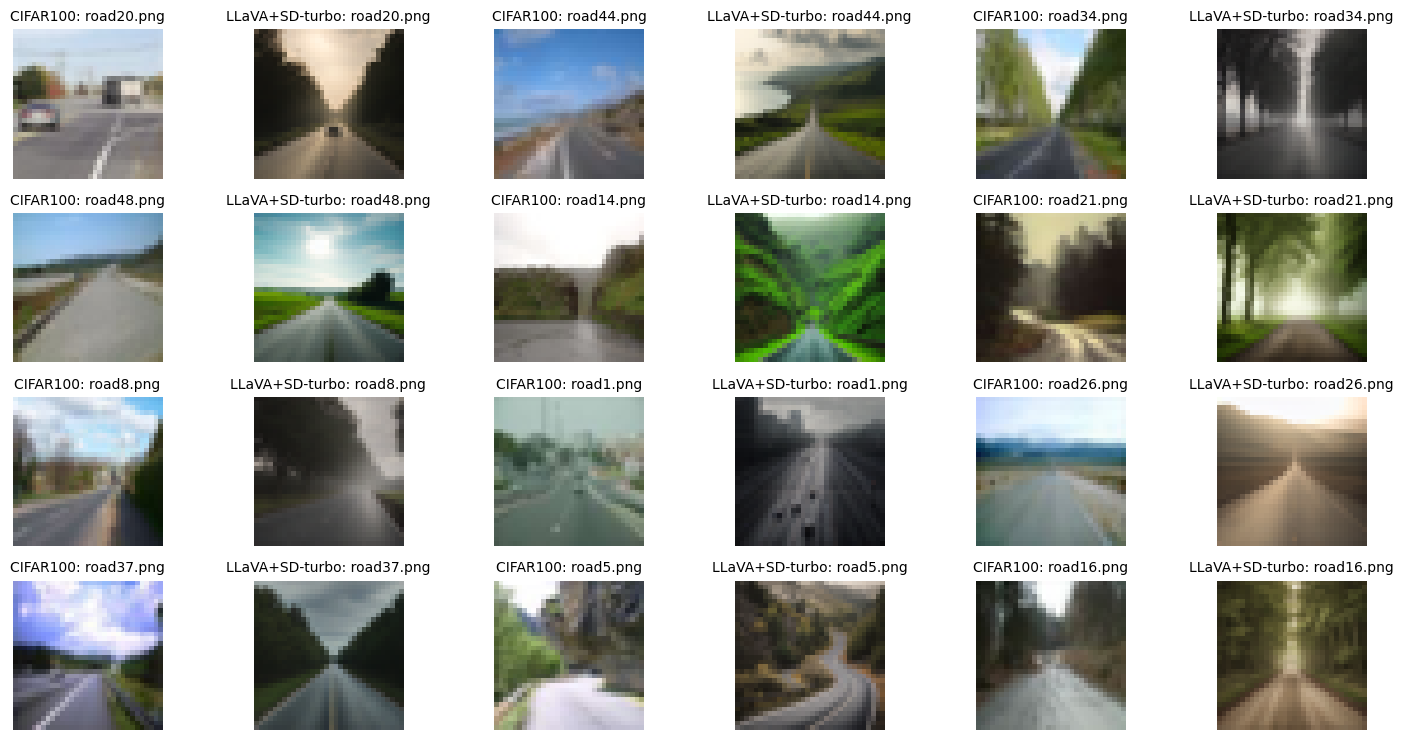

In [39]:
# Example usage
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['road']  # Example class names
display_matched_images(folder_path1, folder_path2, classes, num_images=12, grid_size=(4, 3))


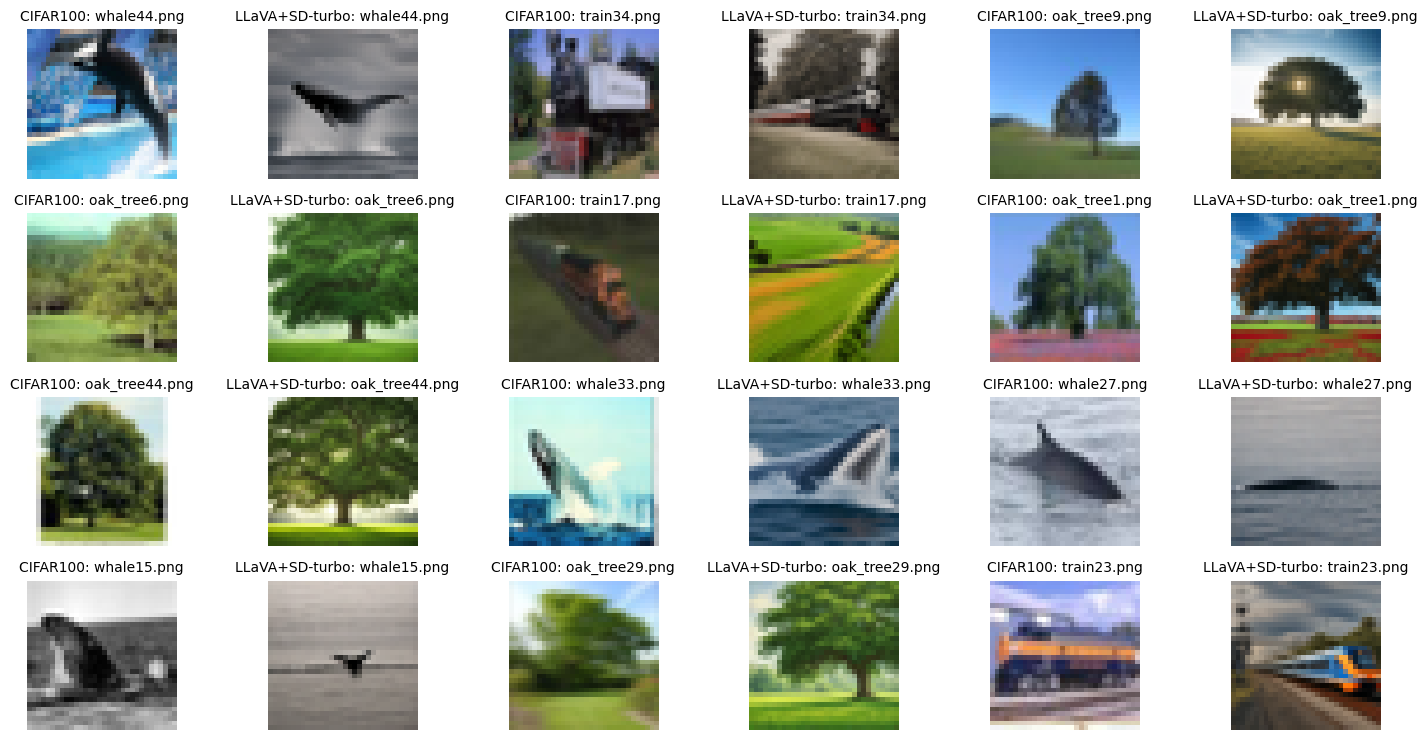

In [40]:
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['train', 'whale', 'oak_tree']  # Example class names
display_matched_images(folder_path1, folder_path2, classes, num_images=12, grid_size=(4, 3))


In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def get_common_images_2(folder1, folder2):
    files1 = set(os.listdir(folder1))
    files2 = set(os.listdir(folder2))
    common_files = list(files1 & files2)
    common_images = [file for file in common_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]
    return common_images

def display_image_pairs(folder1, folder2, common_images):
    selected_images = random.sample(common_images, min(7, len(common_images)))

    fig, axs = plt.subplots(2, 7, figsize=(28, 10))  # 2 rows, 7 columns
    axs = axs.flatten()

    for i, img_name in enumerate(selected_images):
        img1 = Image.open(os.path.join(folder1, img_name))
        img2 = Image.open(os.path.join(folder2, img_name))

        # Display the first image in the first row
        axs[i].imshow(img1)
        axs[i].set_title(f"{img_name} (real)")
        axs[i].axis('off')

        # Display the second image in the corresponding column in the second row
        axs[i + 7].imshow(img2)
        axs[i + 7].set_title(f"{img_name} (synthetic)")
        axs[i + 7].axis('off')

    plt.tight_layout()
    plt.show()

    import os

def get_common_images(*folders):
    if len(folders) < 2 or len(folders) > 5:
        raise ValueError("This function requires between 2 and 5 folders.")
    
    # Get the set of files from the first folder
    common_files = set(os.listdir(folders[0]))
    
    # Intersect with the files in each subsequent folder
    for folder in folders[1:]:
        files = set(os.listdir(folder))
        common_files &= files
    
    # Filter to include only image files
    common_images = [file for file in common_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]
    
    return common_images


def display_image_5rows(folder1, folder2, 
                        folder3, folder4, 
                        folder5, folder6, 
                        common_images):
    selected_images = random.sample(common_images, min(7, len(common_images)))

    fig, axs = plt.subplots(5, 7, figsize=(28, 25))  # 2 rows, 7 columns
    axs = axs.flatten()

    for i, img_name in enumerate(selected_images):
        img1 = Image.open(os.path.join(folder1, img_name))
        img2 = Image.open(os.path.join(folder2, img_name))

        # Display the first image in the first row
        axs[i].imshow(img1)
        axs[i].set_title(f"{img_name} (real)")
        axs[i].axis('off')

        # Display the second image in the corresponding column in the second row
        axs[i + 7].imshow(img2)
        axs[i + 7].set_title(f"{img_name} (synthetic)")
        axs[i + 7].axis('off')

    plt.tight_layout()
    plt.show()
# # Example usage:
# folder2 = 'saved_data/llava_saved_data_310/cifar_50/'
# folder1 = 'saved_data/sd_turbo_i2i_50all_step20'

# common_images = get_common_images(folder1, folder2)
# if common_images:
#     display_image_pairs(folder1, folder2, common_images)
# else:
#     print("No common images found in the two folders.")

import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def display_image_5rows(folder1, folder2, folder3, folder4, folder5, common_images, final_image_path):
    selected_images = random.sample(common_images, min(7, len(common_images)))

    fig, axs = plt.subplots(5, 7, figsize=(28, 25))  # 7 rows, 7 columns
    axs = axs.flatten()

    folders = [folder1, folder2, folder3, folder4, folder5]

    for i, img_name in enumerate(selected_images):
        for j, folder in enumerate(folders):
            img = Image.open(os.path.join(folder, img_name))
            axs[j * 7 + i].imshow(img)
            axs[j * 7 + i].set_title(f"{img_name} (Folder {j+1})")
            axs[j * 7 + i].axis('off')
    
    plt.savefig(final_image_path, bbox_inches='tight', pad_inches=0.1)
    plt.tight_layout()
    plt.show()



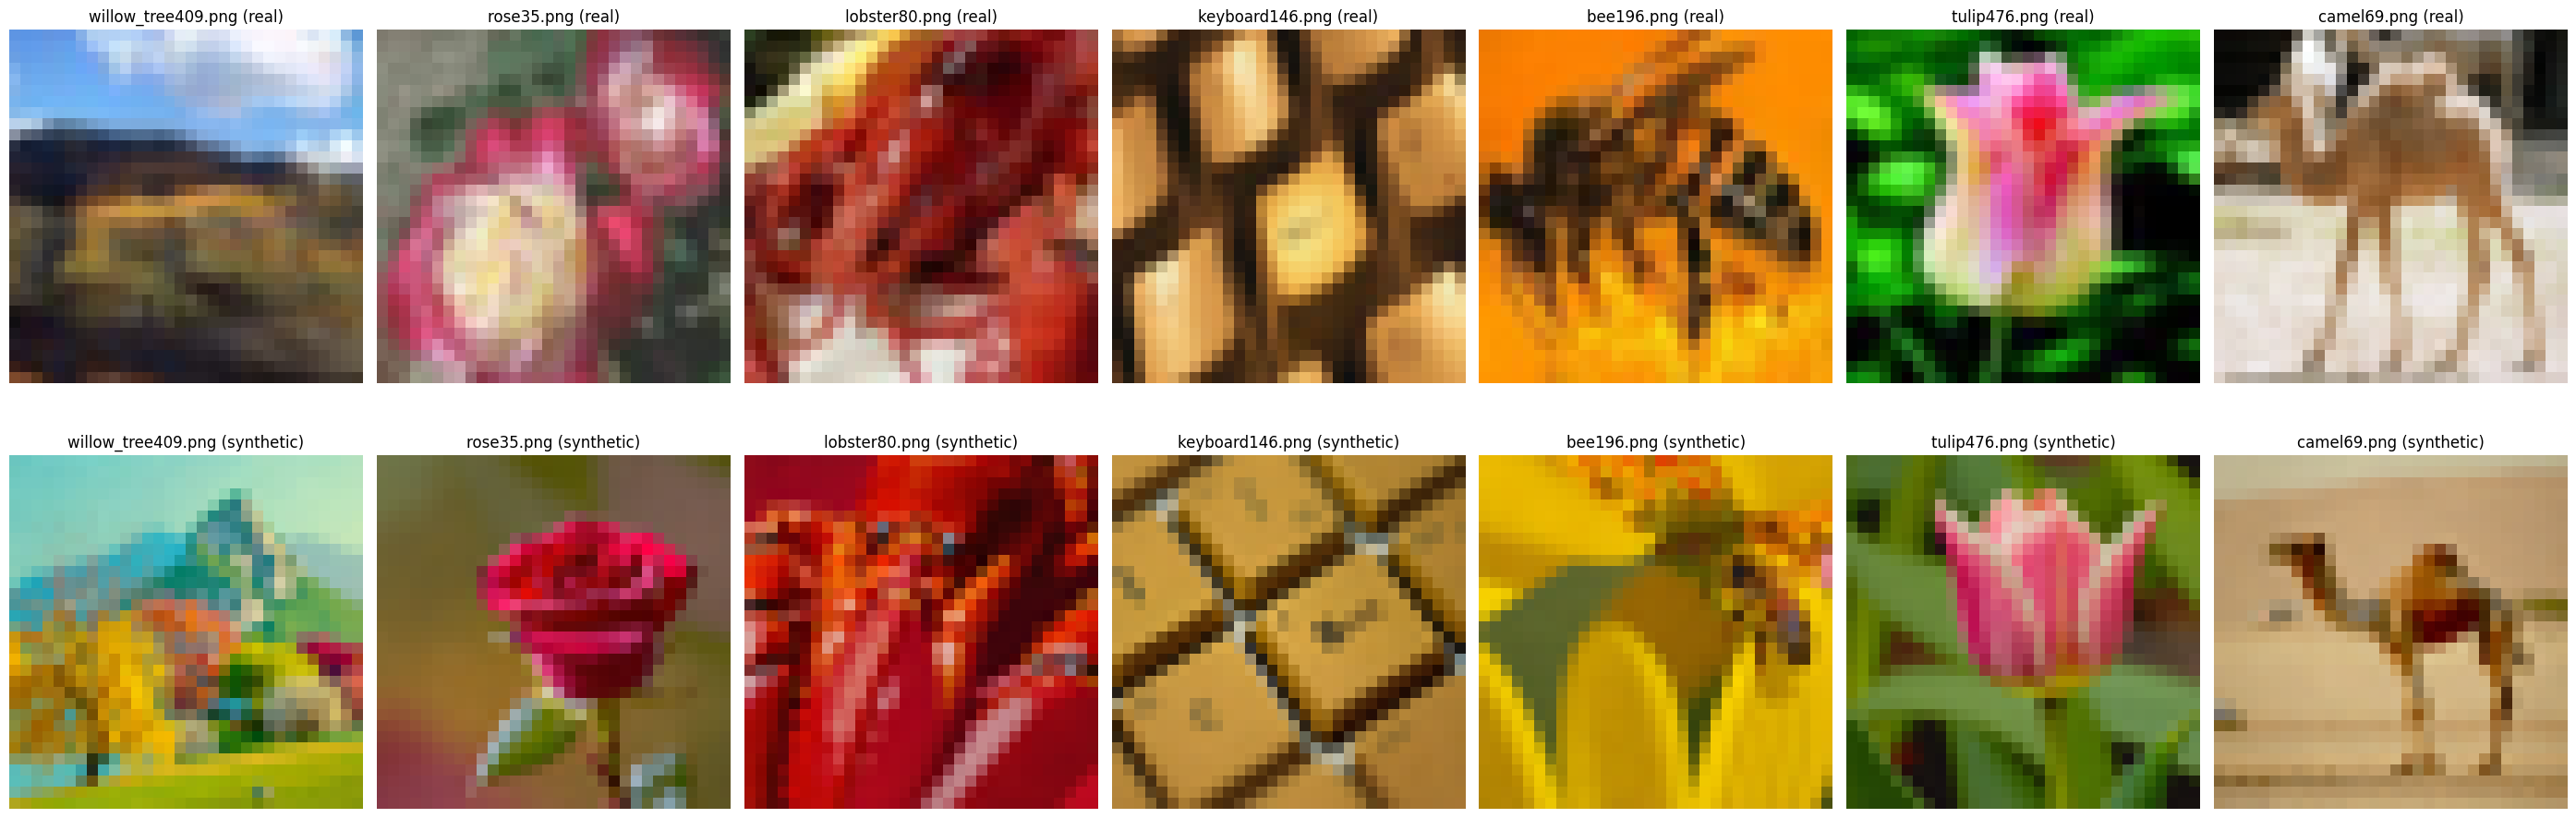

In [4]:
# Example usage:
# folder2 = 'saved_data/ImageNet/ImageNet_sdxl_baseprompt_i2i_130all'
# folder1 = 'saved_data/ImageNet/ImageNet_train_renamed'
# folder1 = '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image_shortprompt'
# folder2 = '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image'
folder1 = 'saved_data/cifar_train_all_fortest'
folder2 = '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step16'

common_images = get_common_images_2(folder1, folder2)
if common_images:
    display_image_pairs(folder1, folder2, common_images)
else:
    print("No common images found in the two folders.")


In [4]:
folder_list = ['saved_data/cifar_train_all_fortest',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step8',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step16',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step20',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step28',
    
]
common_images = get_common_images(folder_list[0], folder_list[1],
                    folder_list[2], folder_list[3], 
                    folder_list[4])
display_image_5rows(folder_list[0], folder_list[1],
                    folder_list[2], folder_list[3], 
                    folder_list[4], 
                    common_images, 'figures/cifar_sdxl_step.png')

KeyboardInterrupt: 

In [1]:
import os
import random
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def display_images_from_paths(images_folder, image_name_list, final_image_path, grid_size=(1, 7), target_size=(32, 32)):
    """
    Display a grid of images from the provided list of image paths, with image class labels below each image, 
    and save the final combined image.

    Args:
    image_paths (list): List of paths to the images.
    final_image_path (str): The path where the final combined image will be saved.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying the images.
    target_size (tuple): The target size (width, height) to which images should be resized.
    """
    # Check that the correct number of images are provided
    if len(image_name_list) != 7:
        print("Exactly 7 image paths must be provided.")
        return
    
    # Plot images in a grid
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(grid_size[1]*3, grid_size[0]*3))
    image_paths = [os.path.join(images_folder, name) for name in image_name_list]
    
    for ax, image_path in zip(axes.flat, image_paths):
        # Load image and resize it
        img = Image.open(image_path)
        img = img.resize(target_size, Image.ANTIALIAS)
        
        # Convert resized image back to a format that can be displayed
        img = np.array(img)
        
        ax.imshow(img)
        ax.axis('off')  # Hide axes
        
        # Extract class name and use it as the label below the image
        image_file = os.path.basename(image_path)
        match = re.match(r"([a-zA-Z]+)", image_file)
        caption = match.group(1) if match else image_file.split('.')[0]
        ax.set_title(caption, fontsize=11, y=-0.1)  # Adjust placement to appear below the image

    plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between images

    # Save the final figure as an image file
    plt.savefig(final_image_path, bbox_inches='tight', pad_inches=0.1)
    
    plt.show()


folder_path = '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step8'
all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
# random.seed(42)
sampled_files = random.sample(image_files, 7)


In [2]:
folder_list = ['saved_data/cifar_train_all_fortest',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step8',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step16',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step20',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step28',
    
]

/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


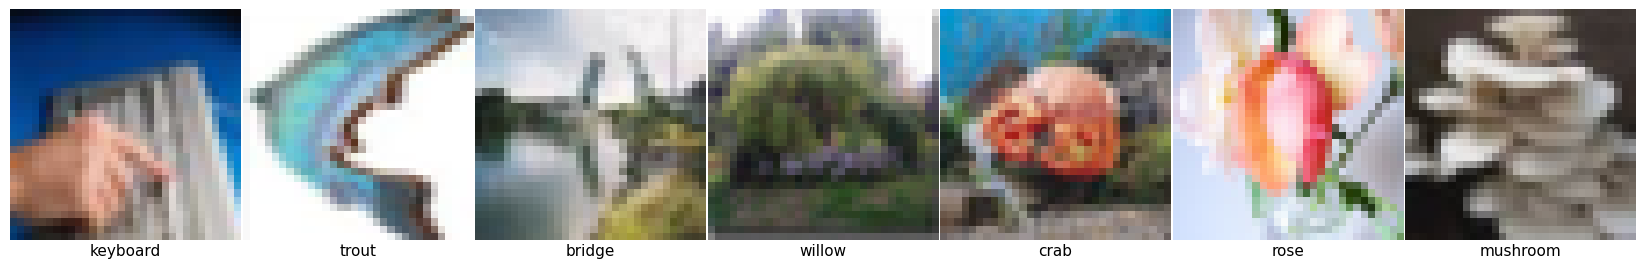

In [3]:
display_images_from_paths('saved_data/cifar_train_all_fortest' , 
                           sampled_files, 
                           'figures/cifar_train_7images_2.png', 
                           grid_size=(1, 7), 
                           target_size=(32, 32))

/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


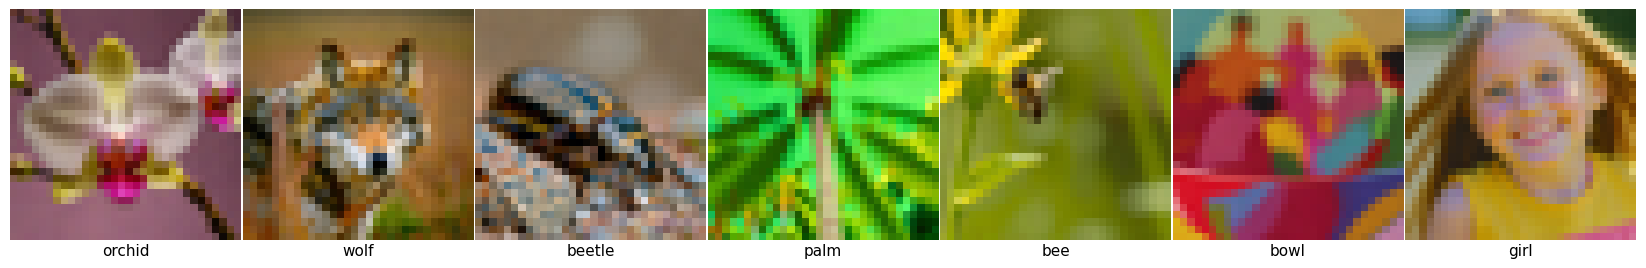

In [21]:
display_images_from_paths(folder_list[1], 
                           sampled_files, 
                           'figures/cifar_step8_7images.png', 
                           grid_size=(1, 7), 
                           target_size=(32, 32))

/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


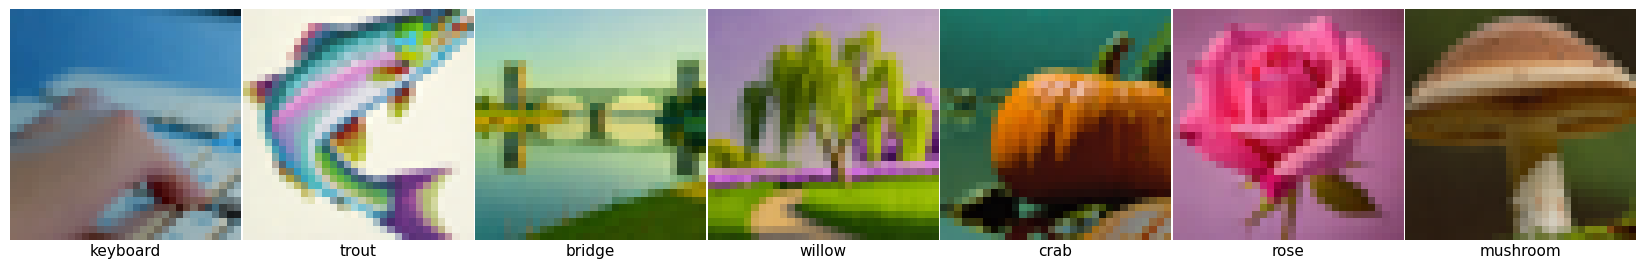

In [4]:
display_images_from_paths(folder_list[2], 
                           sampled_files, 
                           'figures/cifar_step16_7images_2.png', 
                           grid_size=(1, 7), 
                           target_size=(32, 32))

/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


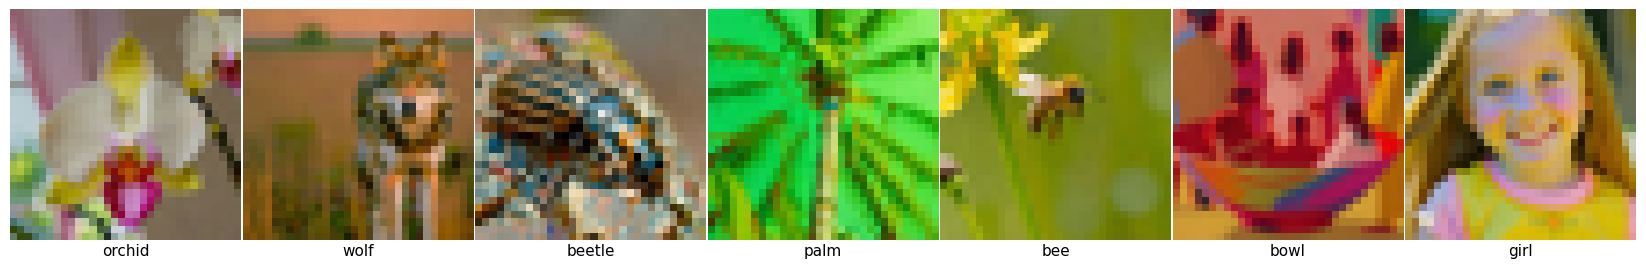

In [23]:
display_images_from_paths(folder_list[3], 
                           sampled_files, 
                           'figures/cifar_step20_7images.png', 
                           grid_size=(1, 7), 
                           target_size=(32, 32))

/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


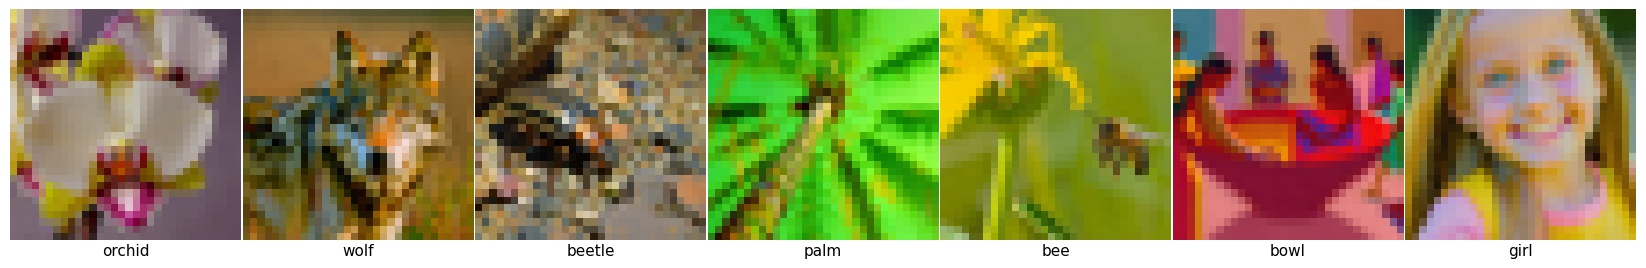

In [24]:
display_images_from_paths(folder_list[4], 
                           sampled_files, 
                           'figures/cifar_step28_7images.png', 
                           grid_size=(1, 7), 
                           target_size=(32, 32))

In [1]:
import os
import random
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


def display_single_image(image_path, final_image_path, target_size=(32, 32)):
    """
    Display a single image from the provided image path, with the image class label below the image, 
    and save the displayed image.

    Args:
    image_path (str): Path to the image file to display.
    final_image_path (str): The path where the final displayed image will be saved.
    target_size (tuple): The target size (width, height) to which the image should be resized.
    """
    # Plot the single image
    fig, ax = plt.subplots(figsize=(1, 1))  # Adjust figure size as needed
    
    # Load image and resize it
    img = Image.open(image_path)
    img = img.resize(target_size, Image.ANTIALIAS)
    
    # Convert resized image back to a format that can be displayed
    img = np.array(img)
    
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    
    # Extract class name and use it as the label below the image
    image_file = os.path.basename(image_path)
    match = re.match(r"([a-zA-Z]+)", image_file)
    caption = match.group(1) if match else image_file.split('.')[0]
#     ax.set_title(caption, fontsize=11, y=-0.1)  # Adjust placement to appear below the image

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

    # Save the final figure as an image file
    plt.savefig(final_image_path, bbox_inches='tight', pad_inches=0)
    
    plt.show()



In [22]:
folder_list = ['saved_data/cifar_train_all_fortest',
               '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step8',
               '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step16',
               '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step20',
               '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step28', 
]
folder_list_synsyn = [ '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_80synfrom20real_i2i_step16' ,
                        '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synfrom40real_i2i_step16' ,
                        '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_40synfrom60real_i2i_step28' ,
                        '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_20synfrom80real_i2i_step16' ,

]

In [41]:
import os

class_name = ''
img_num = 83
folder_path = folder_list_synsyn[2]

save_path = 'figures/'

img_name = os.path.join(folder_path, class_name+str(img_num)+ '.png')

save_img_name = os.path.join(save_path, class_name+str(img_num)+ '.png')




/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


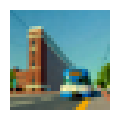

In [42]:
display_single_image(img_name, 
                     save_img_name, 
                     target_size=(32, 32))

/homes/55/enbo/miniconda3/envs/thesis3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


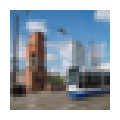

In [43]:
import os

class_name = 'streetcar'

folder_path = folder_list[0]

save_path = 'figures/'

img_name = os.path.join(folder_path, class_name+str(img_num)+ '.png')

save_img_name = os.path.join(save_path, class_name+str(img_num)+ '.png')

display_single_image(img_name, 
                     save_img_name, 
                     target_size=(32, 32))

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def get_common_images_3(folder1, folder2, folder3):
    files1 = set(os.listdir(folder1))
    files2 = set(os.listdir(folder2))
    files3 = set(os.listdir(folder3))
    
    common_files = list(files1 & files2 & files3)
    common_images = [file for file in common_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]
    return common_images

def display_image_triplets(folder1, folder2, folder3, common_images):
    selected_images = random.sample(common_images, min(6, len(common_images)))

    fig, axs = plt.subplots(3, 6, figsize=(30, 20))
    axs = axs.flatten()

    for i, img_name in enumerate(selected_images):
        img1 = Image.open(os.path.join(folder1, img_name))
        img2 = Image.open(os.path.join(folder2, img_name))
        img3 = Image.open(os.path.join(folder3, img_name))

        axs[3*i].imshow(img1)
        axs[3*i].set_title(f"{img_name} (strength 0.5)")
        axs[3*i].axis('off')

        axs[3*i+1].imshow(img2)
        axs[3*i+1].set_title(f"{img_name} (strength 0.25)")
        axs[3*i+1].axis('off')

        axs[3*i+2].imshow(img3)
        axs[3*i+2].set_title(f"{img_name} (strength 0.1)")
        axs[3*i+2].axis('off')

    plt.tight_layout()
    plt.show()


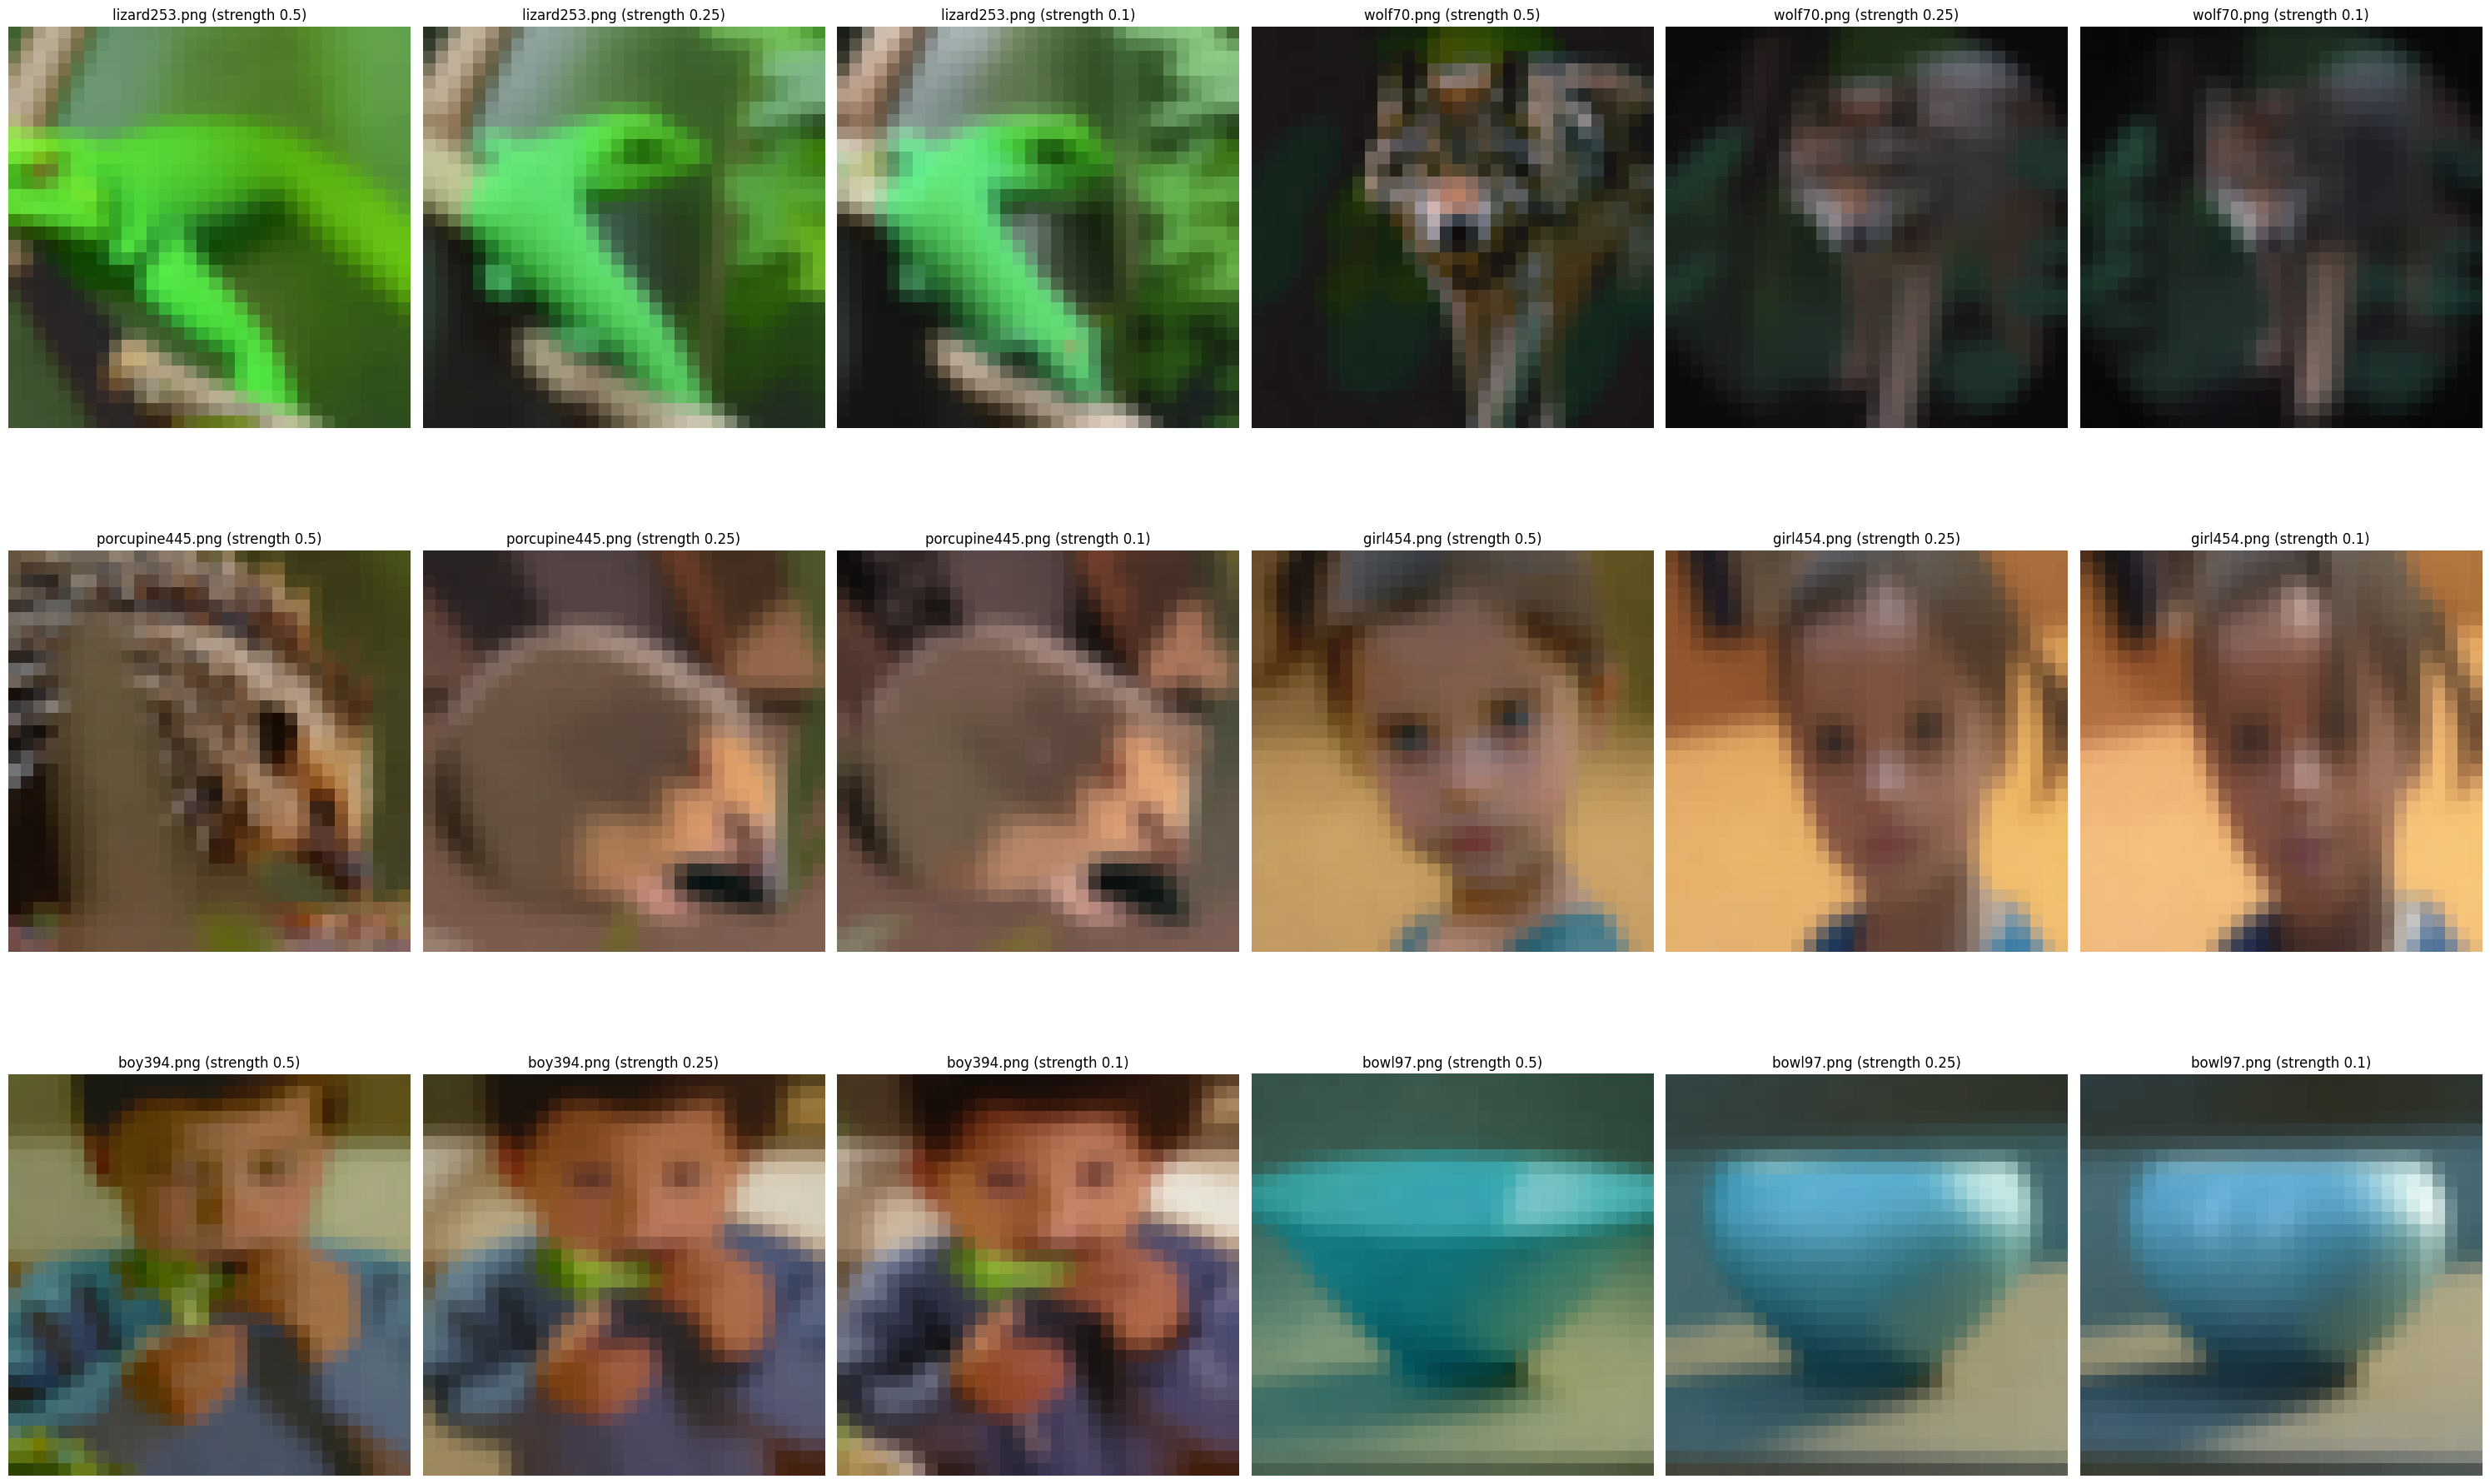

In [4]:
folder1 = '/scratch/local/ssd/enbo/saved_data/sdxl_llava_realfromreal_s5g2'
folder2 = '/scratch/local/ssd/enbo/saved_data/sdxl_llava_realfromreal_s25g2'
folder3 = '/scratch/local/ssd/enbo/saved_data/sdxl_llava_realfromreal_s1g2'

common_images = get_common_images_3(folder1, folder2, folder3)
if common_images:
    display_image_triplets(folder1, folder2, folder3, common_images)
else:
    print("No common images found in the two folders.")


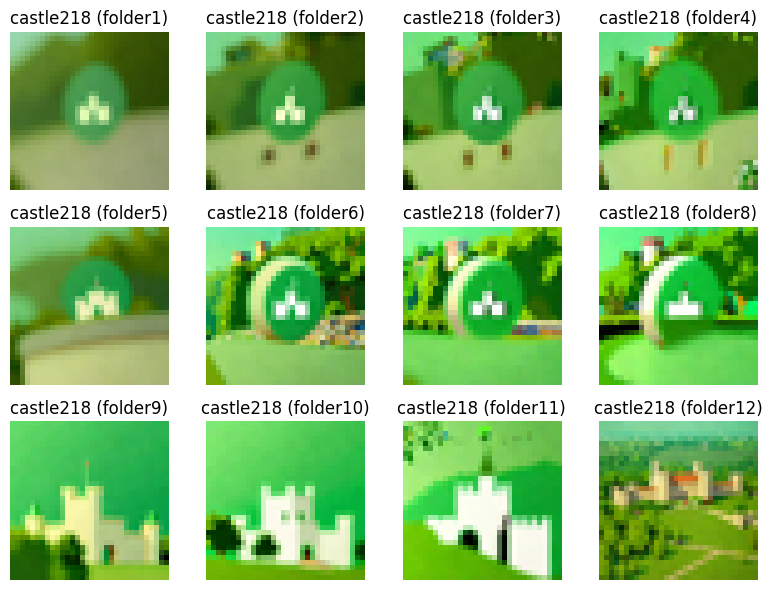

In [44]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Function to get common images across multiple folders
def get_common_images(folders):
    common_files = set(os.listdir(folders[0]))
    for folder in folders[1:]:
        common_files &= set(os.listdir(folder))
    common_images = [file for file in common_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]
    return common_images

# Function to display the same image from multiple folders
def display_image_groups(folders, common_images):
    selected_images = random.sample(common_images, min(1, len(common_images)))  # Select only 1 image
    
    fig, axs = plt.subplots(3, 4, figsize=(8, 6))
    axs = axs.flatten()

    for img_name in selected_images:
        for j, folder in enumerate(folders):
            img = Image.open(os.path.join(folder, img_name))
            ax = axs[j]  # Display images in the first row
            ax.imshow(img)
            ax.set_title(f"{img_name[:-4]} (folder{j+1})")
            ax.axis('off')

    plt.tight_layout()
    plt.show()
# List of folder paths
folders = ['saved_data/sdxl_llava_synfromreal_s6g2',
           'saved_data/sdxl_llava_synfromreal_s6g4',
           'saved_data/sdxl_llava_synfromreal_s6g6',
           'saved_data/sdxl_llava_synfromreal_s6g8',
           'saved_data/sdxl_llava_synfromreal_s8g2',
           'saved_data/sdxl_llava_synfromreal_s8g4',
           'saved_data/sdxl_llava_synfromreal_s8g6',
           'saved_data/sdxl_llava_synfromreal_s8g8',
           'saved_data/sdxl_llava_synfromreal_s1g2',
           'saved_data/sdxl_llava_synfromreal_s1g4',
           'saved_data/sdxl_llava_synfromreal_s1g6',
           # 'saved_data/sdxl_llava_synfromreal_s1g8'
           'saved_data/sdxl_llava_synfromreal_text2image'
]

# Get common images across all folders
common_images = get_common_images(folders)

# Display the common images
display_image_groups(folders, common_images)


In [10]:
import re
def extract_classname_and_number(filename):
    """
    Extracts the classname and the number from a given filename formatted as 'classname<number>.png'.
    
    Parameters:
    filename (str): The filename from which to extract the classname and number.
    
    Returns:
    tuple: A tuple containing the extracted classname and number as a string.
    """
    # Adjusted regular expression to ensure proper classname and number separation
    match = re.match(r'([a-zA-Z_]+)(\d+)\.png$', filename)
    if match:
        classname, number = match.groups()
        return classname, number
    else:
        return None, None

# Example usage
filename = 'acqfish123.png'
classname, number = extract_classname_and_number(filename)
print(f"The extracted classname is: {classname}")
print(f"The extracted number is: {number}")

The extracted classname is: acqfish
The extracted number is: 123


In [22]:
[1,23, 4][:-1]

[1, 23]

In [23]:
# Function to get common images across multiple folders
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
def get_common_images(folders):
    common_files = set(os.listdir(folders[0]))
    for folder in folders[1:]:
        common_files &= set(os.listdir(folder))
    common_images = [file for file in common_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]
    return common_images

# Function to display the same image from multiple folders
def display_image_groups_15(folders, common_images, starting_folder, synthetic_to_starting_class):
    selected_images = random.sample(common_images, min(1, len(common_images)))  # Select only 1 image
    syn_classname, number = extract_classname_and_number(selected_images[0])
    starting_class = synthetic_to_starting_class[syn_classname]
    starting_image = starting_class + number + '.png'
    
    h, w = 4, 4
    fig, axs = plt.subplots(h, w, figsize=(8, 8))
    axs = axs.flatten()

    for img_name in selected_images:
        for j, folder in enumerate(folders):
            img = Image.open(os.path.join(folder, img_name))
            ax = axs[j]  # Display images in the first row
            ax.imshow(img)
            if j == len(folders)-2:
                ax.set_title(f"{img_name[:-4]} (text2i)")
            elif j == len(folders)-1:
                ax.set_title(f"{img_name[:-4]} (text2i short prompt)")
            else:
                ax.set_title(f"{img_name[:-4]} (i2i {j+1})")
            ax.axis('off')
        
        img = Image.open(os.path.join(starting_folder, starting_image))
        ax = axs[len(folders)]  # Display images in the first row
        ax.imshow(img)
        ax.set_title(f"{starting_image[:-4]} (starting)")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [24]:
synthetic_to_starting_class = {'bed': 'television',
 'chair': 'table',
 'sweet_pepper': 'mushroom',
 'cattle': 'tractor',
 'poppy': 'rose',
 'forest': 'pine_tree',
 'shrew': 'porcupine',
 'orange': 'can',
 'beaver': 'otter',
 'flatfish': 'crab',
 'lamp': 'bottle',
 'lawn_mower': 'tractor',
 'possum': 'cockroach',
 'chimpanzee': 'dinosaur',
 'mountain': 'bridge',
 'road': 'bridge',
 'rabbit': 'squirrel',
 'man': 'boy',
 'seal': 'bottle',
 'elephant': 'leopard',
 'bicycle': 'motorcycle',
 'aquarium_fish': 'crab',
 'caterpillar': 'cockroach',
 'telephone': 'clock',
 'tank': 'bottle',
 'whale': 'shark',
 'couch': 'television',
 'sunflower': 'tulip',
 'raccoon': 'tiger',
 'house': 'wardrobe',
 'snake': 'lizard',
 'oak_tree': 'maple_tree',
 'bear': 'wolf',
 'worm': 'skunk',
 'cup': 'bottle',
 'train': 'streetcar',
 'castle': 'clock',
 'snail': 'crab',
 'spider': 'squirrel',
 'pickup_truck': 'tractor'}


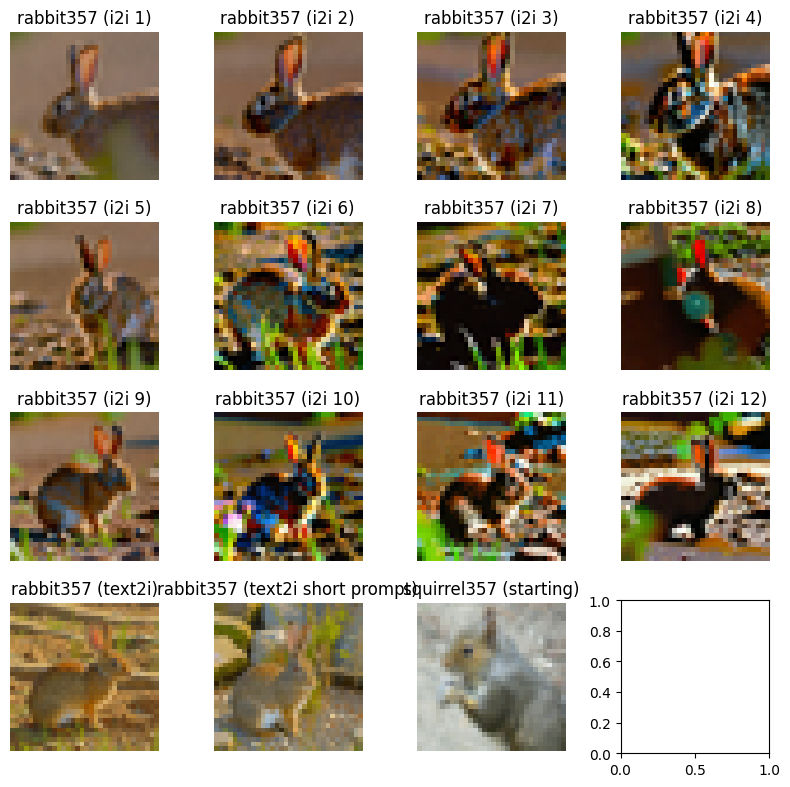

In [137]:
folders = ['saved_data/sdxl_llava_synfromreal_s6g2',
           'saved_data/sdxl_llava_synfromreal_s6g4',
           'saved_data/sdxl_llava_synfromreal_s6g6',
           'saved_data/sdxl_llava_synfromreal_s6g8',
           'saved_data/sdxl_llava_synfromreal_s8g2',
           'saved_data/sdxl_llava_synfromreal_s8g4',
           'saved_data/sdxl_llava_synfromreal_s8g6',
           'saved_data/sdxl_llava_synfromreal_s8g8',
           'saved_data/sdxl_llava_synfromreal_s1g2',
           'saved_data/sdxl_llava_synfromreal_s1g4',
           'saved_data/sdxl_llava_synfromreal_s1g6',
           'saved_data/sdxl_llava_synfromreal_s1g8',
           '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image',
          '/scratch/local/ssd/enbo/saved_data/sdxl_llava_synfromreal_text2image_shortprompt',
]

# Get common images across all folders
common_images = get_common_images(folders)
display_image_groups_15(folders, common_images, 'saved_data/cifar_train_all_fortest', synthetic_to_starting_class)

In [2]:
import json

def read_json_to_dict(file_path):
    """
    Reads a JSON file and returns its contents as a dictionary.

    Args:
    file_path (str): The path to the JSON file.

    Returns:
    dict: A dictionary representation of the JSON file.
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
    except json.JSONDecodeError:
        print(f"Error: The file {file_path} is not a valid JSON file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")



In [3]:
dict_1= read_json_to_dict('/storage3/enbo/saved_data/cifar100_dict_80synfrom20real_name.json')
print(dict_1)

{'apple': 'bee', 'orchid': 'bee', 'bed': 'television', 'chair': 'table', 'lobster': 'crab', 'bus': 'bridge', 'sweet_pepper': 'bee', 'cattle': 'wolf', 'shark': 'crocodile', 'can': 'bottle', 'poppy': 'bottle', 'forest': 'pine_tree', 'woman': 'bottle', 'cockroach': 'hamster', 'shrew': 'bowl', 'orange': 'bottle', 'wardrobe': 'bottle', 'mushroom': 'bowl', 'beaver': 'crocodile', 'flatfish': 'crab', 'streetcar': 'bridge', 'mouse': 'bee', 'lamp': 'bottle', 'lawn_mower': 'bridge', 'tractor': 'bridge', 'rocket': 'bottle', 'possum': 'hamster', 'chimpanzee': 'dinosaur', 'butterfly': 'bee', 'tiger': 'fox', 'mountain': 'bridge', 'road': 'bridge', 'squirrel': 'fox', 'pear': 'bowl', 'rabbit': 'fox', 'man': 'bottle', 'trout': 'crab', 'motorcycle': 'bridge', 'seal': 'bottle', 'elephant': 'dinosaur', 'beetle': 'bee', 'maple_tree': 'pine_tree', 'bicycle': 'bridge', 'aquarium_fish': 'crab', 'skunk': 'crocodile', 'porcupine': 'bowl', 'caterpillar': 'hamster', 'telephone': 'clock', 'rose': 'bottle', 'lion': 

In [4]:
dict_2= read_json_to_dict('/storage3/enbo/saved_data/cifar100_dict_60synfrom40real_name.json')
print(dict_2)

{'orchid': 'rose', 'bed': 'television', 'chair': 'table', 'bus': 'bridge', 'sweet_pepper': 'apple', 'cattle': 'tractor', 'can': 'bottle', 'poppy': 'rose', 'forest': 'pine_tree', 'cockroach': 'hamster', 'shrew': 'skunk', 'orange': 'bottle', 'mushroom': 'bowl', 'beaver': 'trout', 'flatfish': 'crab', 'mouse': 'keyboard', 'lamp': 'bottle', 'lawn_mower': 'tractor', 'rocket': 'bottle', 'possum': 'skunk', 'chimpanzee': 'dinosaur', 'tiger': 'leopard', 'mountain': 'bridge', 'road': 'bridge', 'pear': 'apple', 'rabbit': 'squirrel', 'man': 'boy', 'motorcycle': 'tractor', 'seal': 'bottle', 'elephant': 'leopard', 'maple_tree': 'pine_tree', 'bicycle': 'bridge', 'aquarium_fish': 'crab', 'porcupine': 'bowl', 'caterpillar': 'squirrel', 'telephone': 'clock', 'lion': 'leopard', 'tank': 'bottle', 'whale': 'shark', 'girl': 'woman', 'couch': 'television', 'sunflower': 'butterfly', 'ray': 'bottle', 'raccoon': 'leopard', 'house': 'wardrobe', 'baby': 'bottle', 'snake': 'lizard', 'oak_tree': 'pine_tree', 'otter'

In [5]:
dict_3= read_json_to_dict('/storage3/enbo/saved_data/cifar100_dict_40synfrom60real_name.json')
print(dict_3)

{'bed': 'television', 'chair': 'table', 'sweet_pepper': 'mushroom', 'cattle': 'tractor', 'poppy': 'rose', 'forest': 'pine_tree', 'shrew': 'porcupine', 'orange': 'can', 'beaver': 'otter', 'flatfish': 'crab', 'lamp': 'bottle', 'lawn_mower': 'tractor', 'possum': 'cockroach', 'chimpanzee': 'dinosaur', 'mountain': 'bridge', 'road': 'bridge', 'rabbit': 'squirrel', 'man': 'boy', 'seal': 'bottle', 'elephant': 'leopard', 'bicycle': 'motorcycle', 'aquarium_fish': 'crab', 'caterpillar': 'cockroach', 'telephone': 'clock', 'tank': 'bottle', 'whale': 'shark', 'couch': 'television', 'sunflower': 'tulip', 'raccoon': 'tiger', 'house': 'wardrobe', 'snake': 'lizard', 'oak_tree': 'maple_tree', 'bear': 'wolf', 'worm': 'skunk', 'cup': 'bottle', 'train': 'streetcar', 'castle': 'clock', 'snail': 'crab', 'spider': 'squirrel', 'pickup_truck': 'tractor'}


In [6]:
dict_4= read_json_to_dict('/storage3/enbo/saved_data/cifar100_dict_20synfrom80real_name.json')
print(dict_4)

{'chair': 'table', 'cattle': 'tractor', 'forest': 'pine_tree', 'orange': 'lamp', 'flatfish': 'crab', 'lawn_mower': 'tractor', 'chimpanzee': 'raccoon', 'road': 'bridge', 'man': 'boy', 'elephant': 'leopard', 'aquarium_fish': 'crab', 'telephone': 'clock', 'whale': 'shark', 'sunflower': 'tulip', 'house': 'castle', 'oak_tree': 'maple_tree', 'worm': 'shrew', 'train': 'streetcar', 'snail': 'crab', 'pickup_truck': 'tractor'}


In [39]:
print([(k, dict_1[k]) for k in list(dict_4.keys())])
print([(k, dict_2[k]) for k in list(dict_4.keys())])
print([(k, dict_3[k]) for k in list(dict_4.keys())])
print([(k, dict_4[k]) for k in list(dict_4.keys())])


[('chair', 'table'), ('cattle', 'wolf'), ('forest', 'pine_tree'), ('orange', 'bottle'), ('flatfish', 'crab'), ('lawn_mower', 'bridge'), ('chimpanzee', 'dinosaur'), ('road', 'bridge'), ('man', 'bottle'), ('elephant', 'dinosaur'), ('aquarium_fish', 'crab'), ('telephone', 'clock'), ('whale', 'dolphin'), ('sunflower', 'bowl'), ('house', 'television'), ('oak_tree', 'pine_tree'), ('worm', 'hamster'), ('train', 'bowl'), ('snail', 'crab'), ('pickup_truck', 'plate')]
[('chair', 'table'), ('cattle', 'tractor'), ('forest', 'pine_tree'), ('orange', 'bottle'), ('flatfish', 'crab'), ('lawn_mower', 'tractor'), ('chimpanzee', 'dinosaur'), ('road', 'bridge'), ('man', 'boy'), ('elephant', 'leopard'), ('aquarium_fish', 'crab'), ('telephone', 'clock'), ('whale', 'shark'), ('sunflower', 'butterfly'), ('house', 'wardrobe'), ('oak_tree', 'pine_tree'), ('worm', 'skunk'), ('train', 'streetcar'), ('snail', 'crab'), ('pickup_truck', 'tractor')]
[('chair', 'table'), ('cattle', 'tractor'), ('forest', 'pine_tree'),

In [18]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_starting_pairs(starting_folders, image_name, synthetic_to_starting_dicts_list):
    """
    Display a 2x4 grid of image pairs (synthetic and corresponding starting images) 
    from four starting folders.

    Args:
    starting_folders (list): List of four folders containing the starting images.
    image_name (str): Name of the synthetic image to be compared.
    synthetic_to_starting_dicts_list (list): List of dictionaries mapping synthetic class names 
                                             to starting class names.
    """
    # Extract class name and number from the synthetic image name
    syn_classname, number = extract_classname_and_number(image_name)
    
    # Create a 2x4 grid for displaying the images
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    axs = axs.flatten()

    for j, folder in enumerate(starting_folders):
        # Load and display the synthetic image
        img_syn = Image.open(os.path.join(folder, image_name))
        ax1 = axs[j]  # Place in the first column of each pair
        ax1.imshow(img_syn)
        ax1.set_title(f"Synthetic: {image_name[:-4]}")
        ax1.axis('off')

        # Find the corresponding starting image using the mapping
        starting_class = synthetic_to_starting_dicts_list[j][syn_classname]
        starting_image = starting_class + number + '.png'

        # Load and display the corresponding starting image
        cifar_folder = 'saved_data/cifar_train_all_fortest'
        img_start = Image.open(os.path.join(cifar_folder, starting_image))
        ax2 = axs[j+4]  # Place in the second column of each pair
        ax2.imshow(img_start)
        ax2.set_title(f"Starting: {starting_image[:-4]}")
        ax2.axis('off')

    plt.tight_layout()
    plt.show()



In [19]:
folder_list_synreal = ['saved_data/cifar_train_all_fortest',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step8',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step16',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step20',
                                   '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synreal_s8g2_step28',
    
]

folder_list_synsyn = [ '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_80synfrom20real_i2i_step16' ,
                        '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_60synfrom40real_i2i_step16' ,
                        '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_40synfrom60real_i2i_step16' ,
                        '/storage3/enbo/saved_data/cifar100_sdxl_llava_i2i_20synfrom80real_i2i_step16' ,

]

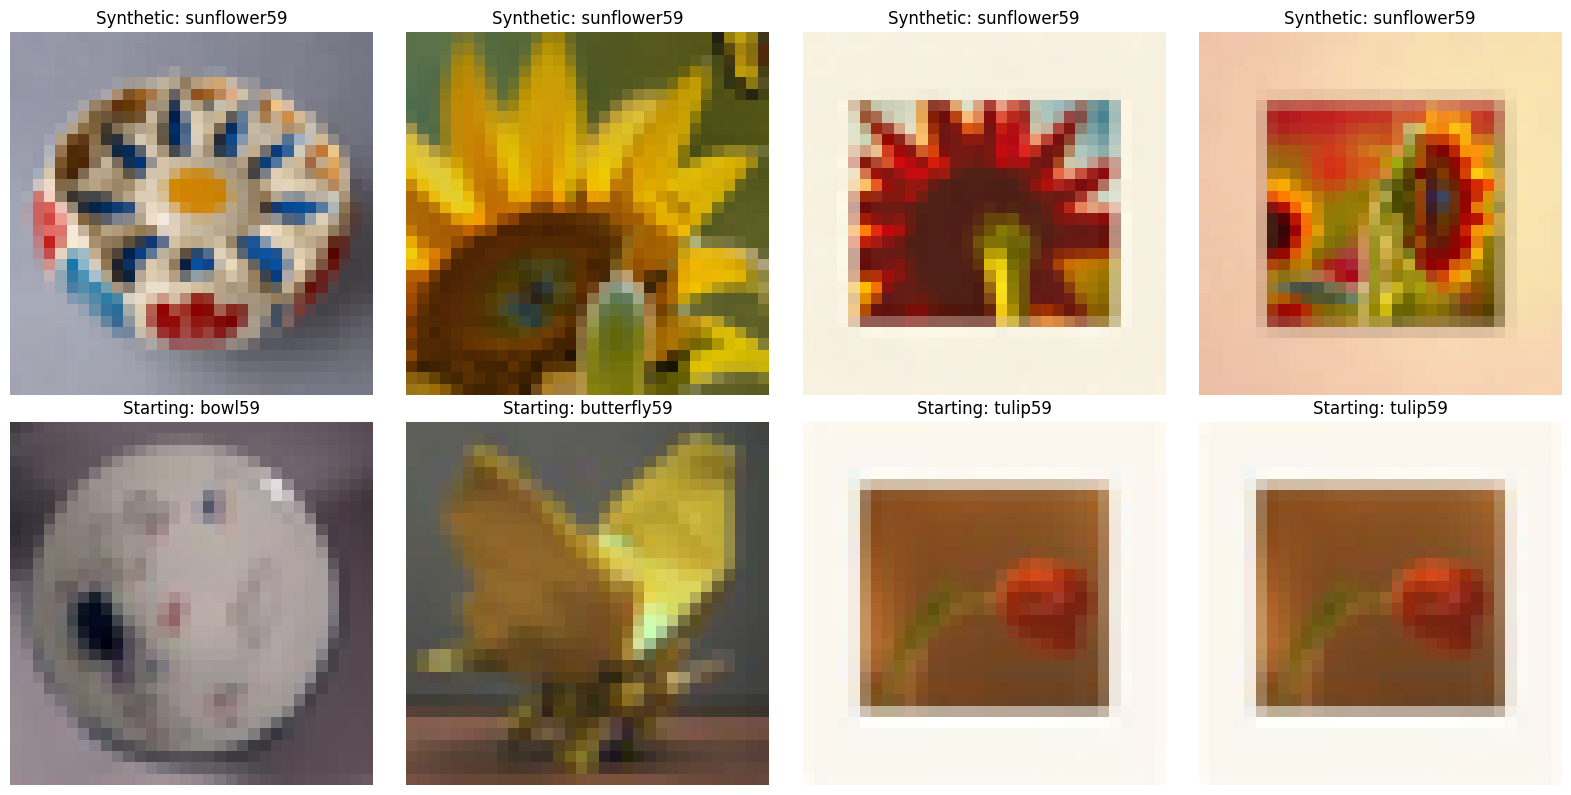

In [63]:
display_starting_pairs(folder_list_synsyn, 
                       'sunflower59.png', 
                       [dict_1, dict_2, dict_3, dict_4])

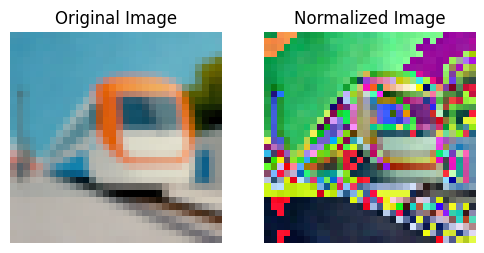

In [82]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch

# Load the image
image_path = 'saved_data/sdxl_llava_synfromreal_s8g2/train32.png'
image = Image.open(image_path).convert('RGB')

# Define the transformation for normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformation
image_tensor = transform(image)

# Convert the tensor back to image for visualization
def tensor_to_image(tensor):
    tensor = tensor.clone().detach()
    # tensor = tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    # tensor = tensor.clamp(0, 1)
    image = transforms.ToPILImage()(tensor)
    return image

normalized_image = tensor_to_image(image_tensor)

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(normalized_image)
axes[1].set_title('Normalized Image')
axes[1].axis('off')

plt.show()


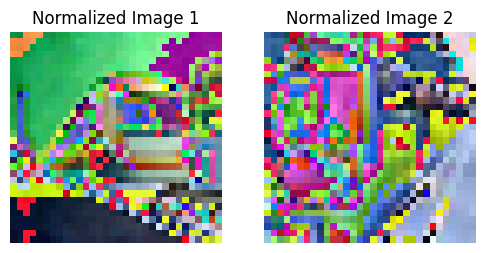

In [87]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch

# Function to load and normalize an image
def load_and_normalize_image(image_path):
    # Load the image
    image = Image.open(image_path).convert('RGB')
    
    # Define the transformation for normalization
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Apply the transformation
    image_tensor = transform(image)
    
    # Convert the tensor back to image for visualization
    def tensor_to_image(tensor):
        tensor = tensor.clone().detach()
        # tensor = tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        # tensor = tensor.clamp(0, 1)
        image = transforms.ToPILImage()(tensor)
        return image
    
    normalized_image = tensor_to_image(image_tensor)
    return normalized_image

# Paths to the images

image_path_1 = 'saved_data/sdxl_llava_synfromreal_s8g2/train32.png'
filename = os.path.basename(image_path_1)
match = re.match(r'([a-zA-Z_]+)(\d+)\.png$', filename)
classname, number = match.groups()
real_class = synthetic_to_starting_class[classname]
image_path_2 = 'saved_data/cifar_train_all_fortest/' + classname + number + '.png'

# Load and normalize both images
normalized_image_1 = load_and_normalize_image(image_path_1)
normalized_image_2 = load_and_normalize_image(image_path_2)

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(normalized_image_1)
axes[0].set_title('Normalized Image 1')
axes[0].axis('off')

axes[1].imshow(normalized_image_2)
axes[1].set_title('Normalized Image 2')
axes[1].axis('off')

plt.show()


In [45]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    return Image.open(image_path)

def get_image_paths(folder, class_name):
    return [os.path.join(folder, fname) for fname in os.listdir(folder) if fname.startswith(class_name)]

def display_image_comparison(synthetic_folder, starting_folder, synthetic_to_starting_class, num_pairs=12, num_rows=3):
    num_columns = num_pairs // num_rows
    synthetic_classes = list(synthetic_to_starting_class.keys())
    selected_classes = random.sample(synthetic_classes, num_pairs)

    fig, axs = plt.subplots(num_rows, num_columns * 2, figsize=(5 * num_columns * 2, 5 * num_rows))
    axs = axs.flatten()

    for i, synthetic_class in enumerate(selected_classes):
        starting_class = synthetic_to_starting_class[synthetic_class]

        synthetic_image_paths = get_image_paths(synthetic_folder, synthetic_class)
        starting_image_paths = get_image_paths(starting_folder, starting_class)

        # Ensure we compare images with the same index
        idx = random.randint(0, min(len(synthetic_image_paths), len(starting_image_paths)) - 1)

        synthetic_img = load_image(synthetic_image_paths[idx])
        starting_img = load_image(starting_image_paths[idx])

        row = i // num_columns
        col = (i % num_columns) * 2

        axs[row * num_columns * 2 + col].imshow(starting_img)
        axs[row * num_columns * 2 + col].set_title(f"Starting Image ({starting_class}) {idx + 1}")
        axs[row * num_columns * 2 + col].axis('off')

        axs[row * num_columns * 2 + col + 1].imshow(synthetic_img)
        axs[row * num_columns * 2 + col + 1].set_title(f"Generated Image ({synthetic_class}) {idx + 1}")
        axs[row * num_columns * 2 + col + 1].axis('off')

    plt.tight_layout()
    plt.show()

In [158]:
# Example usage:
synthetic_folder = 'saved_data/sdxl_llava_synfromreal_allrealsim'
starting_folder = 'saved_data/cifar_train_all_fortest'

synthetic_to_starting_class = {'bed': 'television',
 'chair': 'table',
 'sweet_pepper': 'mushroom',
 'cattle': 'tractor',
 'poppy': 'rose',
 'forest': 'pine_tree',
 'shrew': 'porcupine',
 'orange': 'can',
 'beaver': 'otter',
 'flatfish': 'crab',
 'lamp': 'bottle',
 'lawn_mower': 'tractor',
 'possum': 'cockroach',
 'chimpanzee': 'dinosaur',
 'mountain': 'bridge',
 'road': 'bridge',
 'rabbit': 'squirrel',
 'man': 'boy',
 'seal': 'bottle',
 'elephant': 'leopard',
 'bicycle': 'motorcycle',
 'aquarium_fish': 'crab',
 'caterpillar': 'cockroach',
 'telephone': 'clock',
 'tank': 'bottle',
 'whale': 'shark',
 'couch': 'television',
 'sunflower': 'tulip',
 'raccoon': 'tiger',
 'house': 'wardrobe',
 'snake': 'lizard',
 'oak_tree': 'maple_tree',
 'bear': 'wolf',
 'worm': 'skunk',
 'cup': 'bottle',
 'train': 'streetcar',
 'castle': 'clock',
 'snail': 'crab',
 'spider': 'squirrel',
 'pickup_truck': 'tractor'}

# display_image_comparison(synthetic_folder, starting_folder, synthetic_to_starting_class)


In [159]:
def display_three_image_comparison(starting_folder, gen_folder1, gen_folder2, class_mapping, num_pairs=6):
    synthetic_classes = list(class_mapping.keys())
    selected_classes = random.sample(synthetic_classes, min(num_pairs, len(synthetic_classes)))

    fig, axs = plt.subplots(3, 6, figsize=(30, 15))

    axs = axs.flatten()

    for i, synthetic_class in enumerate(selected_classes):
        starting_class = class_mapping[synthetic_class]

        starting_image_paths = get_image_paths(starting_folder, starting_class)
        gen_image_paths1 = get_image_paths(gen_folder1, synthetic_class)
        gen_image_paths2 = get_image_paths(gen_folder2, synthetic_class)

        # Ensure we compare images with the same index
        idx = random.randint(0, min(len(starting_image_paths), len(gen_image_paths1), len(gen_image_paths2)) - 1)

        starting_img = load_image(starting_image_paths[idx])
        gen_img1 = load_image(gen_image_paths1[idx])
        gen_img2 = load_image(gen_image_paths2[idx])

        axs[3 * i].imshow(starting_img)
        axs[3 * i].set_title(f"Starting Image ({starting_class}) {idx + 1}")
        axs[3 * i].axis('off')

        axs[3 * i + 1].imshow(gen_img1)
        axs[3 * i + 1].set_title(f"guidance 6 ({synthetic_class}) {idx + 1}")
        axs[3 * i + 1].axis('off')

        axs[3 * i + 2].imshow(gen_img2)
        axs[3 * i + 2].set_title(f"guidance8 ({synthetic_class}) {idx + 1}")
        axs[3 * i + 2].axis('off')

    plt.tight_layout()
    plt.show()

# exp sim

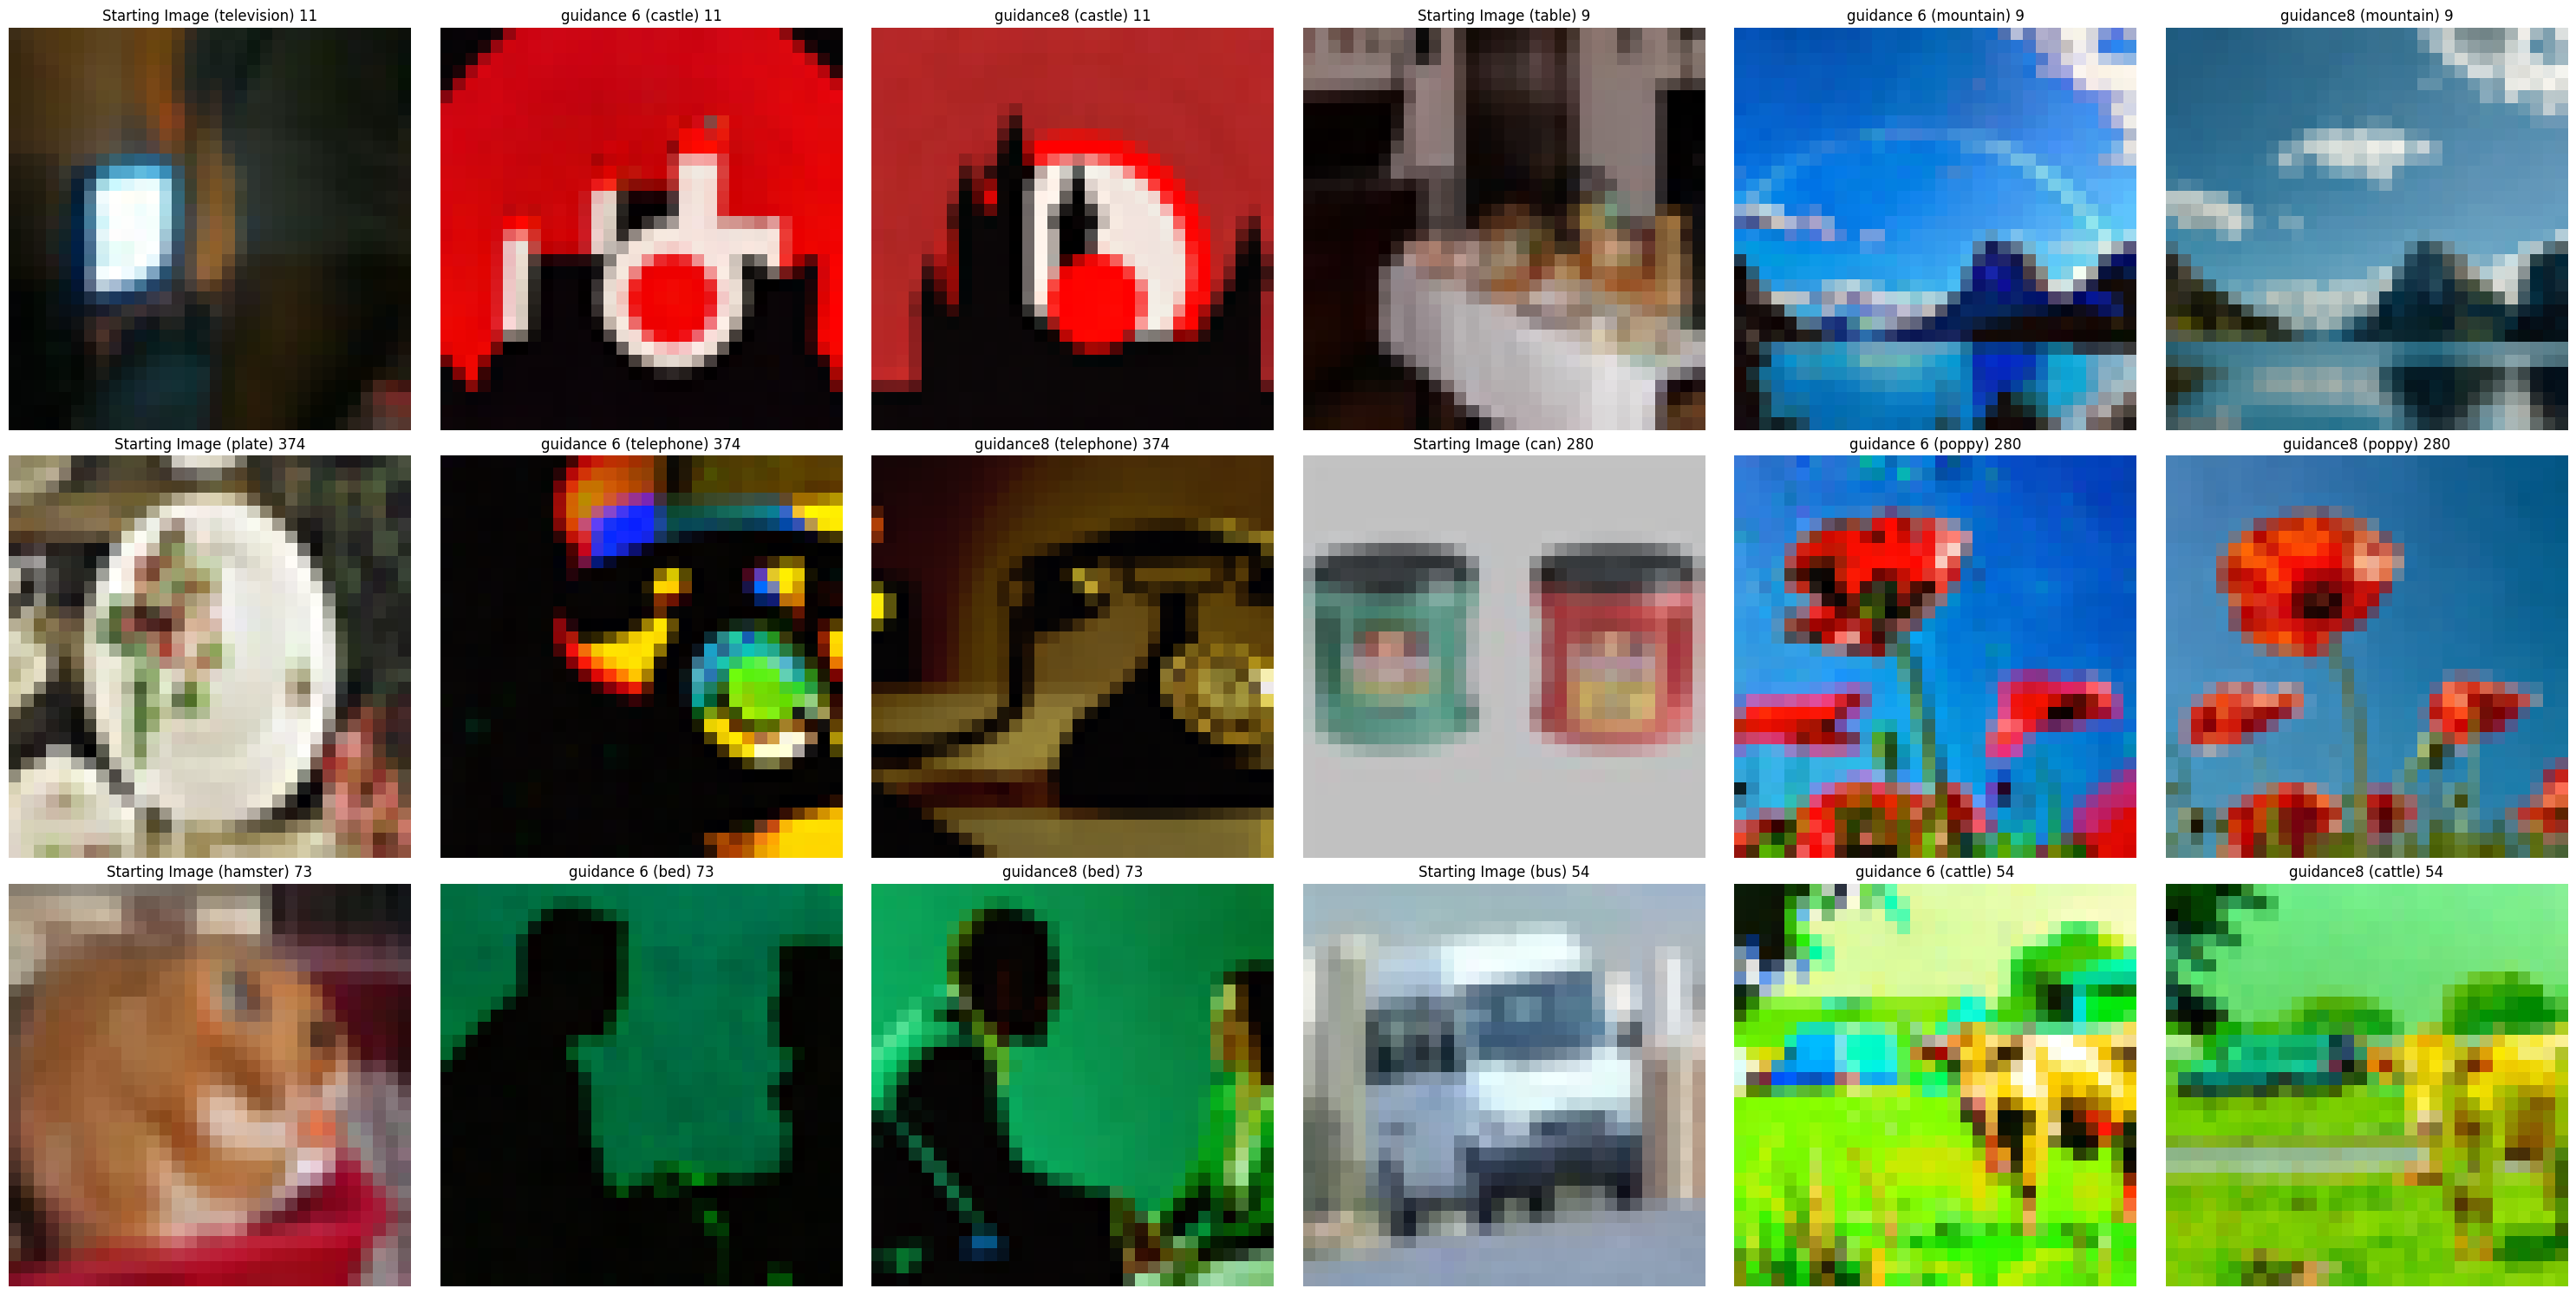

In [96]:
exp_sim_dict = {'bed': 'hamster', 'chair': 'orchid', 'sweet_pepper': 'lobster', 'cattle': 'bus', 'poppy': 'can', 'forest': 'can', 'shrew': 'fox', 'orange': 'fox', 'beaver': 'mushroom', 'flatfish': 'mushroom', 'lamp': 'streetcar', 'lawn_mower': 'streetcar', 'possum': 'tractor', 'chimpanzee': 'dolphin', 'mountain': 'table', 'road': 'table', 'rabbit': 'squirrel', 'man': 'bee', 'seal': 'bottle', 'elephant': 'bottle', 'bicycle': 'skyscraper', 'aquarium_fish': 'beetle', 'caterpillar': 'porcupine', 'telephone': 'plate', 'tank': 'rose', 'whale': 'lion', 'couch': 'girl', 'sunflower': 'girl', 'raccoon': 'lizard', 'house': 'ray', 'snake': 'baby', 'oak_tree': 'baby', 'bear': 'wolf', 'worm': 'wolf', 'cup': 'cloud', 'train': 'cloud', 'castle': 'television', 'snail': 'camel', 'spider': 'leopard', 'pickup_truck': 'bridge'}

folder1 = 'saved_data/cifar_train_all_fortest'
folder2 = 'saved_data/sdxl_llava_synfromreal_expsim_guidance6'
folder3 = 'saved_data/sdxl_llava_synfromreal_expsim'

display_three_image_comparison(folder1, folder2, folder3, exp_sim_dict)


# all real sim

In [99]:
synthetic_to_starting_class = {'bed': 'television',
 'chair': 'table',
 'sweet_pepper': 'mushroom',
 'cattle': 'tractor',
 'poppy': 'rose',
 'foreste': 'pine_tree',
 'shrew': 'porcupine',
 'orange': 'can',
 'beaver': 'otter',
 'flatfish': 'crab',
 'lamp': 'bottle',
 'lawn_mower': 'tractor',
 'possum': 'cockroach',
 'chimpanzee': 'dinosaur',
 'mountain': 'bridge',
 'road': 'bridge',
 'rabbit': 'squirrel',
 'man': 'boy',
 'seal': 'bottle',
 'elephant': 'leopard',
 'bicycle': 'motorcycle',
 'aquarium_fish': 'crab',
 'caterpillar': 'cockroach',
 'telephone': 'clock',
 'tank': 'bottle',
 'whale': 'shark',
 'couch': 'television',
 'sunflower': 'tulip',
 'raccoon': 'tiger',
 'house': 'wardrobe',
 'snake': 'lizard',
 'oak_tree': 'maple_tree',
 'bear': 'wolf',
 'worm': 'skunk',
 'cup': 'bottle',
 'train': 'streetcar',
 'castle': 'clock',
 'snail': 'crab',
 'spider': 'squirrel',
 'pickup_truck': 'tractor'}


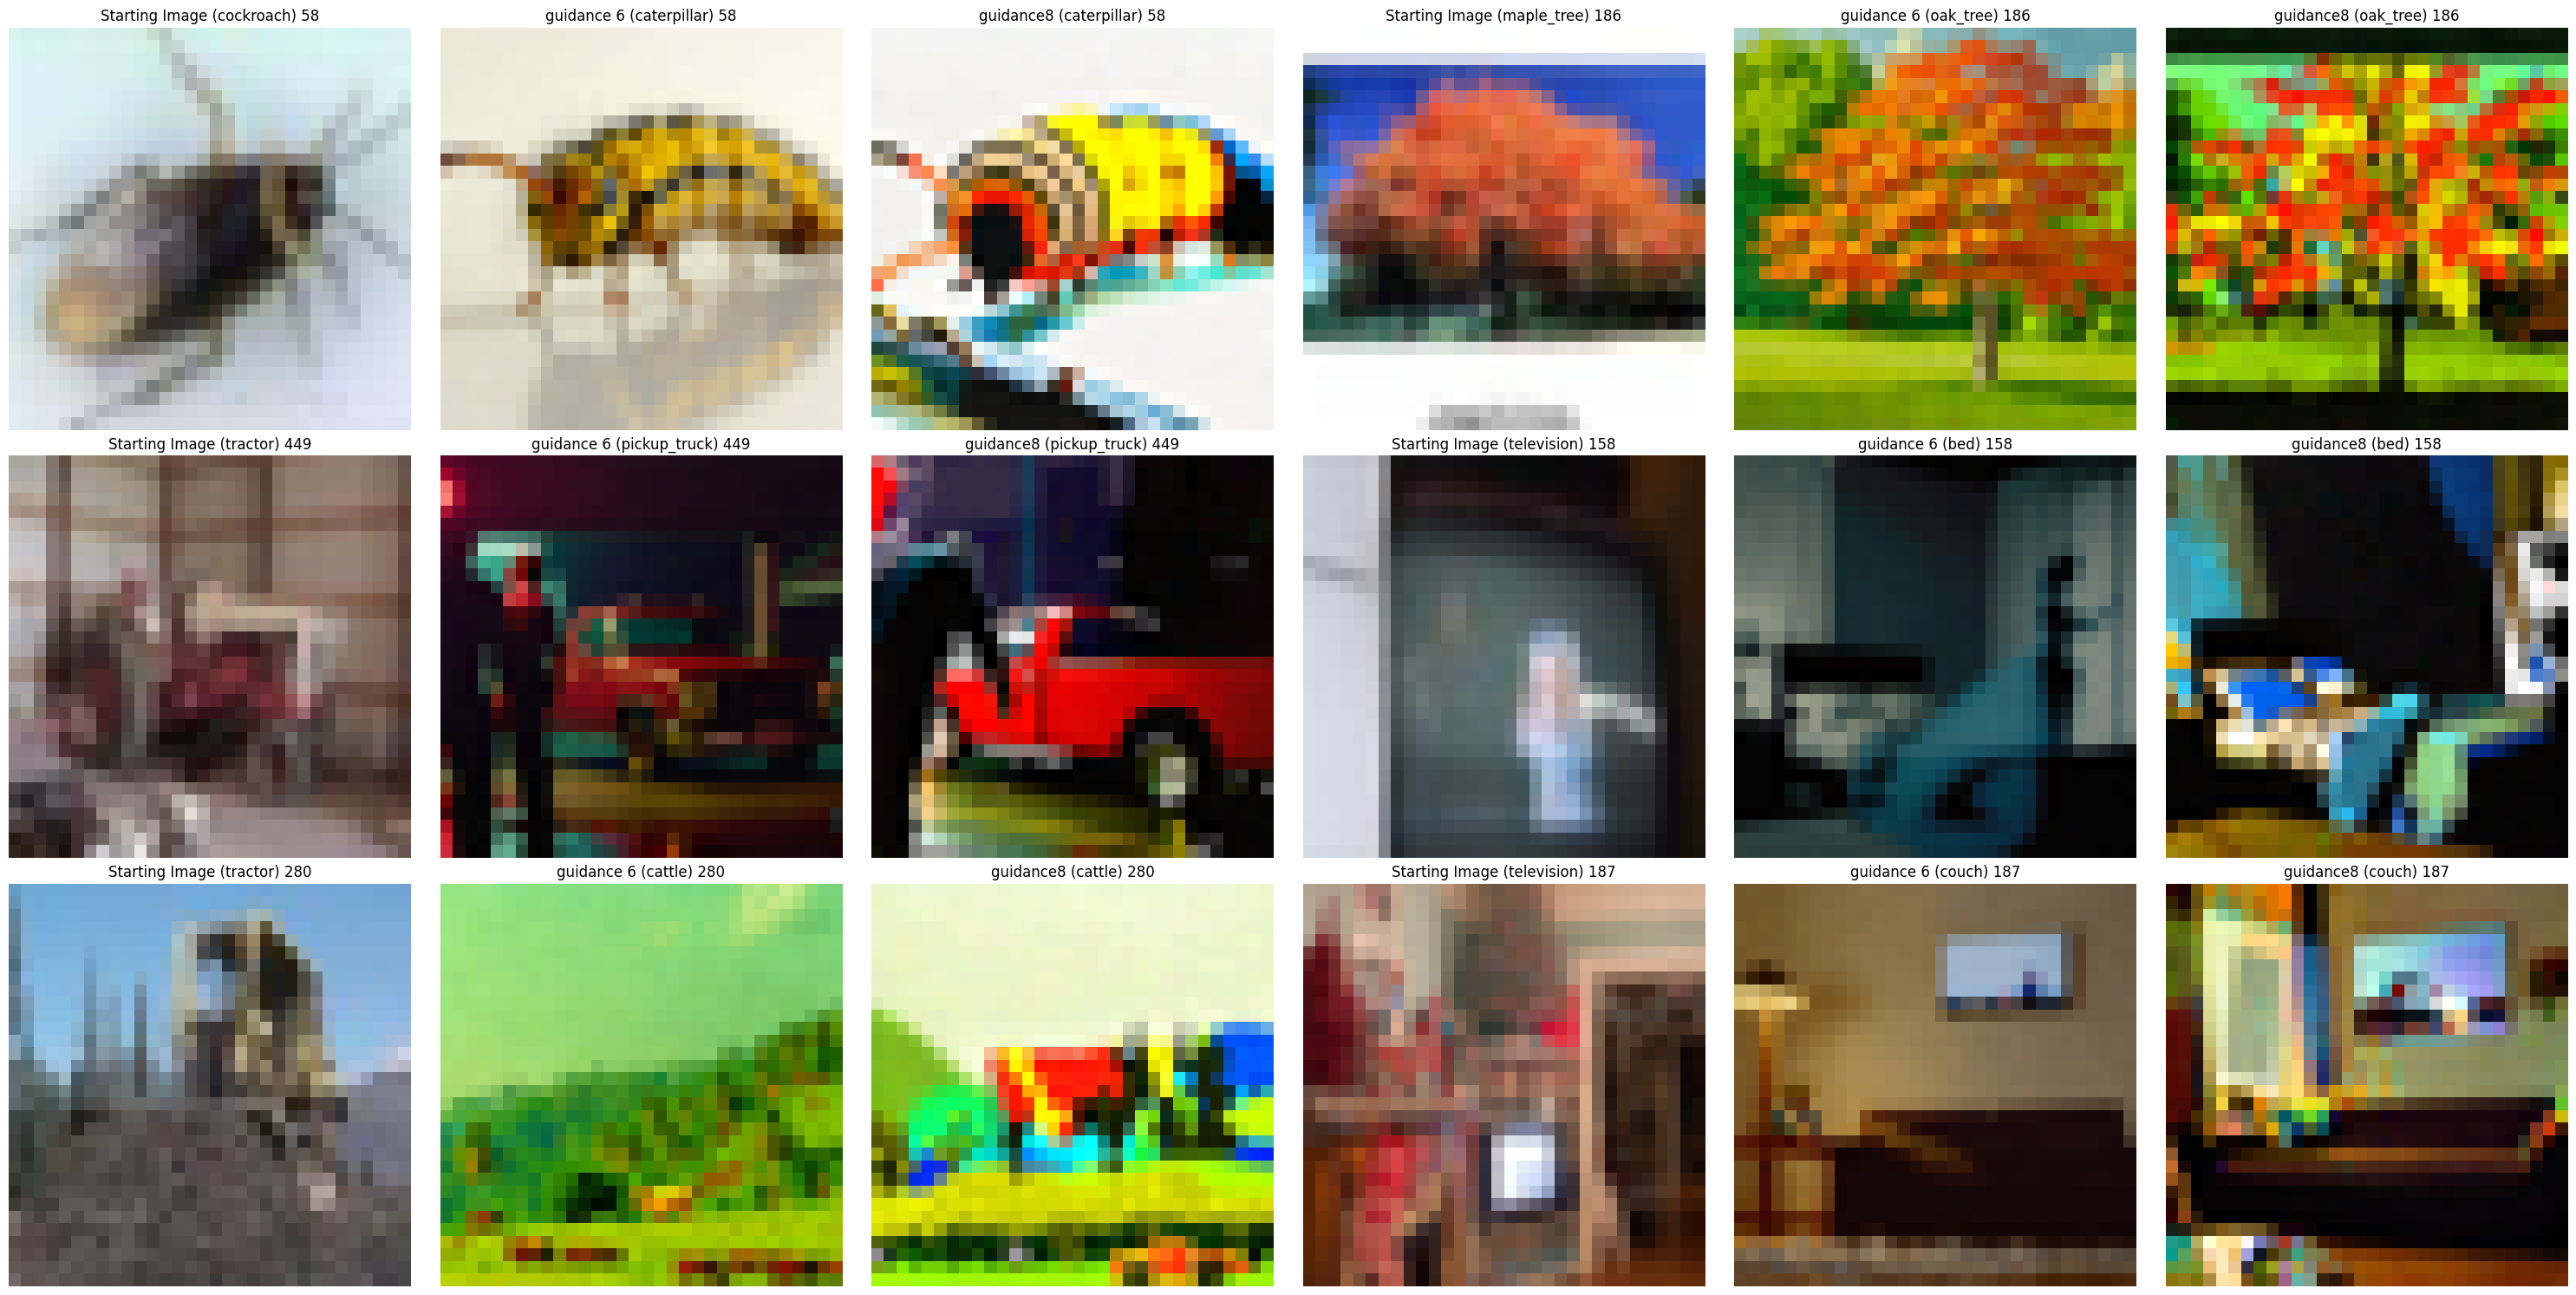

In [103]:
# Example usage
folder1 = 'saved_data/cifar_train_all_fortest'
folder2 = 'saved_data/sdxl_llava_synfromreal_s1g2' # less text guidance
folder3 = 'saved_data/sdxl_llava_synfromreal_s1g8' # more text guidance

display_three_image_comparison(folder1, folder2, folder3, synthetic_to_starting_class)


# extract accuracies

In [1]:
file_path = 'logs/test.txt'


In [4]:
import os

def extract_class_accuracy_from_file(file_path, last_n_lines=None):
    """
    Extracts class numbers and their corresponding accuracies from the last few lines of a text file.
    
    Args:
    file_path (str): Path to the text file.
    last_n_lines (int): Number of lines from the end of the file to read. If None, reads the entire file.
    
    Returns:
    dict: A dictionary with class numbers as keys and accuracies as values.
    """
    class_accuracy_dict = {}
    try:
        with open(file_path, 'r') as file:
            if last_n_lines is not None:
                # Seek to the end of the file and read last_n_lines
                lines = file.readlines()[-last_n_lines:]
            else:
                # Read all lines in the file
                lines = file.readlines()

            for line in lines:
                # Process each line as before
                parts = line.split(' = ')
                if len(parts) == 2:
                    class_number = parts[0].split('/')[-1]
                    accuracy = float(parts[1])
                    class_accuracy_dict[int(class_number)] = accuracy
    except Exception as e:
        print(f"Error reading from file: {e}")
    
    return class_accuracy_dict



In [5]:
# Example usage
file_path = 'logs/synreal_aecb64d256e10_realsyns5g2_synsyn10percenti2is8g2.txt'
file_path = 'logs/imagenet_synrealallprompti2i_synsyni2is8g2.txt'
file_path = 'logs/new_ocl_cifar_80synreal_20synsyni2i_step16_all500test_1.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)

{0: 1.0, 1: 0.99, 10: 0.826, 11: 0.676, 12: 0.756, 13: 0.0, 14: 0.93, 15: 0.986, 16: 0.972, 17: 0.982, 18: 0.922, 19: 0.0, 2: 0.914, 20: 0.99, 21: 0.996, 22: 0.0, 23: 0.882, 24: 0.0, 25: 0.898, 26: 0.976, 27: 0.916, 28: 0.95, 29: 0.99, 3: 0.96, 30: 0.942, 31: 0.97, 32: 0.858, 33: 0.912, 34: 0.0, 35: 0.752, 36: 0.994, 37: 0.878, 38: 0.98, 39: 0.99, 4: 0.898, 40: 0.914, 41: 0.98, 42: 0.804, 43: 0.988, 44: 0.914, 45: 0.0, 46: 0.824, 47: 0.808, 48: 0.99, 49: 0.932, 5: 0.996, 50: 0.878, 51: 0.966, 52: 0.854, 53: 0.0, 54: 0.988, 55: 0.822, 56: 0.976, 57: 0.904, 58: 0.824, 59: 0.744, 6: 0.926, 60: 0.798, 61: 0.948, 62: 0.982, 63: 0.928, 64: 0.882, 65: 0.95, 66: 0.946, 67: 0.916, 68: 0.942, 69: 0.97, 7: 0.946, 70: 0.972, 71: 0.904, 72: 0.868, 73: 0.938, 74: 0.0, 75: 0.95, 76: 0.982, 77: 0.972, 78: 0.96, 79: 0.886, 8: 0.982, 80: 0.954, 81: 0.956, 82: 0.984, 83: 0.0, 84: 0.922, 85: 0.964, 86: 0.982, 87: 0.928, 88: 0.972, 89: 0.948, 9: 0.976, 90: 0.942, 91: 0.942, 92: 0.906, 93: 0.966, 94: 0.952,

In [6]:
sum(accuracy_dict.values())/100

0.8278799999999995

In [7]:
order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]
syn_classes = [order[4:] for order in order_list]
syn_classes = [item for lists in syn_classes for item in lists]
print(syn_classes)

[20, 19, 33, 53, 32, 41, 21, 68, 46, 31, 1, 86, 95, 82, 37, 52, 99, 90, 77, 58]


In [8]:
def filter_class_dict(full_dict, class_list):
    """
    Filters a dictionary to include only specific keys (class numbers) present in a given list.

    Args:
    full_dict (dict): The original dictionary containing class numbers as keys and associated values.
    class_list (list): A list of class numbers to retain in the new dictionary.

    Returns:
    dict: A filtered dictionary containing only the keys and values for class numbers in the class_list.
    """
    # Use dictionary comprehension to filter the dictionary
    filtered_dict = {class_number: full_dict[class_number] for class_number in class_list if class_number in full_dict}
    return filtered_dict


In [9]:
# Example usage
full_dict = accuracy_dict
class_list = syn_classes  # List of class numbers you want to retain
# class_list = [5, 20]
filtered_dict1 = filter_class_dict(full_dict, class_list)
print(filtered_dict1)


{20: 0.99, 19: 0.0, 33: 0.912, 53: 0.0, 32: 0.858, 41: 0.98, 21: 0.996, 68: 0.942, 46: 0.824, 31: 0.97, 1: 0.99, 86: 0.982, 95: 0.934, 82: 0.984, 37: 0.878, 52: 0.854, 99: 0.93, 90: 0.942, 77: 0.972, 58: 0.824}


In [10]:
sum(full_dict.values())/len(full_dict.values())

0.8278799999999995

In [11]:
len(filtered_dict1.values())

20

In [12]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.8380999999999998

In [13]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(full_dict, list(set(full_list)-set(class_list)))
print(filtered_dict2)

{0: 1.0, 2: 0.914, 3: 0.96, 4: 0.898, 5: 0.996, 6: 0.926, 7: 0.946, 8: 0.982, 9: 0.976, 10: 0.826, 11: 0.676, 12: 0.756, 13: 0.0, 14: 0.93, 15: 0.986, 16: 0.972, 17: 0.982, 18: 0.922, 22: 0.0, 23: 0.882, 24: 0.0, 25: 0.898, 26: 0.976, 27: 0.916, 28: 0.95, 29: 0.99, 30: 0.942, 34: 0.0, 35: 0.752, 36: 0.994, 38: 0.98, 39: 0.99, 40: 0.914, 42: 0.804, 43: 0.988, 44: 0.914, 45: 0.0, 47: 0.808, 48: 0.99, 49: 0.932, 50: 0.878, 51: 0.966, 54: 0.988, 55: 0.822, 56: 0.976, 57: 0.904, 59: 0.744, 60: 0.798, 61: 0.948, 62: 0.982, 63: 0.928, 64: 0.882, 65: 0.95, 66: 0.946, 67: 0.916, 69: 0.97, 70: 0.972, 71: 0.904, 72: 0.868, 73: 0.938, 74: 0.0, 75: 0.95, 76: 0.982, 78: 0.96, 79: 0.886, 80: 0.954, 81: 0.956, 83: 0.0, 84: 0.922, 85: 0.964, 87: 0.928, 88: 0.972, 89: 0.948, 91: 0.942, 92: 0.906, 93: 0.966, 94: 0.952, 96: 0.312, 97: 0.978, 98: 0.0}


In [14]:
sum(filtered_dict2.values())/len(filtered_dict2)

0.825325

In [15]:
### Example usage
file_path = 'logs/new_ocl_cifar_80real_20synsyni2i_step16_all500test_1.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)


{0: 1.0, 1: 0.99, 10: 0.824, 11: 0.674, 12: 0.934, 13: 0.0, 14: 0.928, 15: 0.986, 16: 0.972, 17: 0.982, 18: 0.926, 19: 0.0, 2: 0.914, 20: 0.99, 21: 0.996, 22: 0.0, 23: 0.878, 24: 0.0, 25: 0.898, 26: 0.974, 27: 0.914, 28: 0.95, 29: 0.99, 3: 0.958, 30: 0.942, 31: 0.97, 32: 0.858, 33: 0.912, 34: 0.0, 35: 0.75, 36: 0.994, 37: 0.876, 38: 0.98, 39: 0.99, 4: 0.9, 40: 0.916, 41: 0.98, 42: 0.93, 43: 0.986, 44: 0.912, 45: 0.0, 46: 0.826, 47: 0.828, 48: 0.99, 49: 0.932, 5: 0.996, 50: 0.878, 51: 0.966, 52: 0.84, 53: 0.0, 54: 0.988, 55: 0.822, 56: 0.974, 57: 0.904, 58: 0.824, 59: 0.732, 6: 0.93, 60: 0.8, 61: 0.948, 62: 0.982, 63: 0.924, 64: 0.884, 65: 0.948, 66: 0.946, 67: 0.914, 68: 0.94, 69: 0.97, 7: 0.948, 70: 0.97, 71: 0.904, 72: 0.868, 73: 0.938, 74: 0.0, 75: 0.952, 76: 0.982, 77: 0.972, 78: 0.96, 79: 0.946, 8: 0.982, 80: 0.954, 81: 0.958, 82: 0.984, 83: 0.0, 84: 0.922, 85: 0.964, 86: 0.982, 87: 0.928, 88: 0.972, 89: 0.948, 9: 0.976, 90: 0.94, 91: 0.942, 92: 0.904, 93: 0.966, 94: 0.952, 95: 0.

In [16]:
sum(accuracy_dict.values())/len(accuracy_dict.values())

0.8358799999999995

In [17]:
filtered_dict1 = filter_class_dict(accuracy_dict, syn_classes)
print(filtered_dict1)


{20: 0.99, 19: 0.0, 33: 0.912, 53: 0.0, 32: 0.858, 41: 0.98, 21: 0.996, 68: 0.94, 46: 0.826, 31: 0.97, 1: 0.99, 86: 0.982, 95: 0.934, 82: 0.984, 37: 0.876, 52: 0.84, 99: 0.932, 90: 0.94, 77: 0.972, 58: 0.824}


In [18]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.8372999999999999

In [19]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(accuracy_dict, list(set(full_list)-set(syn_classes)))
print(filtered_dict2)

{0: 1.0, 2: 0.914, 3: 0.958, 4: 0.9, 5: 0.996, 6: 0.93, 7: 0.948, 8: 0.982, 9: 0.976, 10: 0.824, 11: 0.674, 12: 0.934, 13: 0.0, 14: 0.928, 15: 0.986, 16: 0.972, 17: 0.982, 18: 0.926, 22: 0.0, 23: 0.878, 24: 0.0, 25: 0.898, 26: 0.974, 27: 0.914, 28: 0.95, 29: 0.99, 30: 0.942, 34: 0.0, 35: 0.75, 36: 0.994, 38: 0.98, 39: 0.99, 40: 0.916, 42: 0.93, 43: 0.986, 44: 0.912, 45: 0.0, 47: 0.828, 48: 0.99, 49: 0.932, 50: 0.878, 51: 0.966, 54: 0.988, 55: 0.822, 56: 0.974, 57: 0.904, 59: 0.732, 60: 0.8, 61: 0.948, 62: 0.982, 63: 0.924, 64: 0.884, 65: 0.948, 66: 0.946, 67: 0.914, 69: 0.97, 70: 0.97, 71: 0.904, 72: 0.868, 73: 0.938, 74: 0.0, 75: 0.952, 76: 0.982, 78: 0.96, 79: 0.946, 80: 0.954, 81: 0.958, 83: 0.0, 84: 0.922, 85: 0.964, 87: 0.928, 88: 0.972, 89: 0.948, 91: 0.942, 92: 0.904, 93: 0.966, 94: 0.952, 96: 0.77, 97: 0.978, 98: 0.0}


In [20]:
sum(filtered_dict2.values())/len(filtered_dict2.values())

0.8355249999999999

In [97]:
file_path = 'logs/log_knn_3real_2sythesis_10nn_testagain.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)

{0: 0.92, 1: 0.27, 10: 0.42, 11: 0.39, 12: 0.77, 13: 0.54, 14: 0.33, 15: 0.55, 16: 0.69, 17: 0.1, 18: 0.07, 19: 0.04, 2: 0.67, 20: 0.66, 21: 0.15, 22: 0.61, 23: 0.85, 24: 0.81, 25: 0.05, 26: 0.41, 27: 0.55, 28: 0.44, 29: 0.52, 3: 0.04, 30: 0.62, 31: 0.09, 32: 0.11, 33: 0.03, 34: 0.57, 35: 0.29, 36: 0.71, 37: 0.09, 38: 0.53, 39: 0.83, 4: 0.02, 40: 0.26, 41: 0.42, 42: 0.53, 43: 0.53, 44: 0.24, 45: 0.47, 46: 0.08, 47: 0.72, 48: 0.85, 49: 0.13, 5: 0.28, 50: 0.35, 51: 0.58, 52: 0.02, 53: 0.63, 54: 0.62, 55: 0.26, 56: 0.77, 57: 0.63, 58: 0.08, 59: 0.45, 6: 0.61, 60: 0.75, 61: 0.67, 62: 0.06, 63: 0.59, 64: 0.02, 65: 0.07, 66: 0.08, 67: 0.48, 68: 0.41, 69: 0.67, 7: 0.54, 70: 0.7, 71: 0.74, 72: 0.07, 73: 0.54, 74: 0.0, 75: 0.76, 76: 0.78, 77: 0.09, 78: 0.17, 79: 0.16, 8: 0.32, 80: 0.34, 81: 0.68, 82: 0.43, 83: 0.32, 84: 0.46, 85: 0.04, 86: 0.4, 87: 0.74, 88: 0.5, 89: 0.71, 9: 0.74, 90: 0.01, 91: 0.58, 92: 0.5, 93: 0.39, 94: 0.92, 95: 0.17, 96: 0.49, 97: 0.64, 98: 0.27, 99: 0.49}


In [23]:
filtered_dict1 = filter_class_dict(accuracy_dict, syn_classes)
print((filtered_dict1))

{5: 0.28, 20: 0.66, 83: 0.32, 19: 0.04, 62: 0.06, 33: 0.03, 74: 0.0, 53: 0.63, 4: 0.02, 32: 0.11, 40: 0.26, 41: 0.42, 64: 0.02, 21: 0.15, 49: 0.13, 68: 0.41, 65: 0.07, 46: 0.08, 72: 0.07, 31: 0.09, 8: 0.32, 1: 0.27, 18: 0.07, 86: 0.4, 85: 0.04, 95: 0.17, 25: 0.05, 82: 0.43, 66: 0.08, 37: 0.09, 78: 0.17, 52: 0.02, 3: 0.04, 99: 0.49, 28: 0.44, 90: 0.01, 17: 0.1, 77: 0.09, 79: 0.16, 58: 0.08}


In [24]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.18424999999999997

In [25]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(accuracy_dict, list(set(full_list)-set(syn_classes)))
print(filtered_dict2)

{0: 0.92, 2: 0.67, 6: 0.61, 7: 0.54, 9: 0.74, 10: 0.42, 11: 0.39, 12: 0.77, 13: 0.54, 14: 0.33, 15: 0.55, 16: 0.69, 22: 0.61, 23: 0.85, 24: 0.81, 26: 0.41, 27: 0.55, 29: 0.52, 30: 0.62, 34: 0.57, 35: 0.29, 36: 0.71, 38: 0.53, 39: 0.83, 42: 0.53, 43: 0.53, 44: 0.24, 45: 0.47, 47: 0.72, 48: 0.85, 50: 0.35, 51: 0.58, 54: 0.62, 55: 0.26, 56: 0.77, 57: 0.63, 59: 0.45, 60: 0.75, 61: 0.67, 63: 0.59, 67: 0.48, 69: 0.67, 70: 0.7, 71: 0.74, 73: 0.54, 75: 0.76, 76: 0.78, 80: 0.34, 81: 0.68, 84: 0.46, 87: 0.74, 88: 0.5, 89: 0.71, 91: 0.58, 92: 0.5, 93: 0.39, 94: 0.92, 96: 0.49, 97: 0.64, 98: 0.27}


In [26]:
sum(filtered_dict2.values())/len(filtered_dict2.values())

0.5895000000000002

In [20]:
sum(accuracy_dict.values())/100

0.4274

In [ ]:
import os
import re
from collections import defaultdict

def generate_image_paths_and_labels(big_folder, name_to_class_dict):
    """
    Generate a .txt file for each class in the big folder, recording the path to images and their labels.

    :param big_folder: Path to the big folder containing images.
    """
    if not os.path.exists(big_folder):
        print(f"The folder {big_folder} does not exist.")
        return

    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif')
    images_by_class = defaultdict(list)
    
    class_number_pattern = re.compile(r'(.+?)(\d+)\.')

    # Group images by class
    for file in os.listdir(big_folder):
        if file.lower().endswith(image_extensions):
            match = class_number_pattern.match(file)
            if match:
                class_name = match.group(1)  # Extract class name
                image_path = os.path.join(big_folder, file)
                images_by_class[class_name].append(image_path)

    # Create a .txt file for each class
    for class_name, image_paths in images_by_class.items():
        class_number = name_to_class_dict[class_name]
        print(class_number)
        txt_file_path = os.path.join(big_folder, f"class{class_number}.txt")

        with open(txt_file_path, 'w') as txt_file:
            for image_path in image_paths:
#                 print(image_path)
#                 print('-'*20)
#                 print(class_number)
                txt_file.write(f"../continual/{image_path} {class_number}\n")
        
        print(f"Generated file: {txt_file_path}")

         

In [8]:
import os
folder_path = 'saved_data/ImageNet/ImageNet_sdxl_llavaprompt_1300_3real_i2i/'
files = os.listdir(folder_path)
matching_files = [file for file in files if file.startswith('great_grey_owl')]
print(len(matching_files))
with open(os.path.join(folder_path, 'class66.txt'), 'w') as f:
    for image in matching_files:
        image_path = os.path.join(folder_path, image)
        f.write(f"{image_path} {66}\n")

130


In [ ]:
import os

def delete_files_with_prefix(folder_path, prefix):
    # Check if the provided folder path exists
    if not os.path.isdir(folder_path):
        print(f"The folder path '{folder_path}' does not exist.")
        return

    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Filter out files starting with the specified prefix
    matching_files = [file for file in files if file.startswith(prefix)]
    
    # Delete the matching files
    if matching_files:
        print(f"Deleting files starting with '{prefix}':")
        for matching_file in matching_files:
            file_path = os.path.join(folder_path, matching_file)
            try:
                os.remove(file_path)
                print(f"Deleted: {matching_file}")
            except Exception as e:
                print(f"Failed to delete {matching_file}: {e}")
    else:
        print(f"No files found starting with '{prefix}'.")

# Replace 'your_folder_path_here' with the actual folder path
folder_path = 'saved_data/ImageNet/ImageNet_sdxl_llavaprompt_1300_3real_i2i/'
prefix = 'great_grey_owl'
delete_files_with_prefix(folder_path, prefix)


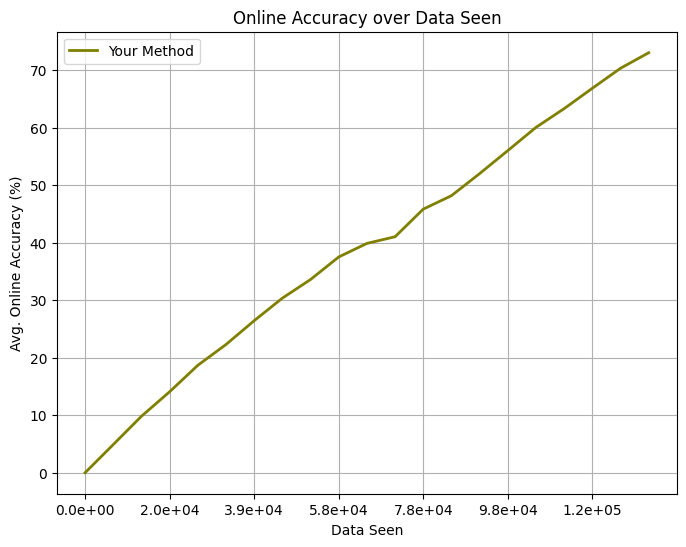

In [9]:
import matplotlib.pyplot as plt
import re

def extract_accuracies(file_path):
    accuracies = []
    capture = False

    with open(file_path, 'r') as file:
        for line in file:
            # Look for the line indicating the end of an eval phase
            if '-- >> End of eval phase << --' in line:
                capture = True
                continue  # Move to the next line where the accuracy should be
            if capture:
                match = re.search(r"Top1_Acc_Stream/eval_phase/test_stream/Task000\s*=\s*(\d+\.\d+)", line)
                if match:
                    accuracy = float(match.group(1)) * 100  # Convert to percentage
                    accuracies.append(accuracy)
                    capture = False  # Reset capture for the next block
    
    return accuracies

def plot_single_accuracy(accuracies, data_points_per_exp=6500):
    # Add the first point (0, 0) for accuracy
    accuracies = [0] + accuracies
    data_seen = [0] + [i * data_points_per_exp for i in range(1, len(accuracies))]
    
    plt.figure(figsize=(8, 6))
    
    # Plot the accuracy curve
    plt.plot(data_seen, accuracies, label="Your Method", color='olive', linewidth=2)
    
    # Set the labels and title
    plt.xlabel('Data Seen')
    plt.ylabel('Avg. Online Accuracy (%)')
    plt.title('Online Accuracy over Data Seen')
    
    # Customize x-axis ticks
    max_x = max(data_seen)
    # x_ticks = [0] + [max_x // 5 * i for i in range(1, 6)]
    # plt.xticks(x_ticks, [str(int(x / 1000)) if x != 0 else '0' for x in x_ticks] + [f'{max_x / 1000:.1e}'])
    plt.xticks(data_seen[::3], [f'{x:.1e}' for x in data_seen[::3]])
    # Grid, legend, and display
    plt.grid(True)
    plt.legend()
    plt.show()


# File path to the result file
file_path = 'logs/imagenet_realreal_synsyni2is8g2.txt'

# Extract accuracies
accuracies = extract_accuracies(file_path)

# Plot the accuracies
plot_single_accuracy(accuracies)


In [10]:
len(accuracies)

20

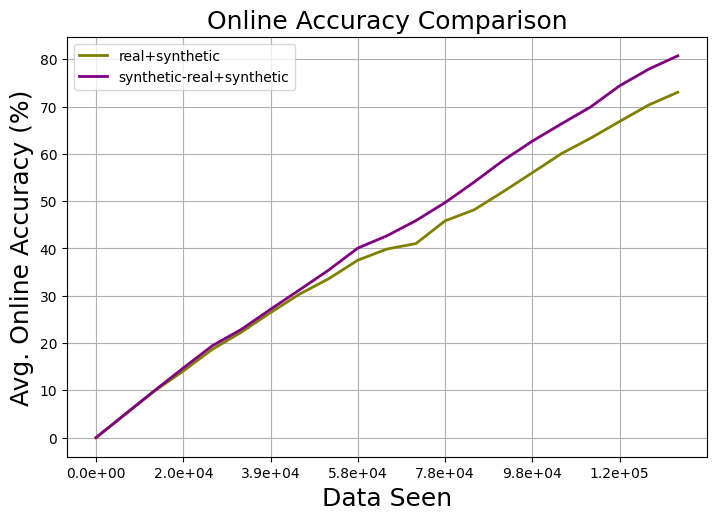

In [11]:
import matplotlib.pyplot as plt

# def plot_two_accuracies(accuracies1, accuracies2, label1="Accuracy 1", label2="Accuracy 2", data_points_per_exp=6500, title = 'Online Accuracy Comparison', save_path = None):
#     # Add the first point (0, 0) for both accuracy lists
#     accuracies1 = [0] + accuracies1
#     accuracies2 = [0] + accuracies2
#     data_seen = [0] + [i * data_points_per_exp for i in range(1, max(len(accuracies1), len(accuracies2)))]
    
#     plt.figure(figsize=(8, 6))
    
#     # Plot the first set of accuracies
#     plt.plot(data_seen[:len(accuracies1)], accuracies1, label=label1, color='olive', linewidth=2)
    
#     # Plot the second set of accuracies
#     plt.plot(data_seen[:len(accuracies2)], accuracies2, label=label2, color='purple', linewidth=2)
    
#     # Set the labels and title
#     plt.xlabel('Data Seen', fontsize = 18)
#     plt.ylabel('Avg. Online Accuracy (%)', fontsize = 18)
#     plt.title(title, fontsize = 18)
    
#     # Customize x-axis ticks
#     plt.xticks(data_seen[::3], [f'{x:.1e}' for x in data_seen[::3]])
    
#     # Grid, legend, and display
#     plt.grid(True)
#     plt.legend()
#     if save_path:
#         plt.savefig(save_path, bbox_inches='tight', dpi=300)
#     plt.show()

    
def plot_two_accuracies(accuracies1, accuracies2, label1="Accuracy 1", label2="Accuracy 2", data_points_per_exp=6500, title='Online Accuracy Comparison', save_path=None):
    # Add the first point (0, 0) for both accuracy lists
    accuracies1 = [0] + accuracies1
    accuracies2 = [0] + accuracies2
    data_seen = [0] + [i * data_points_per_exp for i in range(1, max(len(accuracies1), len(accuracies2)))]
    
    # Create a figure with a fixed size
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the first set of accuracies
    ax.plot(data_seen[:len(accuracies1)], accuracies1, label=label1, color='olive', linewidth=2)
    
    # Plot the second set of accuracies
    ax.plot(data_seen[:len(accuracies2)], accuracies2, label=label2, color='purple', linewidth=2)
    
    # Set the labels and title
    ax.set_xlabel('Data Seen', fontsize=18)
    ax.set_ylabel('Avg. Online Accuracy (%)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    # Customize x-axis ticks
    ax.set_xticks(data_seen[::3])
    ax.set_xticklabels([f'{x:.1e}' for x in data_seen[::3]])
    
    # Grid, legend
    ax.grid(True)
    ax.legend()
    
    # Adjust layout so that the plot box is consistently sized
    fig.tight_layout(pad=2.0)  # Adjust padding between plot and figure edge
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    # Save the figure if save_path is provided
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()
# # Example lists of accuracies
accuracies1 = extract_accuracies('logs/imagenet_realreal_synsyni2is8g2.txt')
accuracies2 = extract_accuracies('logs/imagenet_synrealallprompti2i_synsyni2is8g2.txt')

# Plot the accuracies
plot_two_accuracies(accuracies1, accuracies2, label1="real+synthetic", label2="synthetic-real+synthetic", save_path = 'figures/realrealsynsyni2i_vs_synrealsynsyni2i.png')


In [12]:
# # Example lists of accuracies
# accuracies1 = extract_accuracies('logs/imagenet_synrealallprompti2i_synsynt2ilong.txt')
# accuracies2 = extract_accuracies('logs/imagenet_synrealallprompti2i_synsyni2is8g2.txt')

# # Plot the accuracies
# plot_two_accuracies(accuracies1, accuracies2, label1="synthetic-real+synthetic_t2i", label2="synthetic-real+synthetic_i2i")


In [13]:

import re

def parse_log_file_class(file_path):
    # Initialize a dictionary to hold the accuracy list for each class
    class_accuracies = {i: [] for i in range(100)}  # Assuming 100 classes

    # Regular expression to match the accuracy entries
    pattern = re.compile(r"Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/(\d+) = (\d+\.\d+)")

    with open(file_path, 'r') as file:
        # Read the file line by line
        for line in file:
            line = line.strip()
            # Check for a match to the pattern
            match = pattern.match(line)
            if match:
                class_id, accuracy = match.groups()
                class_id = int(class_id)
                accuracy = float(accuracy)
                # Append the accuracy to the corresponding class' list
                class_accuracies[class_id].append(accuracy)

    return class_accuracies

In [14]:
order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]
syn_classes = [order[3:] for order in order_list]
syn_classes = [item for lists in syn_classes for item in lists]
print(syn_classes)
real_classes = list(set([i for i in range(100)])-set(syn_classes))
print(len(real_classes))

[5, 20, 83, 19, 62, 33, 74, 53, 4, 32, 40, 41, 64, 21, 49, 68, 65, 46, 72, 31, 8, 1, 18, 86, 85, 95, 25, 82, 66, 37, 78, 52, 3, 99, 28, 90, 17, 77, 79, 58]
60


In [15]:
def calculate_average_accuracies_from_dict(class_accuracies_dict, class_list):
    # Number of experiences is the length of the accuracy list for any class
    num_experiences = len(next(iter(class_accuracies_dict.values())))
    print(num_experiences)
    
    # Initialize a list to hold the average accuracy for each experience
    averages = []
    
    for i in range(num_experiences):
        selected_accuracies = [class_accuracies_dict[class_id][i] for class_id in class_list]
        average_accuracy = sum(selected_accuracies) / len(selected_accuracies)
        averages.append(average_accuracy)
    
    return averages

In [23]:
accuracy_dict1 = parse_log_file_class('logs/cifar_60real_40synsyni2i.txt')
average_syn1 = calculate_average_accuracies_from_dict(accuracy_dict1, syn_classes)
average_real1 = calculate_average_accuracies_from_dict(accuracy_dict1, real_classes)

20
20


In [24]:
print(average_real1)
print(average_syn1)

[0.05, 0.09899999999999999, 0.146, 0.194, 0.24133333333333334, 0.28500000000000003, 0.3311666666666666, 0.37799999999999995, 0.4218333333333332, 0.4683333333333333, 0.5143333333333333, 0.5578333333333333, 0.6008333333333334, 0.6443333333333332, 0.6886666666666665, 0.7210000000000001, 0.7685, 0.8105000000000001, 0.8551666666666669, 0.8963333333333335]
[0.0495, 0.09325000000000001, 0.13675, 0.1705, 0.20774999999999996, 0.23275, 0.26850000000000007, 0.30425, 0.33575000000000005, 0.37325, 0.4115000000000001, 0.4477500000000001, 0.47250000000000014, 0.5115000000000001, 0.5315000000000001, 0.5545000000000001, 0.5750000000000001, 0.5962500000000001, 0.6265000000000001, 0.66325]


In [26]:
accuracy_dict2 = parse_log_file_class('logs/cifar_60synreali2i_40synsyni2i.txt')
average_syn2 = calculate_average_accuracies_from_dict(accuracy_dict2, syn_classes)
average_real2 = calculate_average_accuracies_from_dict(accuracy_dict2, real_classes)

20
20


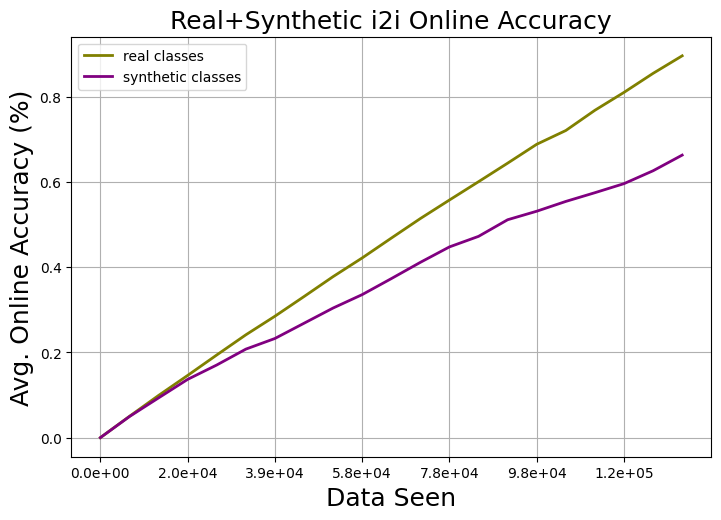

In [29]:
plot_two_accuracies(average_real1, average_syn1, label1="real classes", label2= "synthetic classes", title = 'Real+Synthetic i2i Online Accuracy', save_path= 'figures/cifar_realreal_synsyni2i.png')


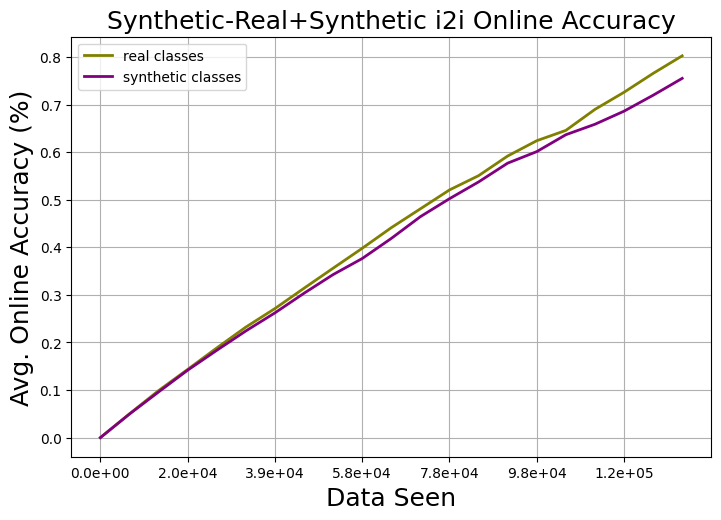

In [30]:
plot_two_accuracies(average_real2, average_syn2, label1="real classes", label2= "synthetic classes", 
                    title = 'Synthetic-Real+Synthetic i2i Online Accuracy', save_path= 'figures/cifar_synreal_synsyni2i.png')


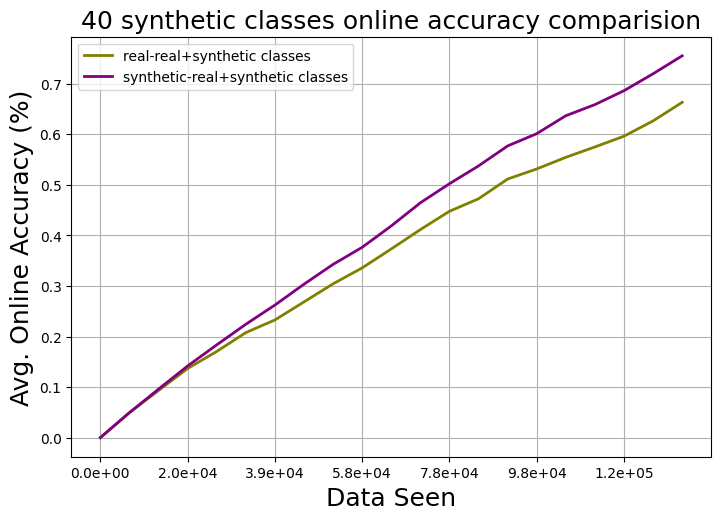

In [35]:
plot_two_accuracies(average_syn1, average_syn2, label1="real-real+synthetic classes ", label2= "synthetic-real+synthetic classes", 
                    title = '40 synthetic classes online accuracy comparision',
                    save_path= 'figures/cifar_40synthetic_compare.png', )